In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

In [206]:
df=pd.read_csv('C:/Users/User/Downloads/result_df.csv',encoding='utf-8')
df

Unnamed: 0.1  Unnamed: 0      회원번호  남녀구분코드  연령  소지여부_신용   입회일자_신용  \
0                 6           6  w8NeFjRo       2  38        1  20170609   
1                 9           9  OdlqFy2F       2  42        1  20100816   
2                11          11  PjmGznTm       1  45        1  19950524   
3                16          16  Os3UUS88       1  80        1  20171128   
4                25          25  CRX23tPQ       1  34        1  20170921   
...             ...         ...       ...     ...  ..      ...       ...   
69384        299982      299982  g7KF9R6g       1  56        1  20150903   
69385        299983      299983  Tp3muDcV       1  55        1  20160219   
69386        299986      299986  4n8aFEwI       1  45        1  20071017   
69387        299996      299996  EDQYlTTX       2  69        1  20150417   
69388        299999      299999  bnKXePYO       2  36        1  20180222   

       입회경과개월수_신용  탈회여부  회원여부_연체  ...  Frequency_s  Monetary_s  labels_k  \
0              19     1        0  ...     0.025141    0.001804         1   
1             101     0        0  ...     0.017980    0.003194         1   
2             284     0        0  ...     0.026665    0.001722         1   
3              14     0        0  ...     0.032759    0.001639         1   
4              16     1        0  ...     0.025598    0.001177         1   
...           ...   ...      ...  ...          ...         ...       ...   
69384          40     1        0  ...     0.027579    0.001671         1   
69385          35     0        0  ...     0.035654    0.001837         1   
69386         135     0        0  ...     0.037635    0.002943         1   
69387          45     0        0  ...     0.021332    0.001770         1   
69388          11     1        0  ...     0.029864    0.001939         1   

       Recency_8 Frequency_8 Monetary_8  RFM_Score  RFM_Class  고객구분_New  \
0              8           5          4  61.056236     잠재충성고객        간헐   
1              8           4          7  64.671510     잠재충성고객        간헐   
2              8           5          4  61.056236     잠재충성고객        간헐   
3              8           5          4  61.056236     잠재충성고객        간헐   
4              8           5          3  57.226267    놓치면안될고객        간헐   
...          ...         ...        ...        ...        ...       ...   
69384          8           5          4  61.056236     잠재충성고객        간헐   
69385          8           5          5  64.886204     잠재충성고객        간헐   
69386          8           5          6  68.716172     잠재충성고객        간헐   
69387          8           4          4  53.181605    놓치면안될고객        간헐   
69388          8           5          5  64.886204     잠재충성고객        간헐   

       prediction  
0              연속  
1              연속  
2              연속  
3              연속  
4              연속  
...           ...  
69384          연속  
69385          연속  
69386          연속  
69387          연속  
69388          연속  

[69389 rows x 318 columns]

In [207]:
df['prediction'].value_counts()

연속    54947
휴면    14442
Name: prediction, dtype: int64

In [208]:
df1=df[df['prediction']=='연속']

In [209]:
df2 = df1.sample(n=10000, random_state=42)

# 소비패턴

In [210]:
df3=df2[[  '쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외' ]]

In [211]:
df3 = df3.astype(np.int32)

In [212]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

matrix1 = df3.values

# 데이터 스케일링
scaler1 = StandardScaler()
scaled_matrix1 = scaler1.fit_transform(matrix1)

# 코사인 유사도 계산
cosine_sim1 = cosine_similarity(scaled_matrix1)

# 데이터 프레임 형태로 저장
cosine_sim_df1 = pd.DataFrame(cosine_sim1, df3.index, columns=df3.index)
cosine_sim_df1.iloc[:4,:4]

7388      26896     11745     40651
7388   1.000000 -0.056891 -0.002639  0.044120
26896 -0.056891  1.000000 -0.009400  0.013653
11745 -0.002639 -0.009400  1.000000  0.276174
40651  0.044120  0.013653  0.276174  1.000000

In [69]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,random_state=42).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0        1
1        3
2        4
3        2
4        4

In [70]:
predict.value_counts()

Cluster
0          3403
1          2671
2          1992
4          1263
3           671
dtype: int64

In [71]:
df2['cluster']=predict['Cluster'].values
df2

쇼핑_도소매_이용금액  쇼핑_백화점_이용금액  쇼핑_마트_이용금액  쇼핑_슈퍼마켓_이용금액  쇼핑_편의점_이용금액  \
7388             0            0           0             0            0   
26896        56600            0           0         32350        82900   
11745            0            0           0             0        45000   
40651       132000            0           0             0         9000   
29215            0            0           0         13500            0   
...            ...          ...         ...           ...          ...   
37011        65400            0       14790         73550            0   
16369            0            0           0             0            0   
37651            0            0           0             0        12000   
55739       877200            0           0         45880            0   
57916       187600        10000           0          3500        43500   

       쇼핑_아울렛_이용금액  쇼핑_온라인_이용금액  쇼핑_기타_이용금액  교통_주유이용금액  교통_정비이용금액  ...  \
7388             0            0           0      97000          0  ...   
26896            0            0           0          0          0  ...   
11745            0            0           0     562000          0  ...   
40651            0            0           0          0          0  ...   
29215            0      1434000           0      24975          0  ...   
...            ...          ...         ...        ...        ...  ...   
37011            0            0       29500      88000          0  ...   
16369            0            0           0          0          0  ...   
37651            0      1922873       40110          0          0  ...   
55739            0        68700           0     100000          0  ...   
57916            0            0        5000          0          0  ...   

       납부_유선방송이용금액  납부_건강연금이용금액  납부_기타이용금액  이용금액_요식  이용금액_의료  이용금액_교육  \
7388             0            0          0        0    19800        0   
26896            0            0       9900     9000        0        0   
11745            0            0          0        0    62950        0   
40651            0            0          0        0    67600        0   
29215            0            0     152720        0        0        0   
...            ...          ...        ...      ...      ...      ...   
37011            0            0          0        0        0        0   
16369            0            0          0        0        0        0   
37651            0            0          0        0     5300        0   
55739            0            0          0        0    84700        0   
57916            0            0          0    23000     7500        0   

       이용금액_사교활동  이용금액_일상생활  이용금액_해외  cluster  
7388      110500          0    14849        1  
26896     112400      13000        0        3  
11745          0          0        0        4  
40651     162500          0        0        2  
29215          0          0        0        4  
...          ...        ...      ...      ...  
37011     102000          0        0        1  
16369          0          0        0        2  
37651          0          0        0        1  
55739      27000      50000        0        1  
57916      34900      50000        0        3  

[10000 rows x 37 columns]

In [16]:
cluster_mean=df2.groupby('cluster').mean()
cluster_mean

쇼핑_도소매_이용금액   쇼핑_백화점_이용금액     쇼핑_마트_이용금액   쇼핑_슈퍼마켓_이용금액  \
cluster                                                              
0        223252.128416  55262.000588  113283.364678  112744.411402   
1        150178.156870  28387.189817   29570.991389   31231.434294   
2         37747.669177   5793.097390    6749.472892    8772.158635   
3         68940.470939  19849.985097   27171.554396   42499.067064   
4         73112.923990  17396.693587   32976.781473   27285.930325   

          쇼핑_편의점_이용금액   쇼핑_아울렛_이용금액    쇼핑_온라인_이용금액    쇼핑_기타_이용금액  \
cluster                                                            
0        42080.082280  35748.625331  209770.803115  37336.079929   
1         8509.329839   9515.009360  339989.129539  18703.779483   
2         2858.750000    986.787149  114542.447289   3871.616466   
3        10810.894188   7794.991058   91412.149031   9196.915052   
4        12638.630245   5410.015835  235018.809184  13036.318290   

             교통_주유이용금액     교통_정비이용금액  ...    납부_보험료이용금액  납부_유선방송이용금액  \
cluster                               ...                              
0        144902.275933  47743.856009  ...  71327.932413   415.608875   
1        108617.880943  29619.421939  ...  90837.149382     0.000000   
2         16930.444779  15661.154618  ...   7895.556727    11.447289   
3         21249.456036   9728.675112  ...  16479.709389    30.366617   
4         84940.992874  15596.209818  ...  84469.520982    39.047506   

         납부_건강연금이용금액      납부_기타이용금액       이용금액_요식        이용금액_의료  \
cluster                                                            
0        6391.107552  101283.196885  31802.494857  214278.003526   
1        2867.406964  104163.655185   6593.000000  174911.083115   
2           0.000000    9394.152108   1751.086345   47739.567269   
3          82.242921   10862.614009   8936.712370   97866.262295   
4         503.844022   34793.265241   7736.041172   73533.187648   

               이용금액_교육      이용금액_사교활동     이용금액_일상생활       이용금액_해외  
cluster                                                            
0         83520.049956  326103.879812  32069.767852  51745.317367  
1        106590.946462  121815.711718  10467.234744  80503.199551  
2          9639.518072   36920.825803   1871.606426  17381.631024  
3         24637.496274   93366.304024   7806.020864  24749.280179  
4         69976.947743  113222.252573  10899.192399  14513.653998  

[5 rows x 36 columns]

C:\Users\User\AppData\Local\Temp\ipykernel_12688\9024096.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


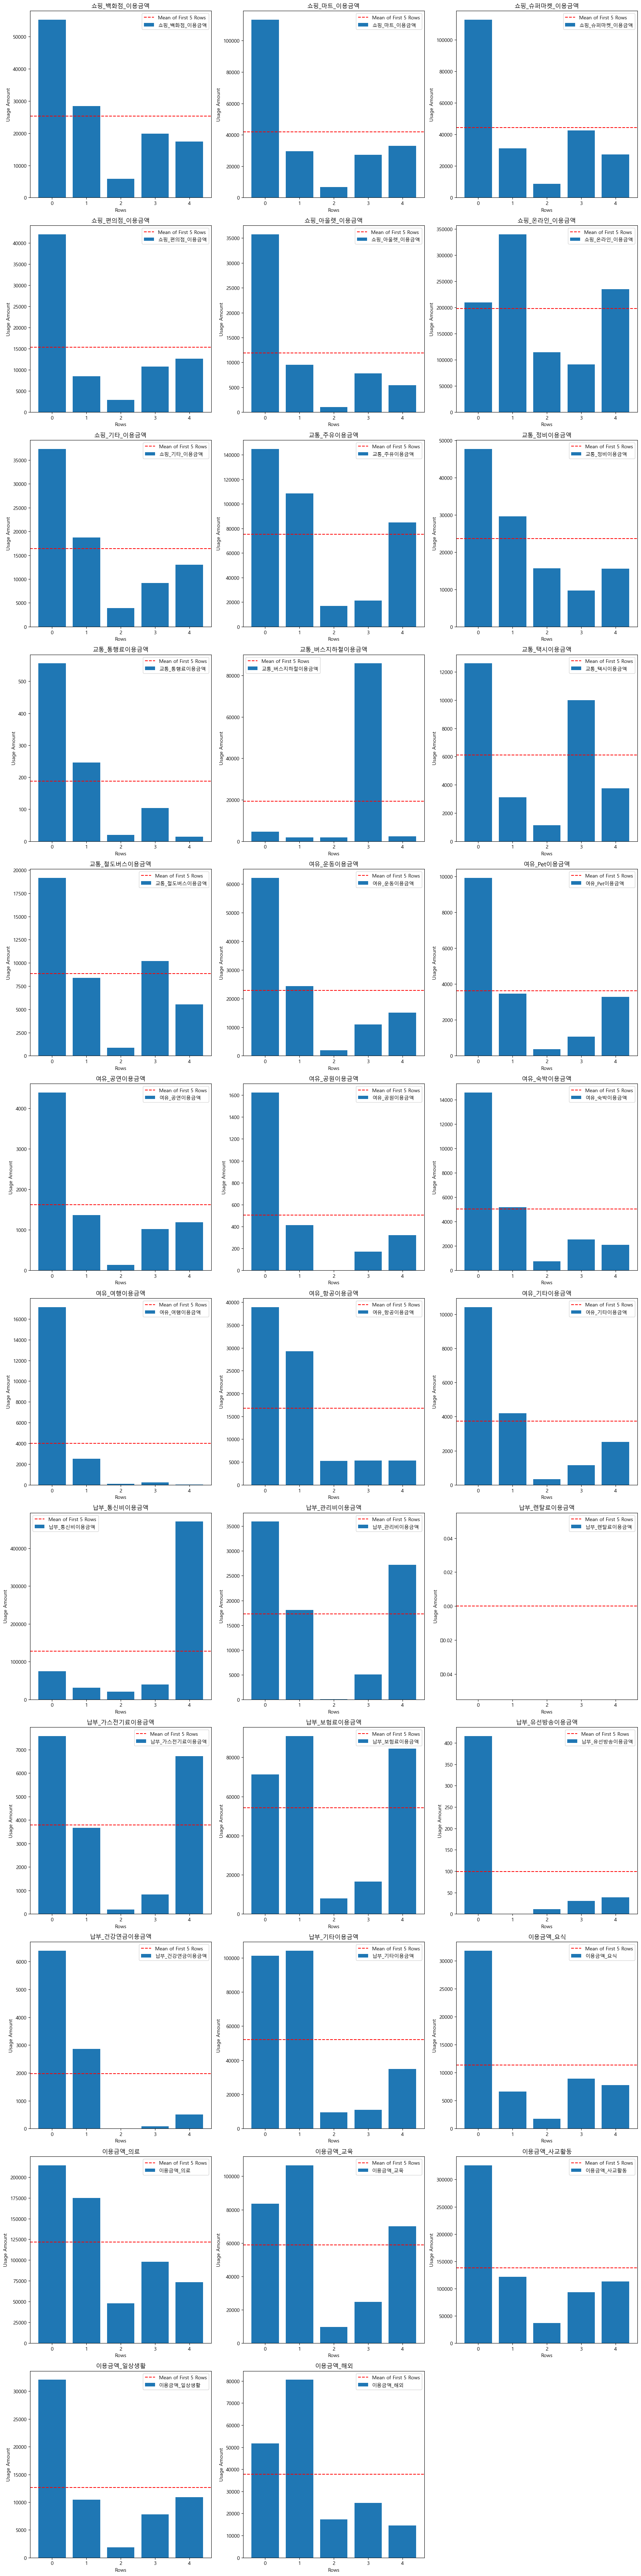

In [18]:
plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:5, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(5), cluster_mean.iloc[:5, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(5))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [37]:
df2_mean=df2.groupby('cluster').mean()
df2_mean

C:\Users\User\AppData\Local\Temp\ipykernel_12688\1768555959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_mean=df2.groupby('cluster').mean()


Unnamed: 0.1     Unnamed: 0    남녀구분코드         연령   소지여부_신용  \
cluster                                                                
0        149950.437261  149950.437261  1.474875  46.233617  0.999118   
1        147922.848746  147922.848746  1.466492  46.102583  0.998502   
2        149303.225904  149303.225904  1.464357  46.470884  0.976406   
3        147800.910581  147800.910581  1.520119  46.713860  0.998510   
4        149327.318290  149327.318290  1.473476  45.785432  0.999208   

              입회일자_신용  입회경과개월수_신용      탈회여부   회원여부_연체  수신거부여부_TM  ...  \
cluster                                                           ...   
0        2.012133e+07   77.877167  0.424919  0.008228   0.340876  ...   
1        2.011317e+07   87.634594  0.446275  0.014976   0.384500  ...   
2        2.011580e+07   84.464357  0.401104  0.046687   0.386546  ...   
3        2.011233e+07   88.690015  0.380030  0.005961   0.307004  ...   
4        2.013757e+07   58.141726  0.473476  0.011085   0.387173  ...   

          Frequency      Monetary  Recency_s  Frequency_s  Monetary_s  \
cluster                                                                 
0        168.852483  1.058788e+07   0.000759     0.029080    0.002438   
1        143.457507  9.662354e+06   0.002808     0.025211    0.002305   
2        163.474900  6.960748e+06   0.073377     0.028261    0.001917   
3        234.005961  4.170889e+06   0.003477     0.039007    0.001517   
4        146.676960  8.822139e+06   0.000528     0.025701    0.002185   

         labels_k  Recency_8  Frequency_8  Monetary_8  RFM_Score  
cluster                                                           
0        1.000000   7.990890     4.763738    5.131355  63.521566  
1        1.000000   7.966305     4.496818    4.985399  60.841105  
2        0.954317   7.313755     4.740964    4.256526  59.453068  
3        1.000000   7.958271     5.470939    3.545455  62.990620  
4        1.000000   7.993666     4.542359    4.977039  61.189475  

[5 rows x 304 columns]

In [27]:
gender = df2.groupby(['cluster','남녀구분코드']).size().unstack()
gender

남녀구분코드      1     2
cluster            
0        1787  1616
1        1425  1246
2        1067   925
3         322   349
4         665   598

In [24]:
life_stage=a = df2.groupby(['cluster','Life_Stage']).size().unstack()
life_stage

Life_Stage  1.Single  2.가족형성기  3.자녀출산기  4.자녀성장기(1)  5.자녀성장기(2)  6.자녀출가기  7.노령
cluster                                                                      
0                 61      246      301        1132         989      300   374
1                 37      156      217         913         743      272   333
2                 84      184      192         638         471      175   248
3                 16       51       43         130         185      109   137
4                 47      166      149         496         316       50    39

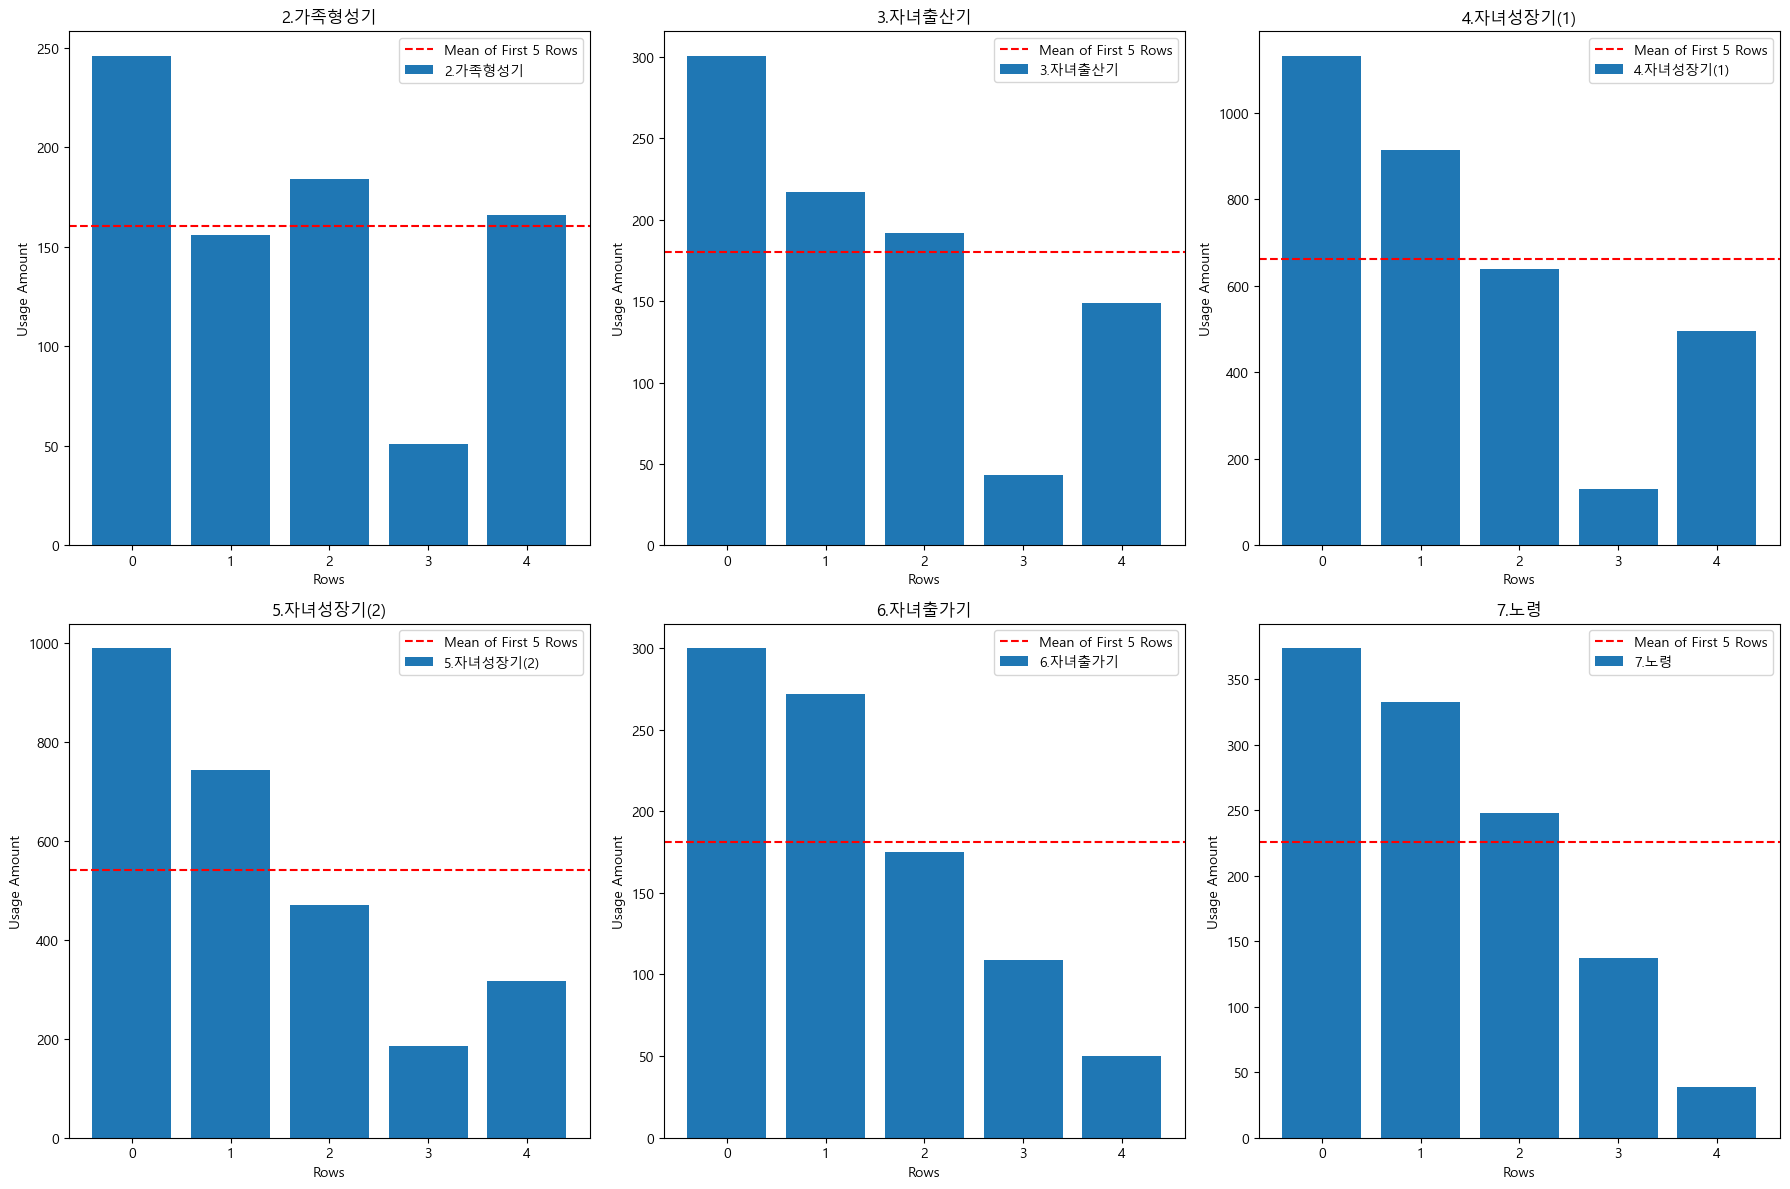

In [25]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = life_stage.iloc[:5, 1:].mean()

# Plotting for each column
num_columns = len(life_stage.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = life_stage.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(5), life_stage.iloc[:5, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(5))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# 군집 14개

In [213]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=14,random_state=42).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0        4
1        6
2        0
3       13
4        4

In [356]:
from sklearn.metrics import silhouette_score
silhouette_score(cosine_sim_df1, predict['Cluster'])

0.23720427751127196

In [367]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20,random_state=42).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0        3
1       12
2       11
3        9
4        3

In [368]:
from sklearn.metrics import silhouette_score
silhouette_score(cosine_sim_df1, predict['Cluster'])

0.22252193345985524

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


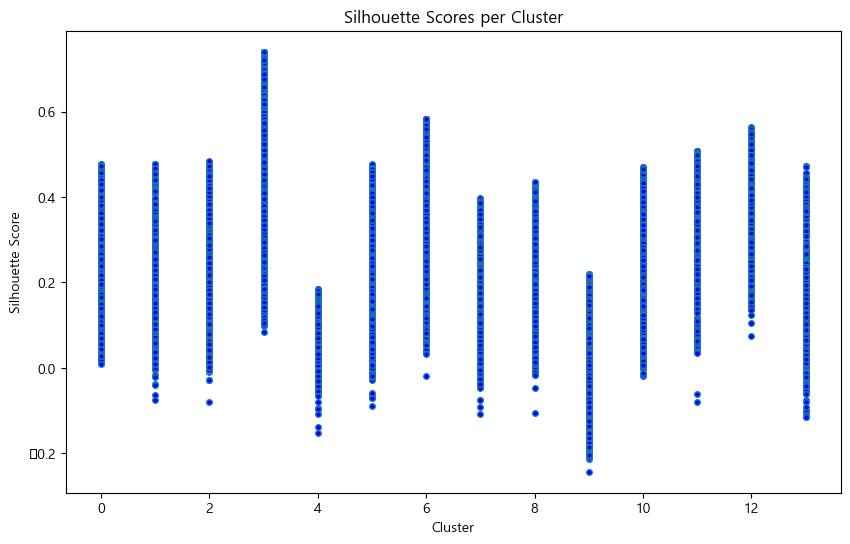

In [357]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# cosine_sim_df1: 클러스터링하려는 데이터 (가정)
# km: KMeans 모델 (가정)
# predict: 클러스터 예측 결과 (가정)

# 실루엣 스코어 계산
silhouette_values = silhouette_samples(cosine_sim_df1, predict['Cluster'])

# 각 데이터 포인트의 실루엣 스코어를 시각화
plt.figure(figsize=(10, 6))
plt.plot(predict['Cluster'], silhouette_values, 'o', markerfacecolor='blue', markersize=4)
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores per Cluster')
plt.show()


In [214]:
predict.value_counts()

Cluster
4          1601
3          1412
9          1080
7           775
5           715
2           648
6           569
0           541
8           531
10          531
13          438
11          435
1           396
12          328
dtype: int64

In [215]:
df2['cluster']=predict['Cluster'].values

In [216]:
cluster_mean=df2.groupby('cluster').mean()
cluster_mean

C:\Users\User\AppData\Local\Temp\ipykernel_11228\2150319796.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean=df2.groupby('cluster').mean()


Unnamed: 0.1     Unnamed: 0    남녀구분코드         연령   소지여부_신용  \
cluster                                                                
0        149831.190388  149831.190388  1.486137  46.223660  1.000000   
1        143063.477273  143063.477273  1.459596  45.626263  1.000000   
2        152518.632716  152518.632716  1.455247  45.598765  1.000000   
3        150628.730170  150628.730170  1.469547  46.378895  0.967422   
4        147998.184884  147998.184884  1.492192  46.377889  1.000000   
5        150693.034965  150693.034965  1.483916  45.627972  0.998601   
6        147554.706503  147554.706503  1.532513  46.998243  0.998243   
7        151557.686452  151557.686452  1.477419  46.023226  0.998710   
8        147135.709981  147135.709981  1.450094  46.357815  0.998117   
9        151397.968519  151397.968519  1.461111  46.335185  0.996296   
10       150597.472693  150597.472693  1.465160  46.557439  1.000000   
11       146156.142529  146156.142529  1.445977  46.404598  1.000000   
12       142940.765244  142940.765244  1.454268  46.128049  0.996951   
13       144208.646119  144208.646119  1.449772  45.945205  0.997717   

              입회일자_신용  입회경과개월수_신용      탈회여부   회원여부_연체  수신거부여부_TM  ...  \
cluster                                                           ...   
0        2.010960e+07   91.892791  0.423290  0.003697   0.375231  ...   
1        2.011587e+07   84.419192  0.414141  0.015152   0.414141  ...   
2        2.012070e+07   78.555556  0.391975  0.004630   0.283951  ...   
3        2.011792e+07   81.910765  0.404391  0.057365   0.400142  ...   
4        2.011402e+07   86.567770  0.443473  0.009994   0.369144  ...   
5        2.013711e+07   58.667133  0.458741  0.011189   0.338462  ...   
6        2.011252e+07   88.504394  0.376098  0.007030   0.302285  ...   
7        2.012660e+07   71.673548  0.459355  0.009032   0.365161  ...   
8        2.012516e+07   73.171375  0.361582  0.016949   0.320151  ...   
9        2.010735e+07   94.640741  0.407407  0.023148   0.379630  ...   
10       2.011562e+07   84.726930  0.455744  0.009416   0.370998  ...   
11       2.012362e+07   75.059770  0.482759  0.011494   0.388506  ...   
12       2.013810e+07   57.902439  0.533537  0.006098   0.332317  ...   
13       2.013586e+07   60.347032  0.468037  0.013699   0.440639  ...   

          Frequency      Monetary  Recency_s  Frequency_s  Monetary_s  \
cluster                                                                 
0        145.129390  9.312053e+06   0.001078     0.025465    0.002255   
1        139.063131  1.277118e+07   0.002736     0.024541    0.002751   
2        168.492284  8.237491e+06   0.001157     0.029025    0.002101   
3        166.957507  6.727999e+06   0.101098     0.028791    0.001884   
4        146.319800  1.358340e+07   0.001666     0.025647    0.002868   
5        147.327273  9.145987e+06   0.000117     0.025800    0.002231   
6        237.713533  3.854474e+06   0.003515     0.039572    0.001472   
7        184.929032  8.371444e+06   0.001075     0.031530    0.002120   
8        193.685499  7.772086e+06   0.001412     0.032864    0.002034   
9        154.698148  7.717963e+06   0.005787     0.026923    0.002026   
10       164.427495  8.963448e+06   0.000471     0.028406    0.002205   
11       138.694253  9.878408e+06   0.000575     0.024485    0.002336   
12       143.262195  8.944429e+06   0.000254     0.025181    0.002202   
13       147.150685  7.516422e+06   0.002093     0.025773    0.001997   

         labels_k  Recency_8  Frequency_8  Monetary_8  RFM_Score  
cluster                                                           
0        1.000000   7.987061     4.526802    5.051756  61.347878  
1        1.000000   7.967172     4.401515    5.517677  62.129931  
2        1.000000   7.986111     4.791667    4.819444  62.543087  
3        0.935552   7.060907     4.775496    4.152266  59.124567  
4        1.000000   7.980012     4.497814    5.387883  62.401354  
5        1.000000   7.998601     4.549650    5.078

In [ ]:
cluster_mean

C:\Users\User\AppData\Local\Temp\ipykernel_11228\619950579.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


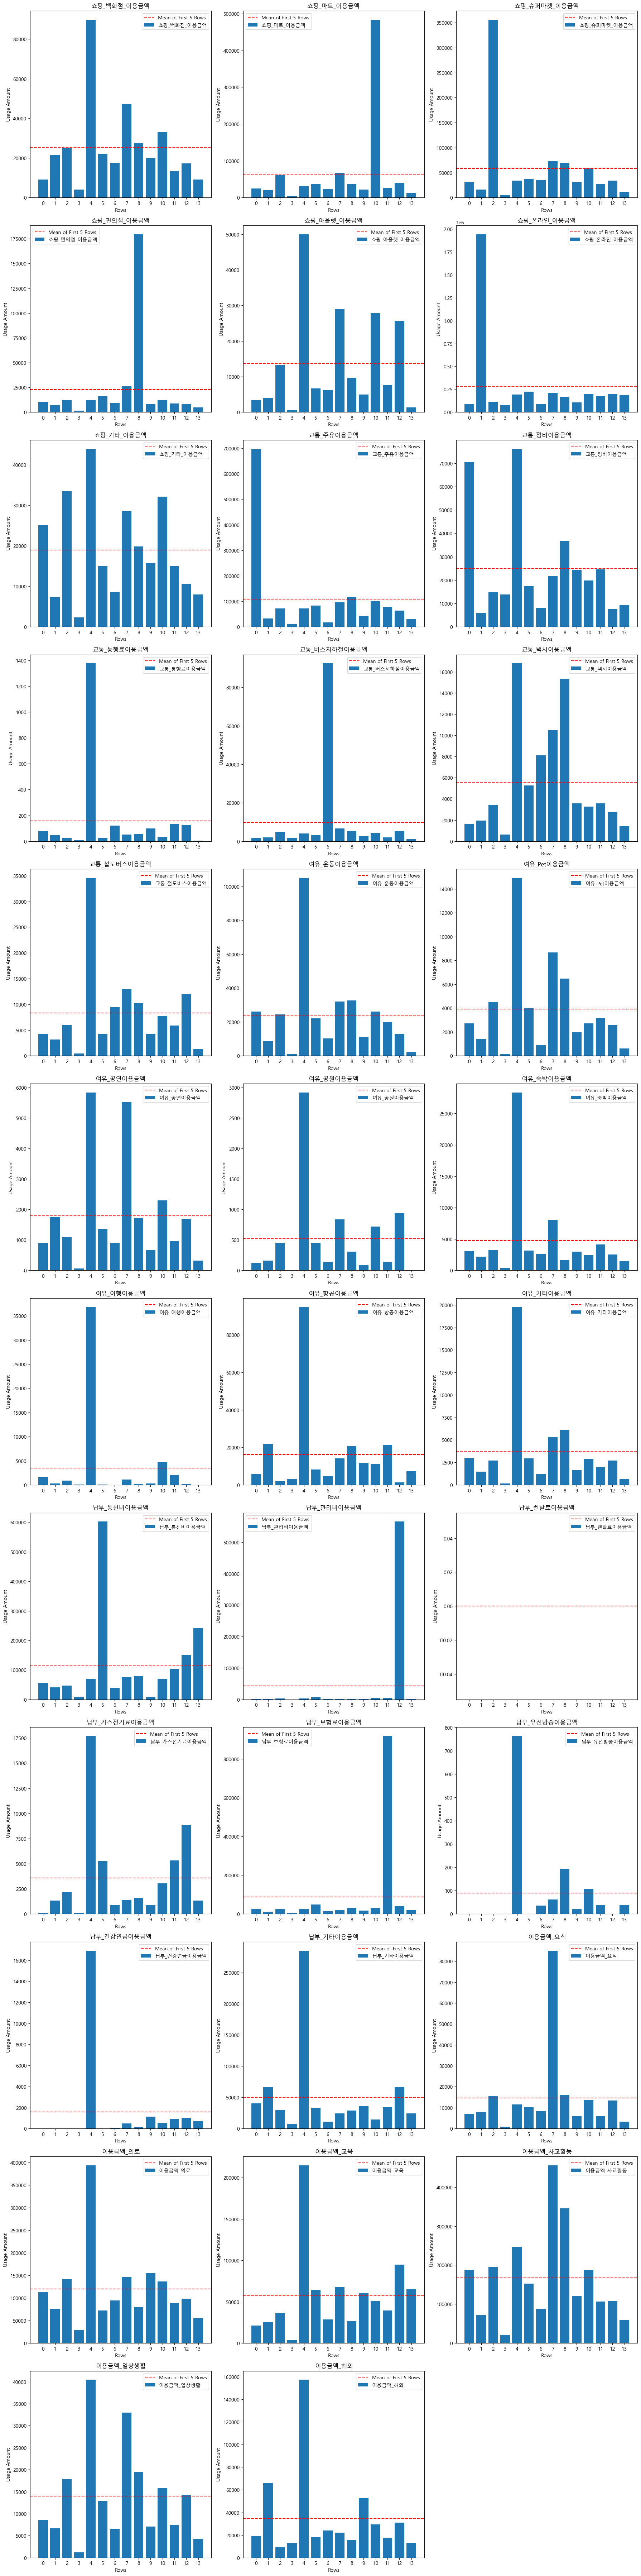

In [15]:
plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:14, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), cluster_mean.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [289]:
pd.set_option('display.max_columns', 300)
round(cluster_mean,3)


Unnamed: 0.1  Unnamed: 0  남녀구분코드      연령  소지여부_신용       입회일자_신용  \
cluster                                                                    
0          149831.190  149831.190   1.486  46.224    1.000  2.010960e+07   
1          143063.477  143063.477   1.460  45.626    1.000  2.011587e+07   
2          152518.633  152518.633   1.455  45.599    1.000  2.012070e+07   
3          150628.730  150628.730   1.470  46.379    0.967  2.011792e+07   
4          147998.185  147998.185   1.492  46.378    1.000  2.011402e+07   
5          150693.035  150693.035   1.484  45.628    0.999  2.013711e+07   
6          147554.707  147554.707   1.533  46.998    0.998  2.011252e+07   
7          151557.686  151557.686   1.477  46.023    0.999  2.012660e+07   
8          147135.710  147135.710   1.450  46.358    0.998  2.012516e+07   
9          151397.969  151397.969   1.461  46.335    0.996  2.010735e+07   
10         150597.473  150597.473   1.465  46.557    1.000  2.011562e+07   
11         146156.143  146156.143   1.446  46.405    1.000  2.012362e+07   
12         142940.765  142940.765   1.454  46.128    0.997  2.013810e+07   
13         144208.646  144208.646   1.450  45.945    0.998  2.013586e+07   

         입회경과개월수_신용   탈회여부  회원여부_연체  수신거부여부_TM  수신거부여부_DM  수신거부여부_메일  \
cluster                                                                
0            91.893  0.423    0.004      0.375      0.294      0.299   
1            84.419  0.414    0.015      0.414      0.336      0.356   
2            78.556  0.392    0.005      0.284      0.259      0.261   
3            81.911  0.404    0.057      0.400      0.344      0.343   
4            86.568  0.443    0.010      0.369      0.305      0.313   
5            58.667  0.459    0.011      0.338      0.290      0.287   
6            88.504  0.376    0.007      0.302      0.248      0.262   
7            71.674  0.459    0.009      0.365      0.323      0.325   
8            73.171  0.362    0.017      0.320      0.267      0.273   
9            94.641  0.407    0.023      0.380      0.337      0.331   
10           84.727  0.456    0.009      0.371      0.324      0.331   
11           75.060  0.483    0.011      0.389      0.317      0.340   
12           57.902  0.534    0.006      0.332      0.293      0.314   
13           60.347  0.468    0.014      0.441      0.372      0.370   

         수신거부여부_SMS  BL여부_R12M  탈회횟수_누적  탈회횟수_발급1년이내  마케팅동의여부  유효카드수_신용체크  \
cluster                                                                     
0             0.386      0.000    0.521        0.054    0.815       1.865   
1             0.414      0.000    0.551        0.116    0.760       1.957   
2             0.343      0.000    0.491        0.052    0.829       1.679   
3             0.408      0.042    0.510        0.067    0.795       2.135   
4             0.364      0.001    0.580        0.097    0.800       1.910   
5             0.297      0.001    0.610        0.112    0.825       1.871   
6             0.343      0.000    0.471        0.069    0.837       1.840   
7             0.350      0.000    0.601        0.083    0.765       1.775   
8             0.350      0.000    0.467        0.049    0.817       1.834   
9             0.406      0.000    0.527        0.081    0.792       1.853   
10            0.333      0.000    0.620        0.117    0.793       1.766   
11            0.372      0.005    0.628        0.106    0.789       1.809   
12            0.259      0.000    0.774        0.174    0.796       1.774   
13            0.356      0.000    0.616        0.139    0.753       1.868   

         유효카드수_신용  유효카드수_체크  이용금액_R3M_신용체크  이용금액_R3M_신용  이용금액_R3M_체크  \
cluster                                                                
0           1.558     0.307    1983896.725  1968195.946    15700.778   
1           1.482     0.475    3004083.018  2980445.280    23637.737   
2           1.349     0.330    1667917.861  1659085.623     8832.238   
3           1.522     0.613     357188.440   3

In [349]:
select=['쇼핑_아울렛_이용금액','쇼핑_온라인_이용금액','교통_정비이용금액','교통_통행료이용금액','교통_버스지하철이용금액','교통_택시이용금액','교통_철도버스이용금액','여유_운동이용금액','여유_여행이용금액','이용금액_교육','이용금액_일상생활','이용금액_해외','납부_통신비이용금액','납부_관리비이용금액','납부_렌탈료이용금액','납부_가스전기료이용금액','납부_보험료이용금액']

In [350]:
a=cluster_mean.loc[:, select]
round(a.T,3)

cluster              0            1           2          3           4   \
쇼핑_아울렛_이용금액    3473.031     3942.652   13277.515    538.159   49976.732   
쇼핑_온라인_이용금액   87663.569  1943567.854  113473.591  75336.153  193632.139   
교통_정비이용금액     70508.865     5945.593   14744.907  13748.499   76186.956   
교통_통행료이용금액       80.222       46.970      27.315      7.790    1376.515   
교통_버스지하철이용금액   1689.778     2047.879    4698.272   1564.561    4057.258   
교통_택시이용금액      1640.444     1940.657    3410.139    632.635   16783.835   
교통_철도버스이용금액    4243.808     3128.788    6035.185    480.453   34557.645   
여유_운동이용금액     26211.091     8788.081   24443.194   1241.360  105013.052   
여유_여행이용금액      1645.562      326.263     897.840     43.725   36818.801   
이용금액_교육       21304.787    25524.015   36466.273   3971.926  214962.954   
이용금액_일상생활      8518.355     6630.278   17852.901   1213.612   40413.338   
이용금액_해외       18982.510    65955.664    9077.415  12849.760  157327.424   
납부_통신비이용금액    55657.989    40909.396   46914.796   9821.181   68562.909   
납부_관리비이용금액      416.784      400.202    3468.256      0.000    2696.540   
납부_렌탈료이용금액        0.000        0.000       0.000      0.000       0.000   
납부_가스전기료이용금액    130.314     1332.020    2136.281    123.208   17677.370   
납부_보험료이용금액    26005.349    11976.470   25798.502   4824.640   27410.092   

cluster               5          6           7           8           9   \
쇼핑_아울렛_이용금액     6664.671   6203.093   29018.506    9678.021    4929.669   
쇼핑_온라인_이용금액   223179.225  85017.218  207086.472  165543.181  108051.085   
교통_정비이용금액      17530.029   8014.589   21732.729   36760.638   24307.049   
교통_통행료이용금액        23.427    122.320      52.903      55.556      97.963   
교통_버스지하철이용금액    3068.014  92443.656    6693.806    5188.682    2755.898   
교통_택시이용금액       5250.056   8122.671   10469.832   15358.267    3564.315   
교통_철도버스이용금액     4277.762   9492.794   12974.839   10283.804    4270.556   
여유_운동이용금액      21993.371  10307.944   31964.581   32750.565   11106.500   
여유_여행이용금액         74.126      0.000    1143.032     155.367     324.074   
이용금액_교육        64555.117  28505.554   67525.076   26329.718   60812.491   
이용금액_일상생활      12905.217   6457.750   32984.800   19516.874    7082.528   
이용금액_해외        18288.912  23882.457   21953.132   15554.650   52870.914   
납부_통신비이용금액    602448.642  38658.042   74648.690   78035.019    9312.077   
납부_관리비이용금액      7865.119   2254.200    2205.497    2057.552     986.685   
납부_렌탈료이용금액         0.000      0.000       0.000       0.000       0.000   
납부_가스전기료이용금액    5278.434    900.369    1374.916    1594.143     868.810   
납부_보험료이용금액     48485.077  14791.659   19815.538   31546.507   16735.345   

cluster               10          11          12          13  
쇼핑_아울렛_이용금액    27765.499    7589.655   25649.146    1311.324  
쇼핑_온라인_이용금액   197963.725  171641.193  201290.689  188269.080  
교통_정비이용금액      19802.849   24601.356    7711.317    9386.484  
교통_통행료이용금액        31.073     136.322     123.780       5.479  
교통_버스지하철이용금액    4275.895    1928.598    5231.677    1310.616  
교통_택시이용금액       3272.655    3569.172    2766.159    1424.292  
교통_철도버스이용금액     7786.629    5880.690   12007.927    1286.986  
여유_운동이용금액      26170.056   20009.862   12809.146    2296.347  
여유_여행이용금액       4764.595    2048.494     149.390       0.000  
이용금액_교육        50731.196   39518.138   94830.762   64862.785  
이용금액_일상생활      15810.716    7405.103   14190.793    4238.128  
이용금액_해외        29517.418   17553.237   31047.168   13350.498  
납부_통신비이용금액     70333.309  102686.703  150083.912  241773.078  
납부_관리비이용금액      4790.621    5381.931  565429.512     760.000  
납부_렌탈료이용금액         0.000       0.000       0.000       0.000  
납부_가스전기료이용금액    3035.122    5306.874    8829.970    1324.498  
납부_보험료이용금액     31979.307  918264.508   40966.845   21625.509

In [352]:
a['total']=

쇼핑_아울렛_이용금액   쇼핑_온라인_이용금액     교통_정비이용금액   교통_통행료이용금액  교통_버스지하철이용금액  \
cluster                                                                        
0         3473.031423  8.766357e+04  70508.865065    80.221811   1689.778189   
1         3942.651515  1.943568e+06   5945.593434    46.969697   2047.878788   
2        13277.515432  1.134736e+05  14744.907407    27.314815   4698.271605   
3          538.158640  7.533615e+04  13748.498584     7.790368   1564.560907   
4        49976.732042  1.936321e+05  76186.956277  1376.514678   4057.257964   
5         6664.671329  2.231792e+05  17530.029371    23.426573   3068.013986   
6         6203.093146  8.501722e+04   8014.588752   122.319859  92443.655536   
7        29018.505806  2.070865e+05  21732.729032    52.903226   6693.806452   
8         9678.020716  1.655432e+05  36760.638418    55.555556   5188.681733   
9         4929.668519  1.080511e+05  24307.049074    97.962963   2755.898148   
10       27765.499058  1.979637e+05  19802.849341    31.073446   4275.894539   
11        7589.655172  1.716412e+05  24601.356322   136.321839   1928.597701   
12       25649.146341  2.012907e+05   7711.317073   123.780488   5231.676829   
13        1311.324201  1.882691e+05   9386.484018     5.479452   1310.616438   

            교통_택시이용금액   교통_철도버스이용금액      여유_운동이용금액     여유_여행이용금액  \
cluster                                                            
0         1640.443623   4243.807763   26211.090573   1645.561922   
1         1940.656566   3128.787879    8788.080808    326.262626   
2         3410.138889   6035.185185   24443.194444    897.839506   
3          632.634561    480.453258    1241.359773     43.725212   
4        16783.835103  34557.645222  105013.051843  36818.800750   
5         5250.055944   4277.762238   21993.370629     74.125874   
6         8122.671353   9492.794376   10307.943761      0.000000   
7        10469.832258  12974.838710   31964.580645   1143.032258   
8        15358.267420  10283.804143   32750.564972    155.367232   
9         3564.314815   4270.555556   11106.500000    324.074074   
10        3272.655367   7786.629002   26170.056497   4764.595104   
11        3569.172414   5880.689655   20009.862069   2048.494253   
12        2766.158537  12007.926829   12809.146341    149.390244   
13        1424.292237   1286.986301    2296.347032      0.000000   

               이용금액_교육     이용금액_일상생활        이용금액_해외     납부_통신비이용금액  \
cluster                                                              
0         21304.787431   8518.354898   18982.510166   55657.988909   
1         25524.015152   6630.277778   65955.664141   40909.396465   
2         36466.273148  17852.901235    9077.415123   46914.796296   
3          3971.926346   1213.611898   12849.759915    9821.181303   
4        214962.954403  40413.337914  157327.424110   68562.908807   
5         64555.117483  12905.216783   18288.911888  602448.641958   
6         28505.553603   6457.750439   23882.456942   38658.042179   
7         67525.076129  32984.800000   21953.131613   74648.690323   
8         26329.717514  19516.873823   15554.649718   78035.018832   
9         60812.490741   7082.527778   52870.913889    9312.076852   
10        50731.195857  15810.715631   29517.418079   70333.308851   
11        39518.137931   7405.103448   17553.236782  102686.703448   
12        94830.762195  14190.792683   31047.167683  150083.911585   
13        64862.785388   4238.127854   13350.497717  241773.077626   

            납부_관리비이용금액  납부_렌탈료이용금액  납부_가스전기료이용금액     납부_보험료이용금액  
cluster                                                          
0           416.783734         0.0    130.314233   26005.349353  
1           400.202020         0.0   1332.020202   11976.469697  
2          3468.256173         0.0   2136.280864   25798.501543  
3             0.000000         0.0    123.208215    4824.639518  
4          2696.539663         0.0  17677.370394   27410.092442  
5          7865.118881         0.0   5278.433566   48485.

In [353]:
# 각 행의 합계 계산
row_sums = a.sum(axis=1)

# 비중을 계산하여 새로운 데이터프레임 생성
weights = a.divide(row_sums, axis=0)
weights

쇼핑_아울렛_이용금액  쇼핑_온라인_이용금액  교통_정비이용금액  교통_통행료이용금액  교통_버스지하철이용금액  \
cluster                                                                  
0           0.010583     0.267127   0.214853    0.000244      0.005149   
1           0.001858     0.915714   0.002801    0.000022      0.000965   
2           0.041142     0.351614   0.045689    0.000085      0.014558   
3           0.004258     0.596025   0.108772    0.000062      0.012378   
4           0.047713     0.184860   0.072735    0.001314      0.003873   
5           0.006397     0.214207   0.016825    0.000022      0.002945   
6           0.018507     0.253651   0.023912    0.000365      0.275808   
7           0.053575     0.382329   0.040124    0.000098      0.012358   
8           0.021487     0.367540   0.081616    0.000123      0.011520   
9           0.016001     0.350729   0.078900    0.000318      0.008946   
10          0.055751     0.397493   0.039762    0.000062      0.008586   
11          0.005691     0.128713   0.018448    0.000102      0.001446   
12          0.021864     0.171586   0.006573    0.000106      0.004460   
13          0.002370     0.340312   0.016967    0.000010      0.002369   

         교통_택시이용금액  교통_철도버스이용금액  여유_운동이용금액  여유_여행이용금액   이용금액_교육  이용금액_일상생활  \
cluster                                                                      
0         0.004999     0.012932   0.079870   0.005014  0.064919   0.025957   
1         0.000914     0.001474   0.004141   0.000154  0.012026   0.003124   
2         0.010567     0.018701   0.075741   0.002782  0.112996   0.055320   
3         0.005005     0.003801   0.009821   0.000346  0.031424   0.009602   
4         0.016023     0.032992   0.100256   0.035151  0.205224   0.038582   
5         0.005039     0.004106   0.021109   0.000071  0.061960   0.012386   
6         0.024234     0.028322   0.030754   0.000000  0.085047   0.019267   
7         0.019330     0.023955   0.059014   0.002110  0.124667   0.060898   
8         0.034099     0.022832   0.072713   0.000345  0.058457   0.043331   
9         0.011570     0.013862   0.036051   0.001052  0.197394   0.022990   
10        0.006571     0.015635   0.052547   0.009567  0.101864   0.031746   
11        0.002677     0.004410   0.015005   0.001536  0.029634   0.005553   
12        0.002358     0.010236   0.010919   0.000127  0.080836   0.012097   
13        0.002575     0.002326   0.004151   0.000000  0.117245   0.007661   

          이용금액_해외  납부_통신비이용금액  납부_관리비이용금액  납부_렌탈료이용금액  납부_가스전기료이용금액  \
cluster                                                               
0        0.057843    0.169600    0.001270         0.0      0.000397   
1        0.031075    0.019274    0.000189         0.0      0.000628   
2        0.028128    0.145372    0.010747         0.0      0.006620   
3        0.101661    0.077701    0.000000         0.0      0.000975   
4        0.150200    0.065457    0.002574         0.0      0.016877   
5        0.017554    0.578228    0.007549         0.0      0.005066   
6        0.071254    0.115337    0.006725         0.0      0.002686   
7        0.040531    0.137819    0.004072         0.0      0.002538   
8        0.034535    0.173254    0.004568         0.0      0.003539   
9        0.171616    0.030227    0.003203         0.0      0.002820   
10       0.059268    0.141223    0.009619         0.0      0.006094   
11       0.013163    0.077004    0.004036         0.0      0.003980   
12       0.026466    0.127936    0.481989         0.0      0.007527   
13       0.024132    0.437025    0.001374         0.0      0.002394   

         납부_보험료이용금액  
cluster              
0          0.079243  
1          0.005643  
2          0.079940  
3          0.038170  
4          0.026168  
5          0.046536  
6          0.044131  
7          0.036584  
8          0.070040  
9          0.054322  
10         0.064212  
11         0.688601  
12         0.034921  
13         0.039090

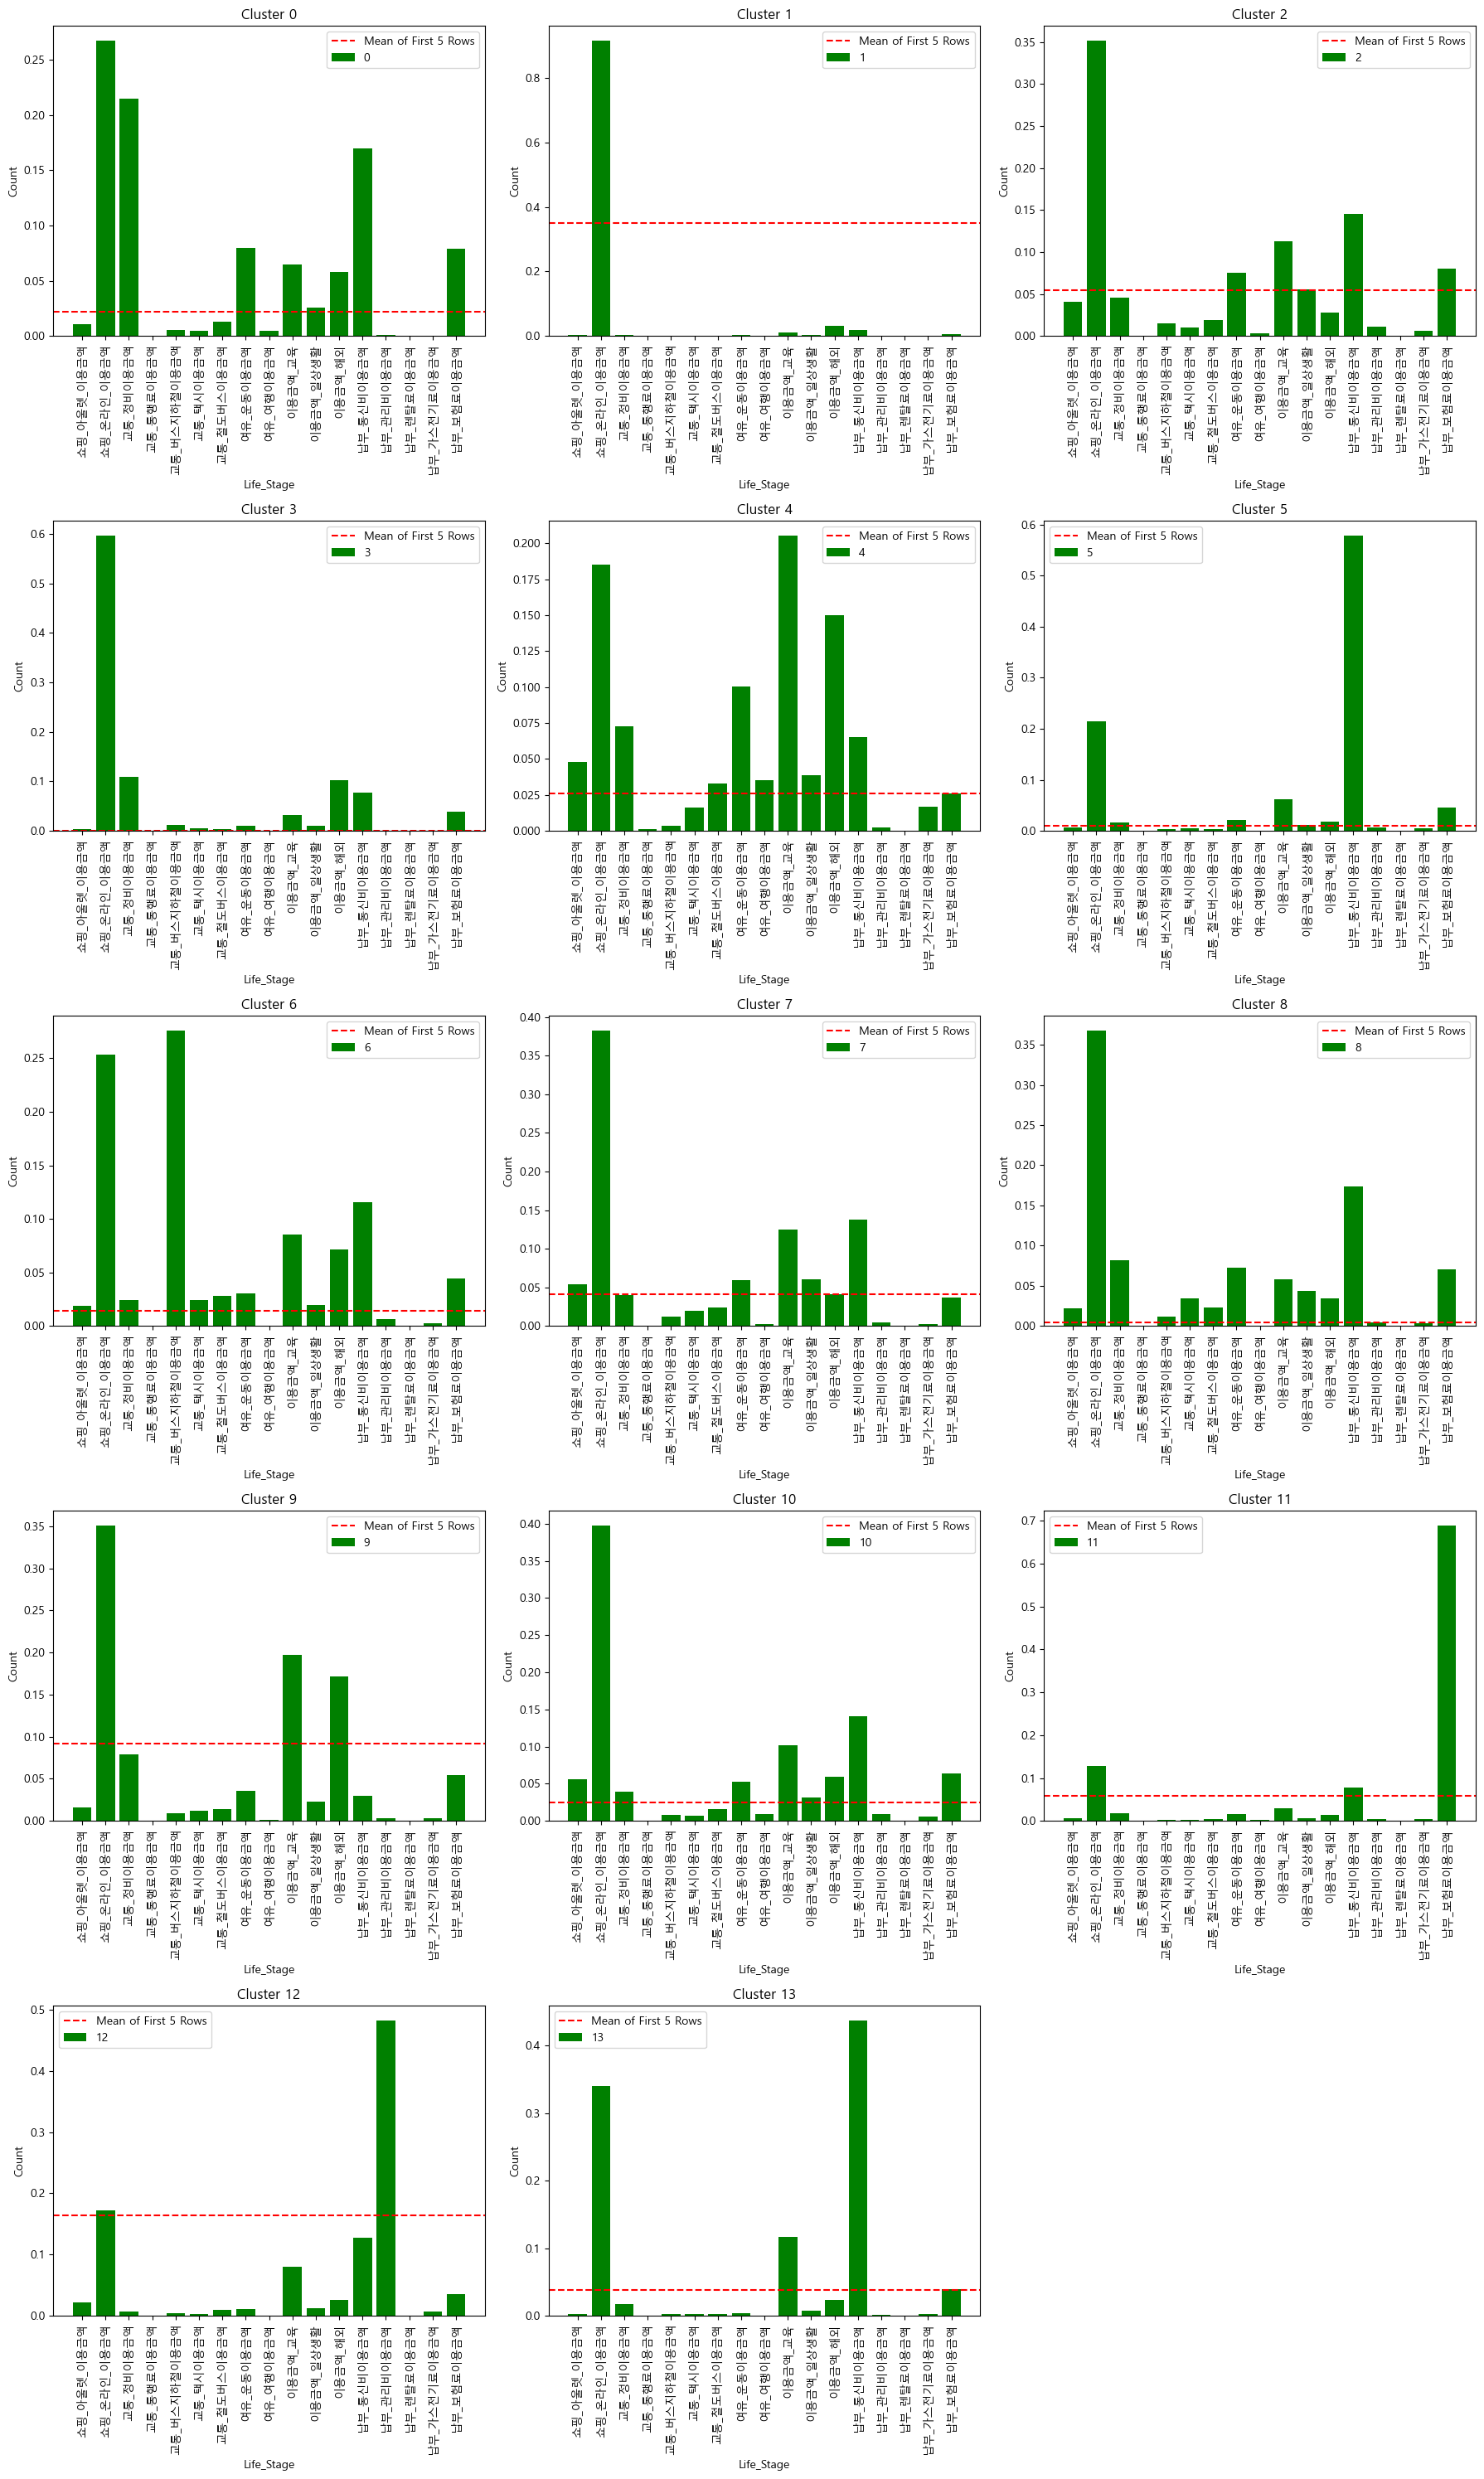

In [354]:
mean_of_first_5_rows = weights.loc[:, select].mean()

# Plotting for each column
num_clusters = len(cluster_mean)
num_rows = (num_clusters + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for cluster_index in range(num_clusters):
    row = cluster_index // 3
    col = cluster_index % 3
    
    ax = axes[row, col]
    cluster_name = weights.index[cluster_index]
    cluster_data = weights.loc[cluster_name, select]
    
    ax.bar(range(len(cluster_data)), cluster_data, label=cluster_name, color='green')
    ax.axhline(y=mean_of_first_5_rows[cluster_name], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Life_Stage')
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster {cluster_name}')
    ax.legend()
    ax.set_xticks(range(len(cluster_data)))
    ax.set_xticklabels(cluster_data.index, rotation=90)

# Remove any unused subplots
if num_clusters % 3 != 0:
    for i in range(num_clusters % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

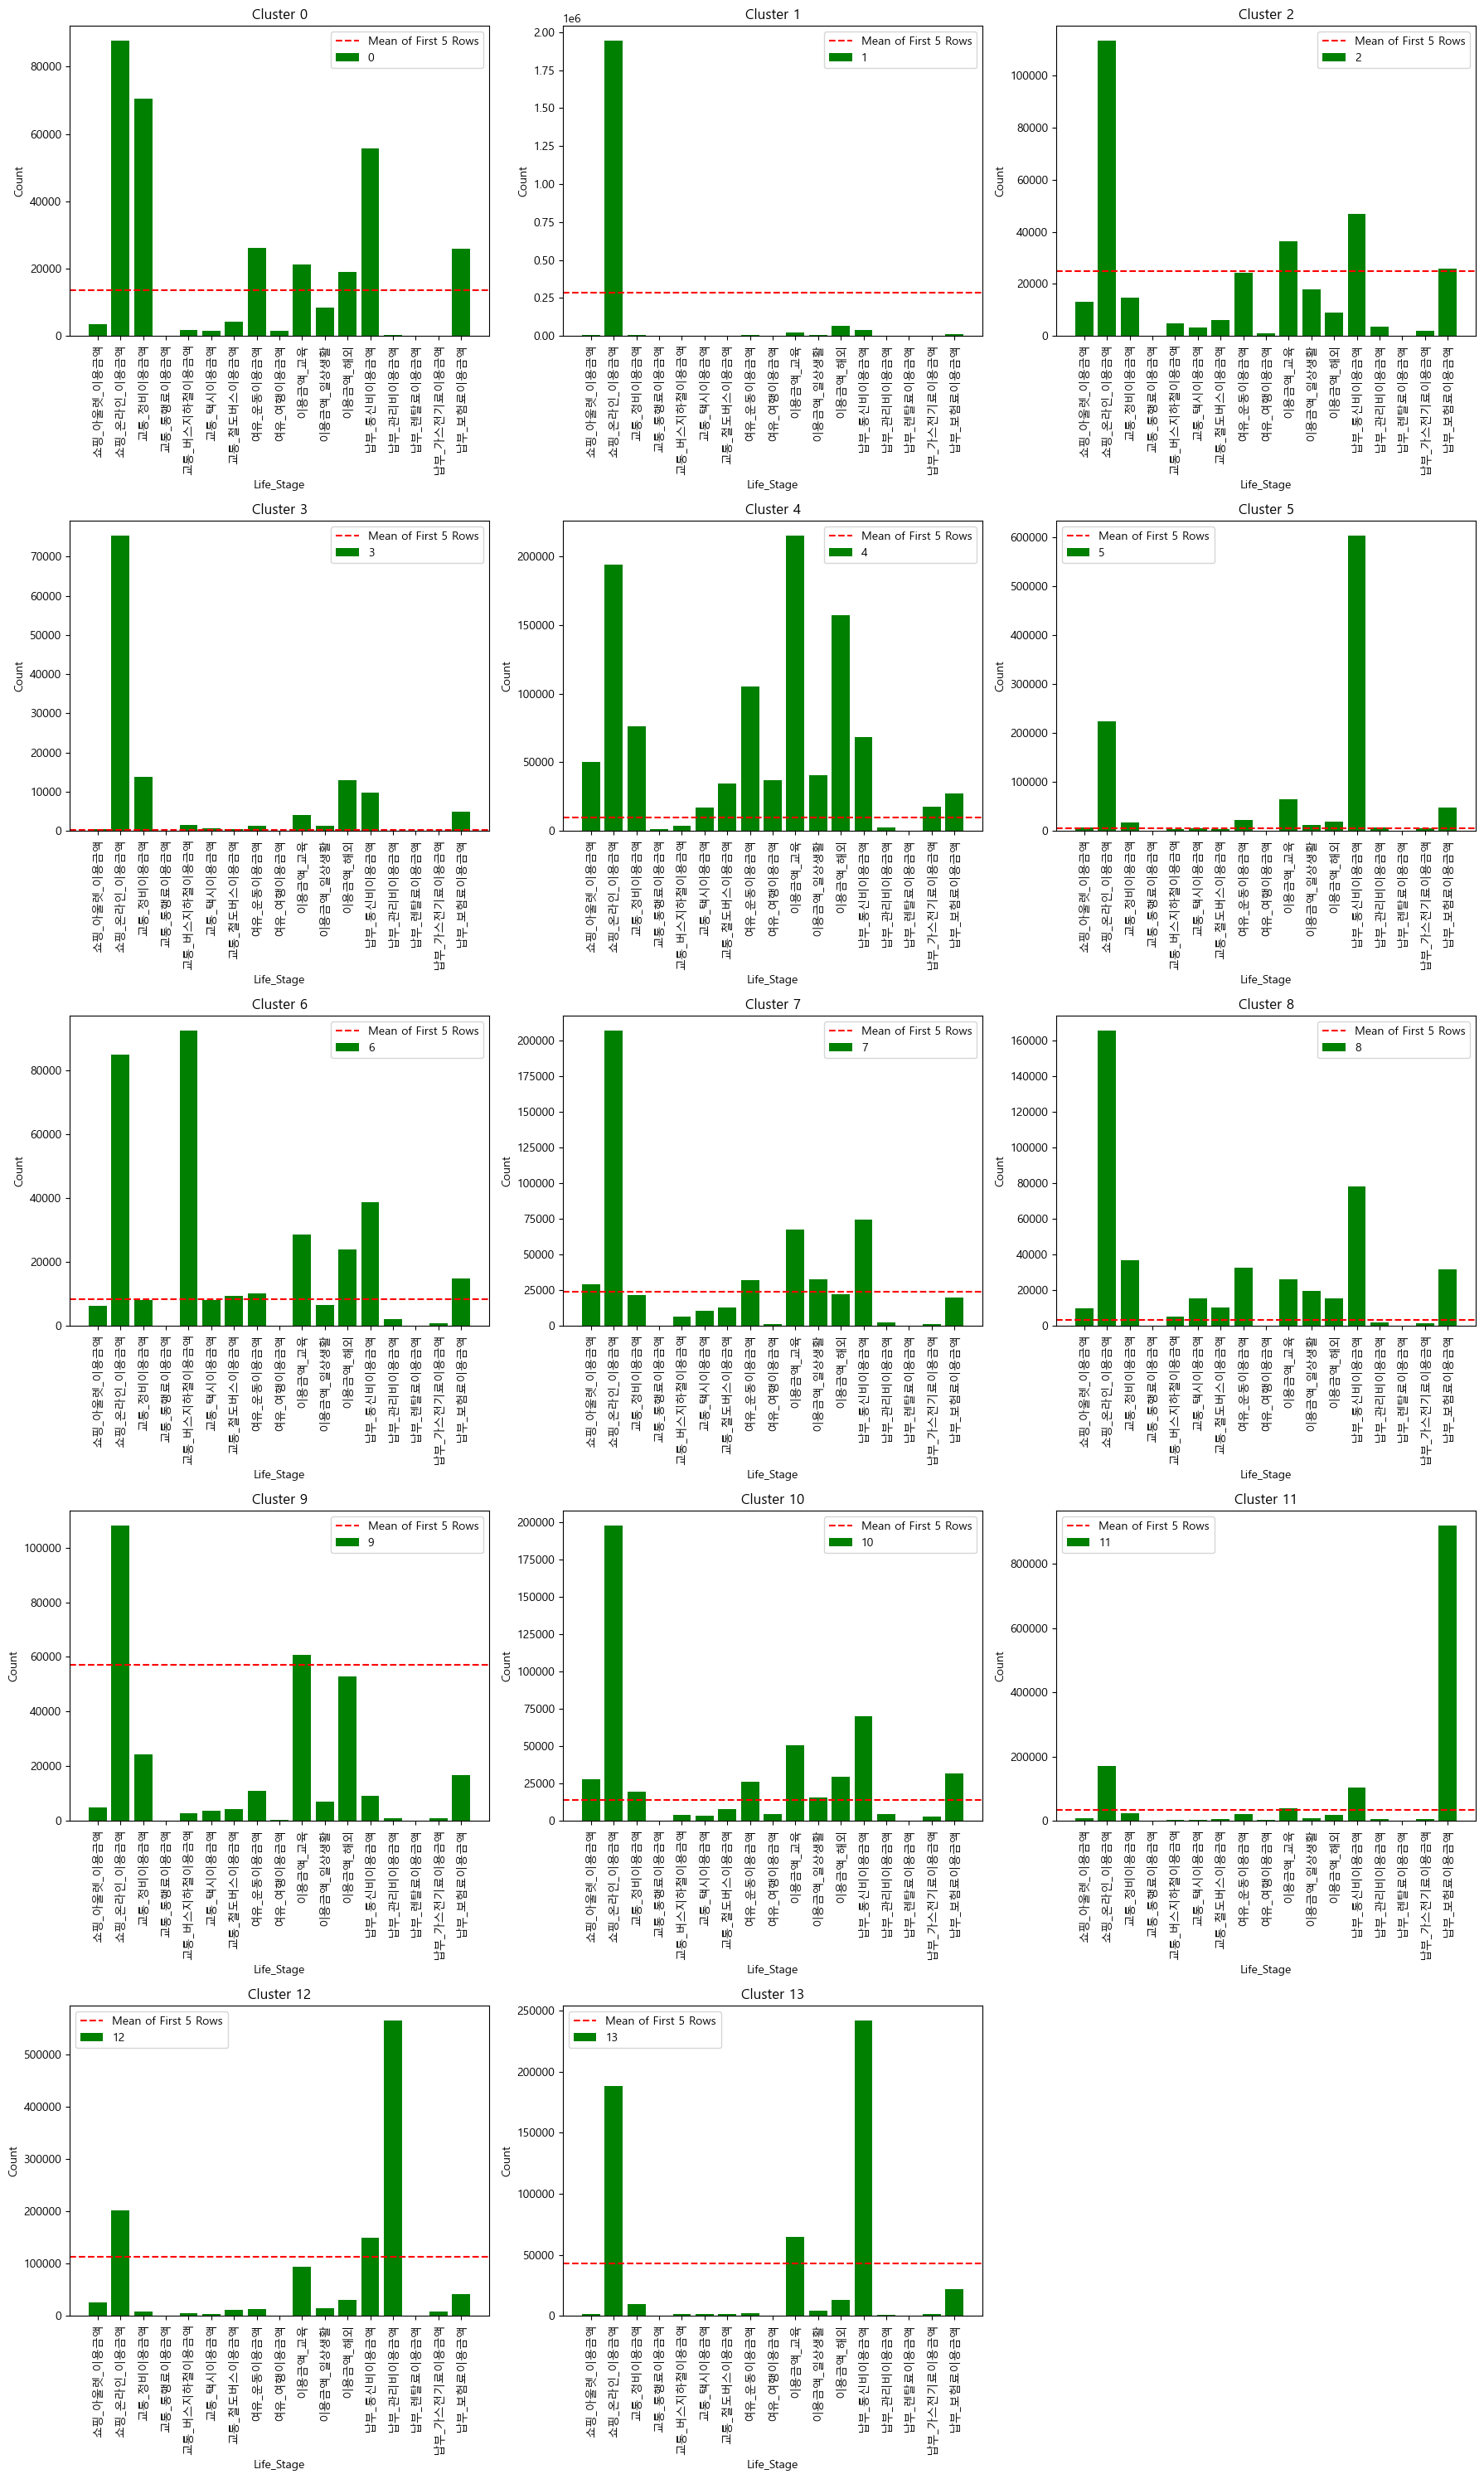

In [351]:
mean_of_first_5_rows = cluster_mean.loc[:, select].mean()

# Plotting for each column
num_clusters = len(cluster_mean)
num_rows = (num_clusters + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for cluster_index in range(num_clusters):
    row = cluster_index // 3
    col = cluster_index % 3
    
    ax = axes[row, col]
    cluster_name = cluster_mean.index[cluster_index]
    cluster_data = cluster_mean.loc[cluster_name, select]
    
    ax.bar(range(len(cluster_data)), cluster_data, label=cluster_name, color='green')
    ax.axhline(y=mean_of_first_5_rows[cluster_name], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Life_Stage')
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster {cluster_name}')
    ax.legend()
    ax.set_xticks(range(len(cluster_data)))
    ax.set_xticklabels(cluster_data.index, rotation=90)

# Remove any unused subplots
if num_clusters % 3 != 0:
    for i in range(num_clusters % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

In [ ]:
mean_of_first_5_rows = cluster_mean.loc[:, select].mean()

# Plotting for each column
num_clusters = len(cluster_mean)
num_rows = (num_clusters + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for cluster_index in range(num_clusters):
    row = cluster_index // 3
    col = cluster_index % 3
    
    ax = axes[row, col]
    cluster_name = cluster_mean.index[cluster_index]
    cluster_data = cluster_mean.loc[cluster_name, select]
    
    ax.bar(range(len(cluster_data)), cluster_data, label=cluster_name, color='green')
    ax.axhline(y=mean_of_first_5_rows[cluster_name], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Life_Stage')
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster {cluster_name}')
    ax.legend()
    ax.set_xticks(range(len(cluster_data)))
    ax.set_xticklabels(cluster_data.index, rotation=90)

# Remove any unused subplots
if num_clusters % 3 != 0:
    for i in range(num_clusters % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:14, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    sns.barplot(x=range(14), y=cluster_mean.iloc[:14, col_index], palette='GnBu', ax=ax)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()





import matplotlib.pyplot as plt
import seaborn as sns

# 클러스터별로 직업분포 그래프 그리기
num_clusters = len(cluster_mean)
num_rows = (num_clusters + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# 모든 그래프의 y 눈금 범위 설정을 위한 최대값 찾기
max_y_value = cluster_mean.iloc[:, :-1].max().max()

for cluster_index in range(num_clusters):
    row = cluster_index // 3
    col = cluster_index % 3
    
    # 해당 클러스터의 데이터 가져오기
    cluster_data = cluster_mean.iloc[cluster_index]
    
    # 그래프 그리기
    ax = axes[row, col]
    sns.barplot(x=cluster_data.index, y=cluster_data.values, palette='GnBu',ax=ax)
    ax.set_xlabel('자격구분상세')
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster {cluster_index}')
    ax.set_xticklabels(cluster_data.index, rotation=90)
    
    # 모든 그래프의 y 눈금 범위 설정
    ax.set_ylim(0, max_y_value)
    
# Remove any unused subplots
if num_clusters % 3 != 0:
    for i in range(num_clusters % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

AttributeError: 'bool' object has no attribute 'all'

In [205]:
life_stage=a = df2.groupby(['cluster','Life_Stage']).size().unstack()
life_stage

Life_Stage  1.Single  2.가족형성기  3.자녀출산기  4.자녀성장기(1)  5.자녀성장기(2)  6.자녀출가기   7.노령
cluster                                                                       
0                8.0     34.0     36.0       153.0       202.0     60.0   48.0
1                6.0     29.0     65.0       183.0        69.0     20.0   24.0
2                8.0     16.0     23.0       169.0       200.0     94.0  138.0
3               68.0    147.0    131.0       445.0       341.0    120.0  160.0
4               26.0    113.0    125.0       556.0       464.0    144.0  173.0
5               29.0     98.0     87.0       273.0       179.0     25.0   24.0
6               15.0     44.0     36.0       111.0       157.0     90.0  116.0
7               22.0     76.0     79.0       277.0       200.0     60.0   61.0
8               18.0     72.0     64.0       200.0       113.0     34.0   30.0
9               21.0     58.0     76.0       338.0       272.0    125.0  190.0
10               4.0     19.0     52.0       159.0       165.0     48.0   84.0
11               5.0     23.0     38.0       150.0       136.0     42.0   41.0
12               NaN     22.0     29.0       124.0       105.0     24.0   24.0
13              15.0     52.0     61.0       171.0       101.0     20.0   18.0

In [129]:
life_stage['Total'] = life_stage.sum(axis=1)
round(life_stage.T,3)

cluster        0      1      2       3       4      5      6      7      8   \
Life_Stage                                                                    
1.Single      8.0    6.0    8.0    68.0    26.0   29.0   15.0   22.0   18.0   
2.가족형성기      34.0   29.0   16.0   147.0   113.0   98.0   44.0   76.0   72.0   
3.자녀출산기      36.0   65.0   23.0   131.0   125.0   87.0   36.0   79.0   64.0   
4.자녀성장기(1)  153.0  183.0  169.0   445.0   556.0  273.0  111.0  277.0  200.0   
5.자녀성장기(2)  202.0   69.0  200.0   341.0   464.0  179.0  157.0  200.0  113.0   
6.자녀출가기      60.0   20.0   94.0   120.0   144.0   25.0   90.0   60.0   34.0   
7.노령         48.0   24.0  138.0   160.0   173.0   24.0  116.0   61.0   30.0   
Total       541.0  396.0  648.0  1412.0  1601.0  715.0  569.0  775.0  531.0   

cluster         9      10     11     12     13  
Life_Stage                                      
1.Single      21.0    4.0    5.0    NaN   15.0  
2.가족형성기       58.0   19.0   23.0   22.0   52.0  
3.자녀출산기       76.0   52.0   38.0   29.0   61.0  
4.자녀성장기(1)   338.0  159.0  150.0  124.0  171.0  
5.자녀성장기(2)   272.0  165.0  136.0  105.0  101.0  
6.자녀출가기      125.0   48.0   42.0   24.0   20.0  
7.노령         190.0   84.0   41.0   24.0   18.0  
Total       1080.0  531.0  435.0  328.0  438.0

In [ ]:
life_stage[selected_columns] = life_stage[selected_columns].div(life_stage['Total'], axis=0).round(3)
round(life_stage.T,3)

In [131]:
life_stage.iloc[:, :-1] = life_stage.iloc[:, :-1].div(life_stage['Total'], axis=0).round(3)

life_stage

Life_Stage  1.Single  2.가족형성기  3.자녀출산기  4.자녀성장기(1)  5.자녀성장기(2)  6.자녀출가기  \
cluster                                                                   
0              0.015    0.063    0.067       0.283       0.373    0.111   
1              0.015    0.073    0.164       0.462       0.174    0.051   
2              0.012    0.025    0.035       0.261       0.309    0.145   
3              0.048    0.104    0.093       0.315       0.242    0.085   
4              0.016    0.071    0.078       0.347       0.290    0.090   
5              0.041    0.137    0.122       0.382       0.250    0.035   
6              0.026    0.077    0.063       0.195       0.276    0.158   
7              0.028    0.098    0.102       0.357       0.258    0.077   
8              0.034    0.136    0.121       0.377       0.213    0.064   
9              0.019    0.054    0.070       0.313       0.252    0.116   
10             0.008    0.036    0.098       0.299       0.311    0.090   
11             0.011    0.053    0.087       0.345       0.313    0.097   
12               NaN    0.067    0.088       0.378       0.320    0.073   
13             0.034    0.119    0.139       0.390       0.231    0.046   

Life_Stage   7.노령  Total      비중  
cluster                           
0           0.089    1.0  0.0541  
1           0.061    1.0  0.0396  
2           0.213    1.0  0.0648  
3           0.113    1.0  0.1412  
4           0.108    1.0  0.1601  
5           0.034    1.0  0.0715  
6           0.204    1.0  0.0569  
7           0.079    1.0  0.0775  
8           0.056    1.0  0.0531  
9           0.176    1.0  0.1080  
10          0.158    1.0  0.0531  
11          0.094    1.0  0.0435  
12          0.073    1.0  0.0328  
13          0.041    1.0  0.0438

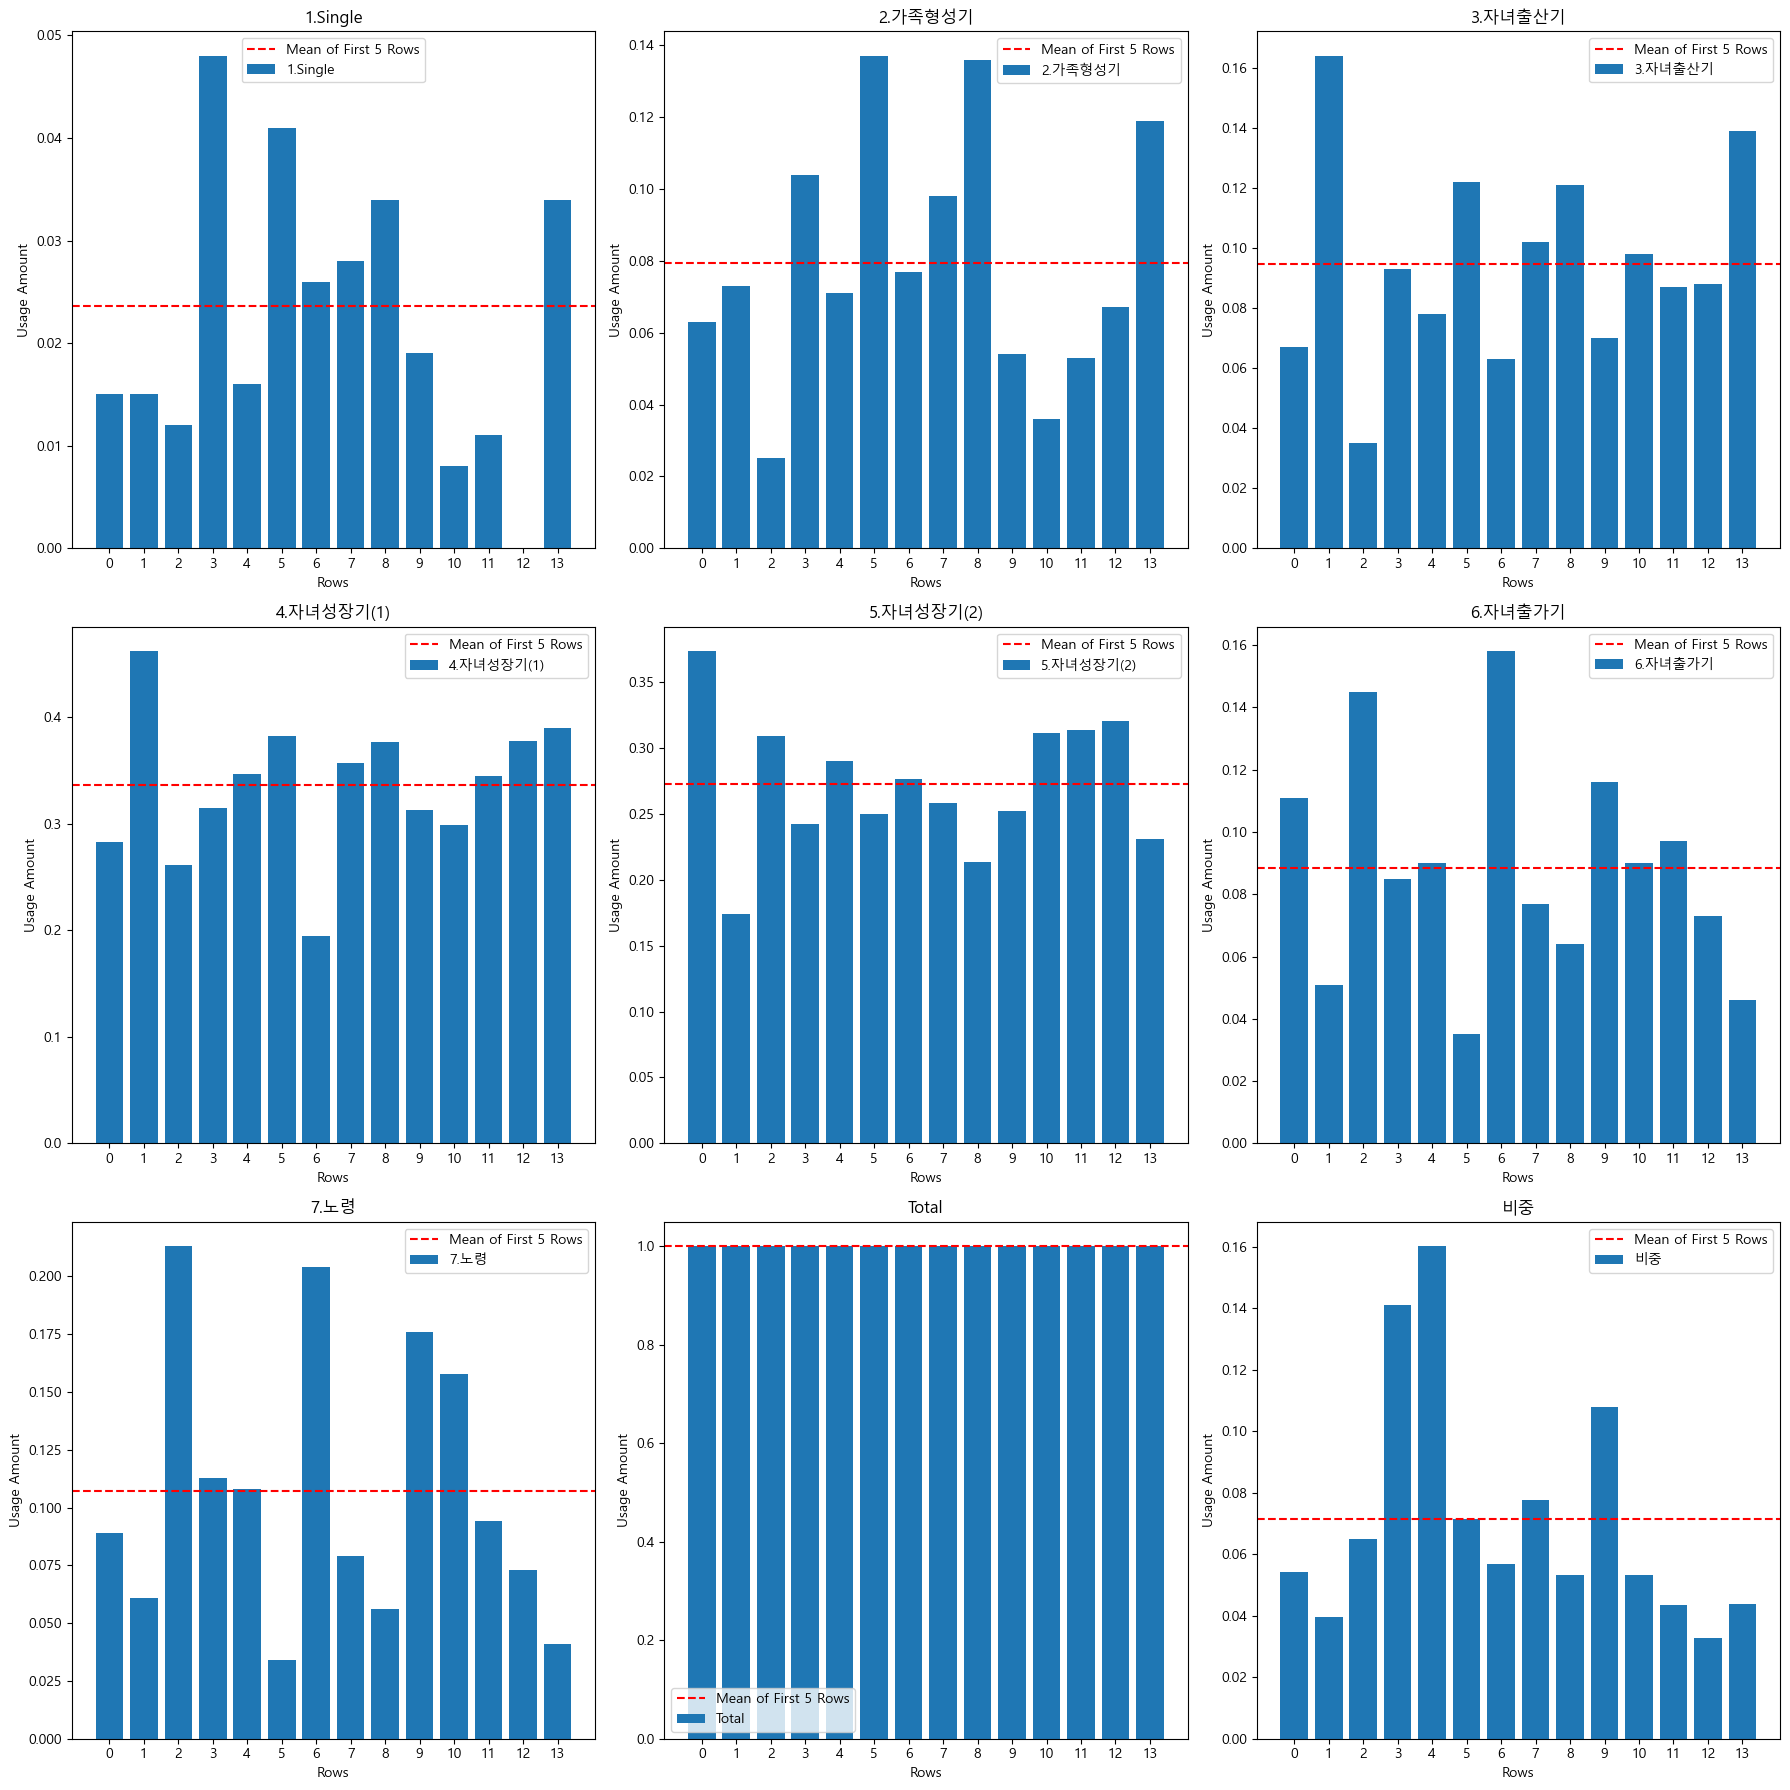

In [133]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = life_stage.iloc[:14, :].mean()

# Plotting for each column
num_columns = len(life_stage.columns)
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(num_columns):
    row = col_index // 3
    col = col_index % 3
    column_name = life_stage.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), life_stage.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
if num_columns % 3 != 0:
    fig.delaxes(axes[num_rows - 1, num_columns % 3])

plt.tight_layout()
plt.show()


IndexError: index 7 is out of bounds for axis 0 with size 7

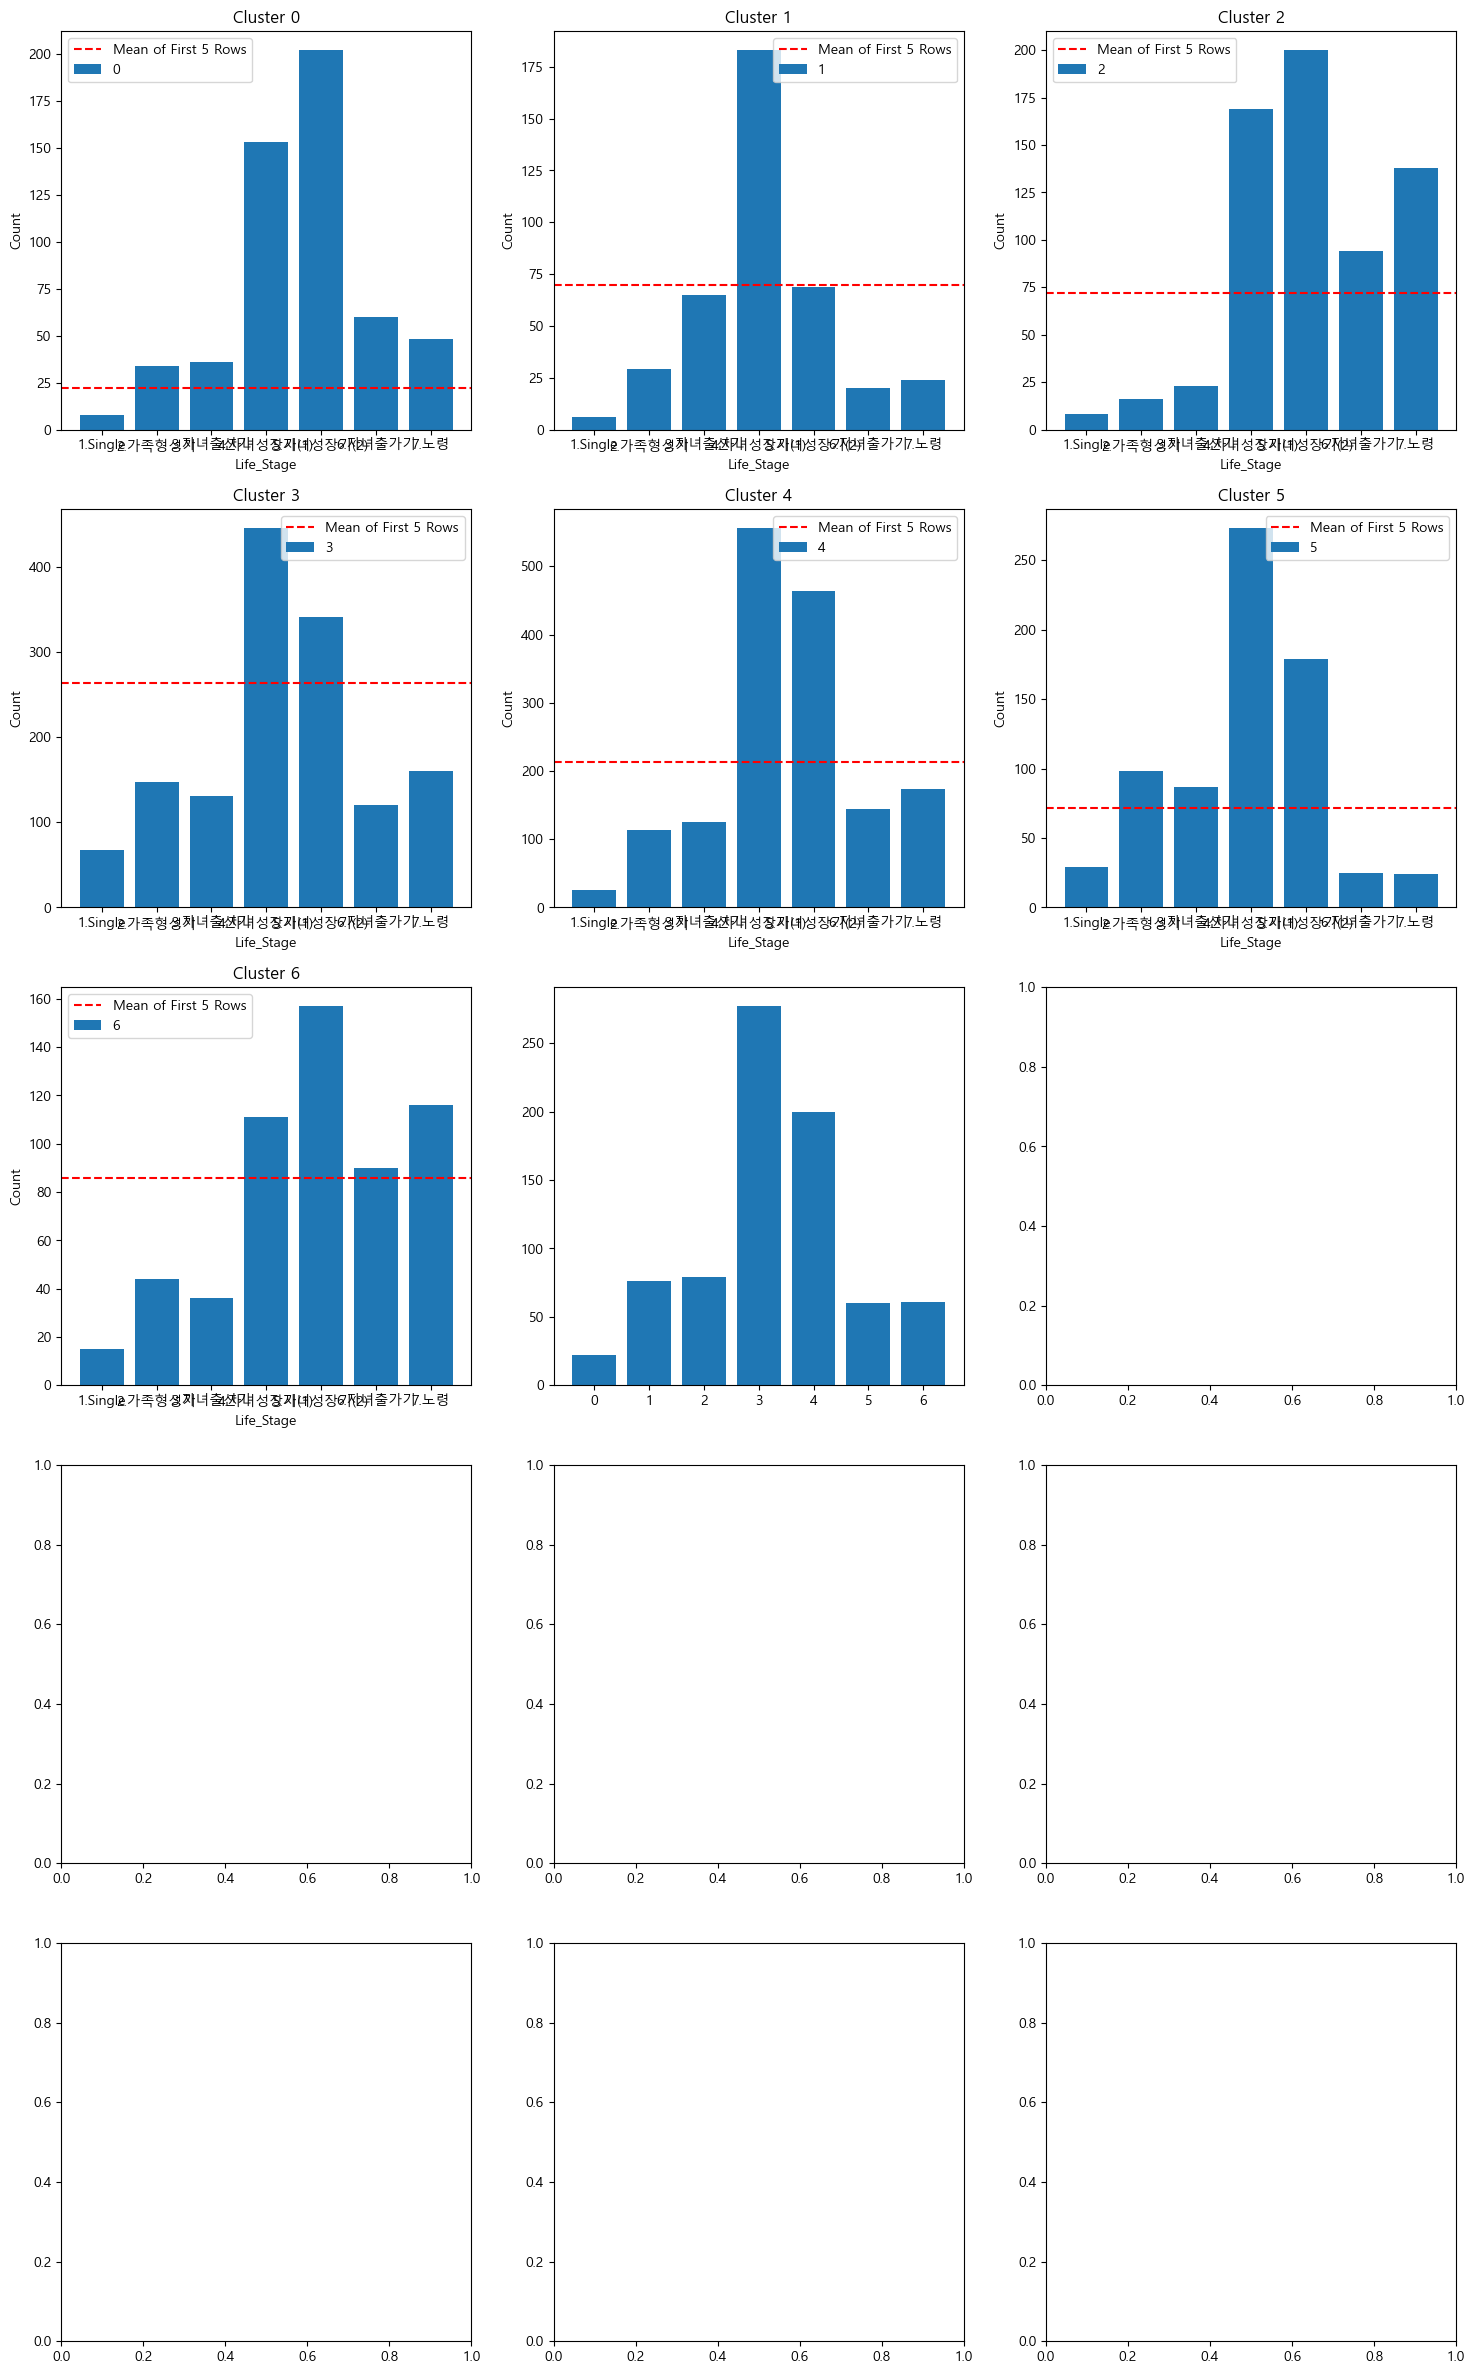

In [217]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = life_stage.iloc[:9, :].mean()

# Plotting for each column
num_clusters = len(life_stage)
num_rows = (num_clusters + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for cluster_index in range(num_clusters):
    row = cluster_index // 3
    col = cluster_index % 3
    
    ax = axes[row, col]
    cluster_name = life_stage.index[cluster_index]
    cluster_data = life_stage.loc[cluster_name]
    
    ax.bar(range(len(cluster_data)), cluster_data, label=cluster_name)
    ax.axhline(y=mean_of_first_5_rows[cluster_index], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Life_Stage')
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster {cluster_name}')
    ax.legend()
    ax.set_xticks(range(len(cluster_data)))
    ax.set_xticklabels(cluster_data.index)

# Remove any unused subplots
if num_clusters % 3 != 0:
    fig.delaxes(axes[num_rows - 1, num_clusters % 3])

plt.tight_layout()
plt.show()


In [264]:
occupation=a = df2.groupby(['cluster','자격구분상세']).size().unstack()
occupation

자격구분상세   00.SK제휴사  00.하나카드및관계사  01.공무원_군인  01.공무원_일반  01.공무원_정부투자공공기관  \
cluster                                                                 
0            12.0          NaN        5.0       22.0              8.0   
1             1.0          4.0        NaN       10.0              4.0   
2             2.0          3.0        2.0       15.0             15.0   
3             7.0          4.0        6.0       38.0             42.0   
4            13.0          5.0        8.0       69.0             31.0   
5             8.0          2.0        4.0       27.0              8.0   
6             3.0          NaN        1.0       12.0              8.0   
7             9.0          2.0        4.0       33.0             18.0   
8             4.0          1.0        5.0       16.0             10.0   
9             5.0          2.0        6.0       35.0             27.0   
10           12.0          2.0        2.0       17.0              8.0   
11            3.0          NaN        1.0       11.0              9.0   
12            2.0          NaN        2.0       13.0              2.0   
13            3.0          1.0        3.0       14.0              8.0   

자격구분상세   02.교육기관_대학교교원  02.교육기관_유치원어린이집  02.교육기관_초중고교사  02.교육기관_학교법인직원  \
cluster                                                                  
0                  4.0              2.0           14.0             2.0   
1                  4.0              2.0           15.0             2.0   
2                  1.0              3.0           10.0             NaN   
3                 11.0              7.0           23.0            12.0   
4                  6.0             14.0           34.0             6.0   
5                  1.0              7.0           13.0             1.0   
6                  2.0              2.0            9.0             4.0   
7                  5.0              7.0           26.0             7.0   
8                  5.0              2.0            4.0             1.0   
9                  2.0              6.0           20.0             6.0   
10                 2.0              3.0           11.0             1.0   
11                 NaN              6.0            6.0             3.0   
12                 1.0              5.0           14.0             5.0   
13                 NaN              8.0            9.0             3.0   

자격구분상세   02.교육기관_학술연구단체  ...  09.전문직  09.전문직_공인회계사기술사건축사세무사  09.전문직_변호사변리사  \
cluster                  ...                                                 
0                   1.0  ...     2.0                    2.0            1.0   
1                   NaN  ...     2.0                    2.0            NaN   
2                   NaN  ...     2.0                    1.0            NaN   
3                   1.0  ...     6.0                    2.0            2.0   
4                   1.0  ...     7.0                    3.0            2.0   
5                   1.0  ...     5.0                    NaN            1.0   
6                   NaN  ...     4.0                    3.0            NaN   
7                   3.0  ...     4.0                    2.0            NaN   
8                   NaN  ...     NaN                    NaN            NaN   
9                   NaN  ...     4.0                    2.0            NaN   
10                  NaN  ...     1.0                    NaN            NaN   
11                  NaN  ...     2.0                    NaN            NaN   
12                  NaN  ...     1.0                    NaN            NaN   
13                  NaN  ...     1.0                    1.0            NaN   

자격구분상세   09.전문직_손해사정인법무사노무사통역사행정사보험계리  10.부동산보유  11.배우자  12.자영업자  13.체크전환  \
cluster                                                                     
0                                 NaN      91.0     8.0      NaN      5.0   
1                                 1.0      50.0     9.0      NaN     13.0   
2                                 NaN     157.0    13.0      NaN     13.0   
3           

In [193]:
# 각 칼럼별로 1등부터 5등까지 찾아서 5위 안에 들면 1을 붙여주기
for column in occupation.columns:
    sorted_column = occupation[column].sort_values(ascending=False)
    top_5 = sorted_column.index[:5]
    occupation[column] = np.where(occupation.index.isin(top_5), 1, 0)

# 클러스터별로 1이 몇 번 있는지 카운트
count_by_cluster = occupation.groupby('cluster').sum()

# 결과 확인
count_by_cluster

자격구분상세   00.SK제휴사  00.하나카드및관계사  01.공무원_군인  01.공무원_일반  01.공무원_정부투자공공기관  \
cluster                                                                 
0               1            0          1          0                0   
1               0            1          0          0                0   
2               0            1          0          0                1   
3               0            1          1          1                1   
4               1            1          1          1                1   
5               1            1          0          1                0   
6               0            0          0          0                0   
7               1            0          0          1                1   
8               0            0          1          0                0   
9               0            0          1          1                1   
10              1            0          0          0                0   
11              0            0          0          0                0   
12              0            0          0          0                0   
13              0            0          0          0                0   

자격구분상세   02.교육기관_대학교교원  02.교육기관_유치원어린이집  02.교육기관_초중고교사  02.교육기관_학교법인직원  \
cluster                                                                  
0                    1                0              0               0   
1                    0                0              1               0   
2                    0                0              0               0   
3                    1                1              1               1   
4                    1                1              1               1   
5                    0                1              0               0   
6                    0                0              0               0   
7                    1                1              1               1   
8                    1                0              0               0   
9                    0                0              1               1   
10                   0                0              0               0   
11                   0                0              0               0   
12                   0                0              0               1   
13                   0                1              0               0   

자격구분상세   02.교육기관_학술연구단체  ...  09.전문직  09.전문직_공인회계사기술사건축사세무사  09.전문직_변호사변리사  \
cluster                  ...                                                 
0                     1  ...       0                      1              1   
1                     0  ...       0                      1              1   
2                     0  ...       0                      0              0   
3                     1  ...       1                      1              1   
4                     1  ...       1                      1              1   
5                     1  ...       1                      0              1   
6                     0  ...       1                      1              0   
7                     1  ...       1                      0              0   
8                     0  ...       0                      0              0   
9                     0  ...       0                      0              0   
10                    0  ...       0                      0              0   
11                    0  ...       0                      0              0   
12                    0  ...       0                      0              0   
13                    0  ...       0                      0              0   

자격구분상세   09.전문직_손해사정인법무사노무사통역사행정사보험계리  10.부동산보유  11.배우자  12.자영업자  13.체크전환  \
cluster                                                                     
0                                   1         0       0        1        0   
1                                   1         0       0        1        0   
2                                   0         1       0        0        0   
3           

In [218]:
# 각 칼럼별로 1등부터 5등까지 찾아서 5위 안에 들면 1을 붙여주기
for column in occupation.columns:
    sorted_column = occupation[column].sort_values(ascending=False)
    top_5 = sorted_column.index[:5]
    occupation[column] = np.where(occupation.index.isin(top_5), 1, 0)

# 열별 합계 계산 및 마지막 행 추가
occupation['sum'] = occupation.sum(axis=1)

# 클러스터별로 1이 몇 번 있는지 카운트
count_by_cluster = occupation.groupby('cluster').sum()
count_by_cluster.T

cluster                        0   1  2   3   4   5  6   7  8  9  10  11  12  \
자격구분상세                                                                         
00.SK제휴사                       1   0  0   0   1   1  0   1  0  0   0   0   0   
00.하나카드및관계사                    0   1  1   1   1   0  0   0  0  0   0   0   0   
01.공무원_군인                      1   0  0   1   1   0  0   0  1  0   0   0   0   
01.공무원_일반                      0   0  0   1   1   1  0   1  0  0   0   0   0   
01.공무원_정부투자공공기관                0   0  1   1   1   0  0   1  0  0   0   0   0   
02.교육기관_대학교교원                  1   0  0   1   1   0  0   1  0  0   0   0   0   
02.교육기관_유치원어린이집                0   0  0   1   1   1  0   1  0  0   0   0   0   
02.교육기관_초중고교사                  0   1  0   1   1   0  0   1  0  0   0   0   0   
02.교육기관_학교법인직원                 0   0  0   1   1   0  0   1  0  1   0   0   0   
02.교육기관_학술연구단체                 1   0  0   1   1   1  0   0  0  0   0   0   0   
02.교육기관_학원강사                   1   1  0   1   0   1  0   0  0  0   0   0   0   
03.금융기관                        1   0  0   1   1   0  0   1  0  0   0   0   0   
03.금융기관_금고저축은행신협상호금융           0   0  0   1   1   1  0   1  0  0   0   0   0   
03.금융기관_여신전문금융기관               0   0  0   1   1   1  0   1  0  0   0   0   0   
03.금융기관_은행증권보험은행연합회            0   0  0   1   1   0  0   1  0  1   0   0   0   
04.의료기관                        0   0  0   1   1   1  0   1  0  0   0   0   0   
04.의료기관_의료관련면허소시자              0   0  0   1   1   0  1   1  0  0   0   0   0   
04.의료기관_의사약사한의사                0   1  0   1   1   0  0   1  0  0   0   0   0   
05.언론기관                        1   0  0   1   1   1  0   0  0  0   0   0   0   
06.기업체                         0   1  1   1   1   0  0   0  0  0   0   0   0   
06.기업체_30대그룹계열사및상장법인           1   0  0   1   1   0  0   1  0  0   0   0   0   
06.기업체_개인사업체임의단체연소득2.4천이상      0   0  0   1   1   1  0   0  1  0   0   0   0   
06.기업체_납입자본금3억미만중소기업           0   0  0   1   1   1  0   0  1  0   0   0   0   
06.기업체_납입자본금3억이상중소기업           0   0  0   1   1   1  0   0  1  0   0   0   0   
06.기업체_코스닥등록기업                 0   0  0   1   1   1  0   0  0  1   0   0   0   
07.소기업                         0   0  0   1   1   0  1   1  0  0   0   0   0   
08.은행거래                        1   1  0   0   1   1  0   0  0  0   0   0   0   
08.은행거래_급여이체                   0   0  0   1   1   0  1   0  0  1   0   0   0   
08.은행거래_부동산담보대출                0   1  1   1   1   0  0   0  0  0   0   0   0   
08.은행거래_수신평잔                   0   0  1   1   1   0  1   0  0  0   0   0   0   
08.은행거래_수신평잔3천이상               1   0  0   1   1   1  0   0  0  0   0   0   0   
08.은행거래_신용대출                   0   0  0   1   1   1  0   1  0  0   0   0   0   
08.은행거래_하나대투거래                 1   1  0   0   0   1  1   0  0  0   0   0   0   
09.전문직                         0   0  0   1   1   1  1   0  0  0   0   0   0   
09.전문직_공인회계사기술사건축사세무사          1   1  0   1   1   0  0   0  0  0   0   0   0   
09.전문직_변호사변리사                  1   1  0   1   1   0  0   0  0  0   0   0   0   
09.전문직_손해사정인법무사노무사통역사행정사보험계리   1   1  0   1   1   0  0   0  0  0   0   0   0   
10.부동산보유                       0   0  1   1   1   1  0   0  0  0   0   0   0   
11.배우자                         0   0  0   1   1   1  0   0  0  1   0   0   0   
12.자영업자                        1   1  0   0   1   1  0   0  0  0   0   0   0   
13.체크전환                        0   0  0   1   1   1  0   1  0  0   0   0   0   
14.사업소득                        1   0  0   1   1   0  0   1  0  0   0   0   0   
99.기타                          1   0  1   1   1   0  0   0  0  0   0   0   0   
sum                           17  12  7  40  42  23  6  20  4  5   0   0   0   

cluster                       13  Sum  
자격구분상세                                 
00.SK제휴사                       0    1  
00.하나카드및관계사                    0    1  
01.공무원_군인                      0    1  
01.공무원_일반                      0    1  
01.공무원_정부투자공공기관                0    1  
02.교육기관_대학교교원                  0    1  

In [255]:
sorted_rank = occupation['99.기타'].argsort().argsort() 
sorted_rank.sort_values()

cluster
12     0
13     1
10     2
6      3
8      4
1      5
7      6
11     7
5      8
2      9
0     10
9     11
3     12
4     13
Name: 99.기타, dtype: int64

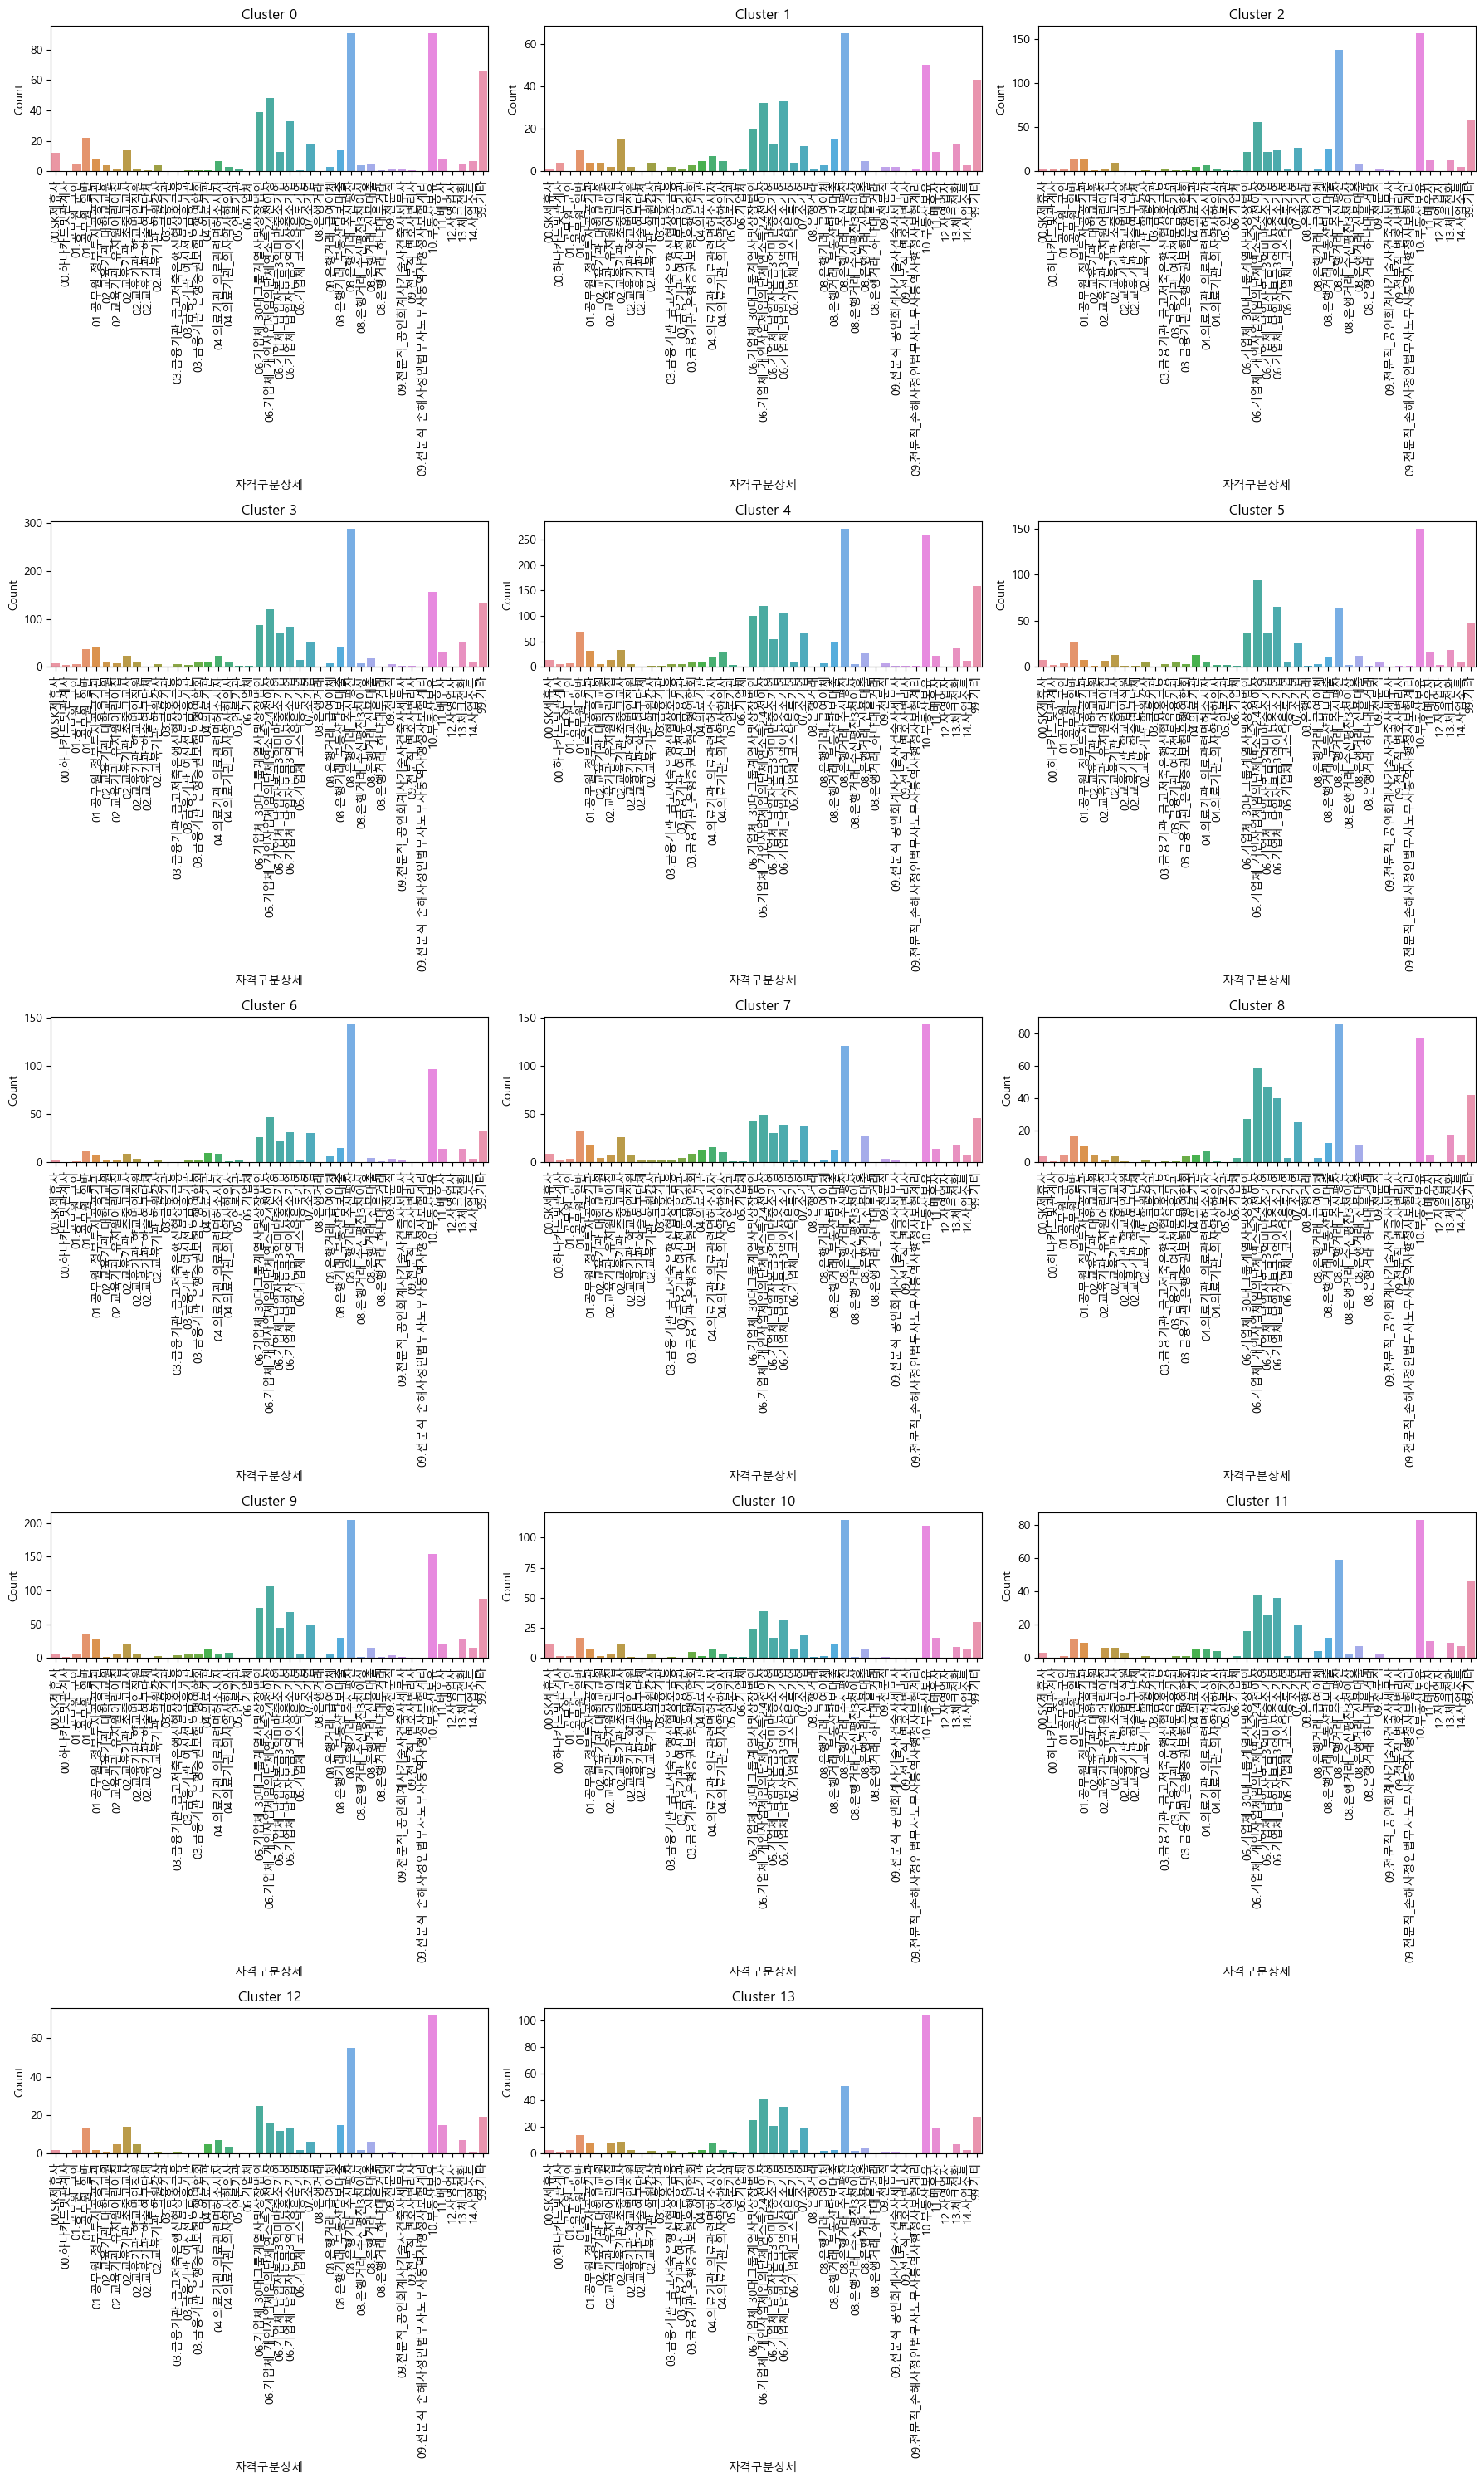

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클러스터별로 직업분포 그래프 그리기
num_clusters = len(occupation)
num_rows = (num_clusters + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for cluster_index in range(num_clusters):
    row = cluster_index // 3
    col = cluster_index % 3
    
    # 해당 클러스터의 데이터 가져오기
    cluster_data = occupation.iloc[cluster_index]
    
    # 그래프 그리기
    ax = axes[row, col]
    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax)
    ax.set_xlabel('자격구분상세')
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster {cluster_index}')
    ax.set_xticklabels(cluster_data.index, rotation=90)
    
# Remove any unused subplots
if num_clusters % 3 != 0:
    for i in range(num_clusters % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()


In [281]:
#비중
occupation1 = df2.groupby(['cluster', '자격구분상세']).size().unstack()
occupation1['total'] = occupation1.sum(axis=1)

# 비중 계산
occupation1_percentage = occupation1[occupation1.columns].div(occupation1['total'], axis=0)
occupation1_percentage 

자격구분상세   00.SK제휴사  00.하나카드및관계사  01.공무원_군인  01.공무원_일반  01.공무원_정부투자공공기관  \
cluster                                                                 
0        0.022181          NaN   0.009242   0.040665         0.014787   
1        0.002525     0.010101        NaN   0.025253         0.010101   
2        0.003086     0.004630   0.003086   0.023148         0.023148   
3        0.004958     0.002833   0.004249   0.026912         0.029745   
4        0.008120     0.003123   0.004997   0.043098         0.019363   
5        0.011189     0.002797   0.005594   0.037762         0.011189   
6        0.005272          NaN   0.001757   0.021090         0.014060   
7        0.011613     0.002581   0.005161   0.042581         0.023226   
8        0.007533     0.001883   0.009416   0.030132         0.018832   
9        0.004630     0.001852   0.005556   0.032407         0.025000   
10       0.022599     0.003766   0.003766   0.032015         0.015066   
11       0.006897          NaN   0.002299   0.025287         0.020690   
12       0.006098          NaN   0.006098   0.039634         0.006098   
13       0.006849     0.002283   0.006849   0.031963         0.018265   

자격구분상세   02.교육기관_대학교교원  02.교육기관_유치원어린이집  02.교육기관_초중고교사  02.교육기관_학교법인직원  \
cluster                                                                  
0             0.007394         0.003697       0.025878        0.003697   
1             0.010101         0.005051       0.037879        0.005051   
2             0.001543         0.004630       0.015432             NaN   
3             0.007790         0.004958       0.016289        0.008499   
4             0.003748         0.008745       0.021237        0.003748   
5             0.001399         0.009790       0.018182        0.001399   
6             0.003515         0.003515       0.015817        0.007030   
7             0.006452         0.009032       0.033548        0.009032   
8             0.009416         0.003766       0.007533        0.001883   
9             0.001852         0.005556       0.018519        0.005556   
10            0.003766         0.005650       0.020716        0.001883   
11                 NaN         0.013793       0.013793        0.006897   
12            0.003049         0.015244       0.042683        0.015244   
13                 NaN         0.018265       0.020548        0.006849   

자격구분상세   02.교육기관_학술연구단체  ...  09.전문직_공인회계사기술사건축사세무사  09.전문직_변호사변리사  \
cluster                  ...                                         
0              0.001848  ...               0.003697       0.001848   
1                   NaN  ...               0.005051            NaN   
2                   NaN  ...               0.001543            NaN   
3              0.000708  ...               0.001416       0.001416   
4              0.000625  ...               0.001874       0.001249   
5              0.001399  ...                    NaN       0.001399   
6                   NaN  ...               0.005272            NaN   
7              0.003871  ...               0.002581            NaN   
8                   NaN  ...                    NaN            NaN   
9                   NaN  ...               0.001852            NaN   
10                  NaN  ...                    NaN            NaN   
11                  NaN  ...                    NaN            NaN   
12                  NaN  ...                    NaN            NaN   
13                  NaN  ...               0.002283            NaN   

자격구분상세   09.전문직_손해사정인법무사노무사통역사행정사보험계리  10.부동산보유    11.배우자   12.자영업자   13.체크전환  \
cluster                                                                         
0                                 NaN  0.168207  0.014787       NaN  0.009242   
1                            0.002525  0.126263  0.022727       NaN  0.032828   
2                                 NaN  0.242284  0.020062       NaN  0.020062   
3                            0.000708  0.110482  0.022663       NaN  0.037535   
4                            0.001249  

In [283]:
occupation1=occupation1.drop(['total'],axis=1)

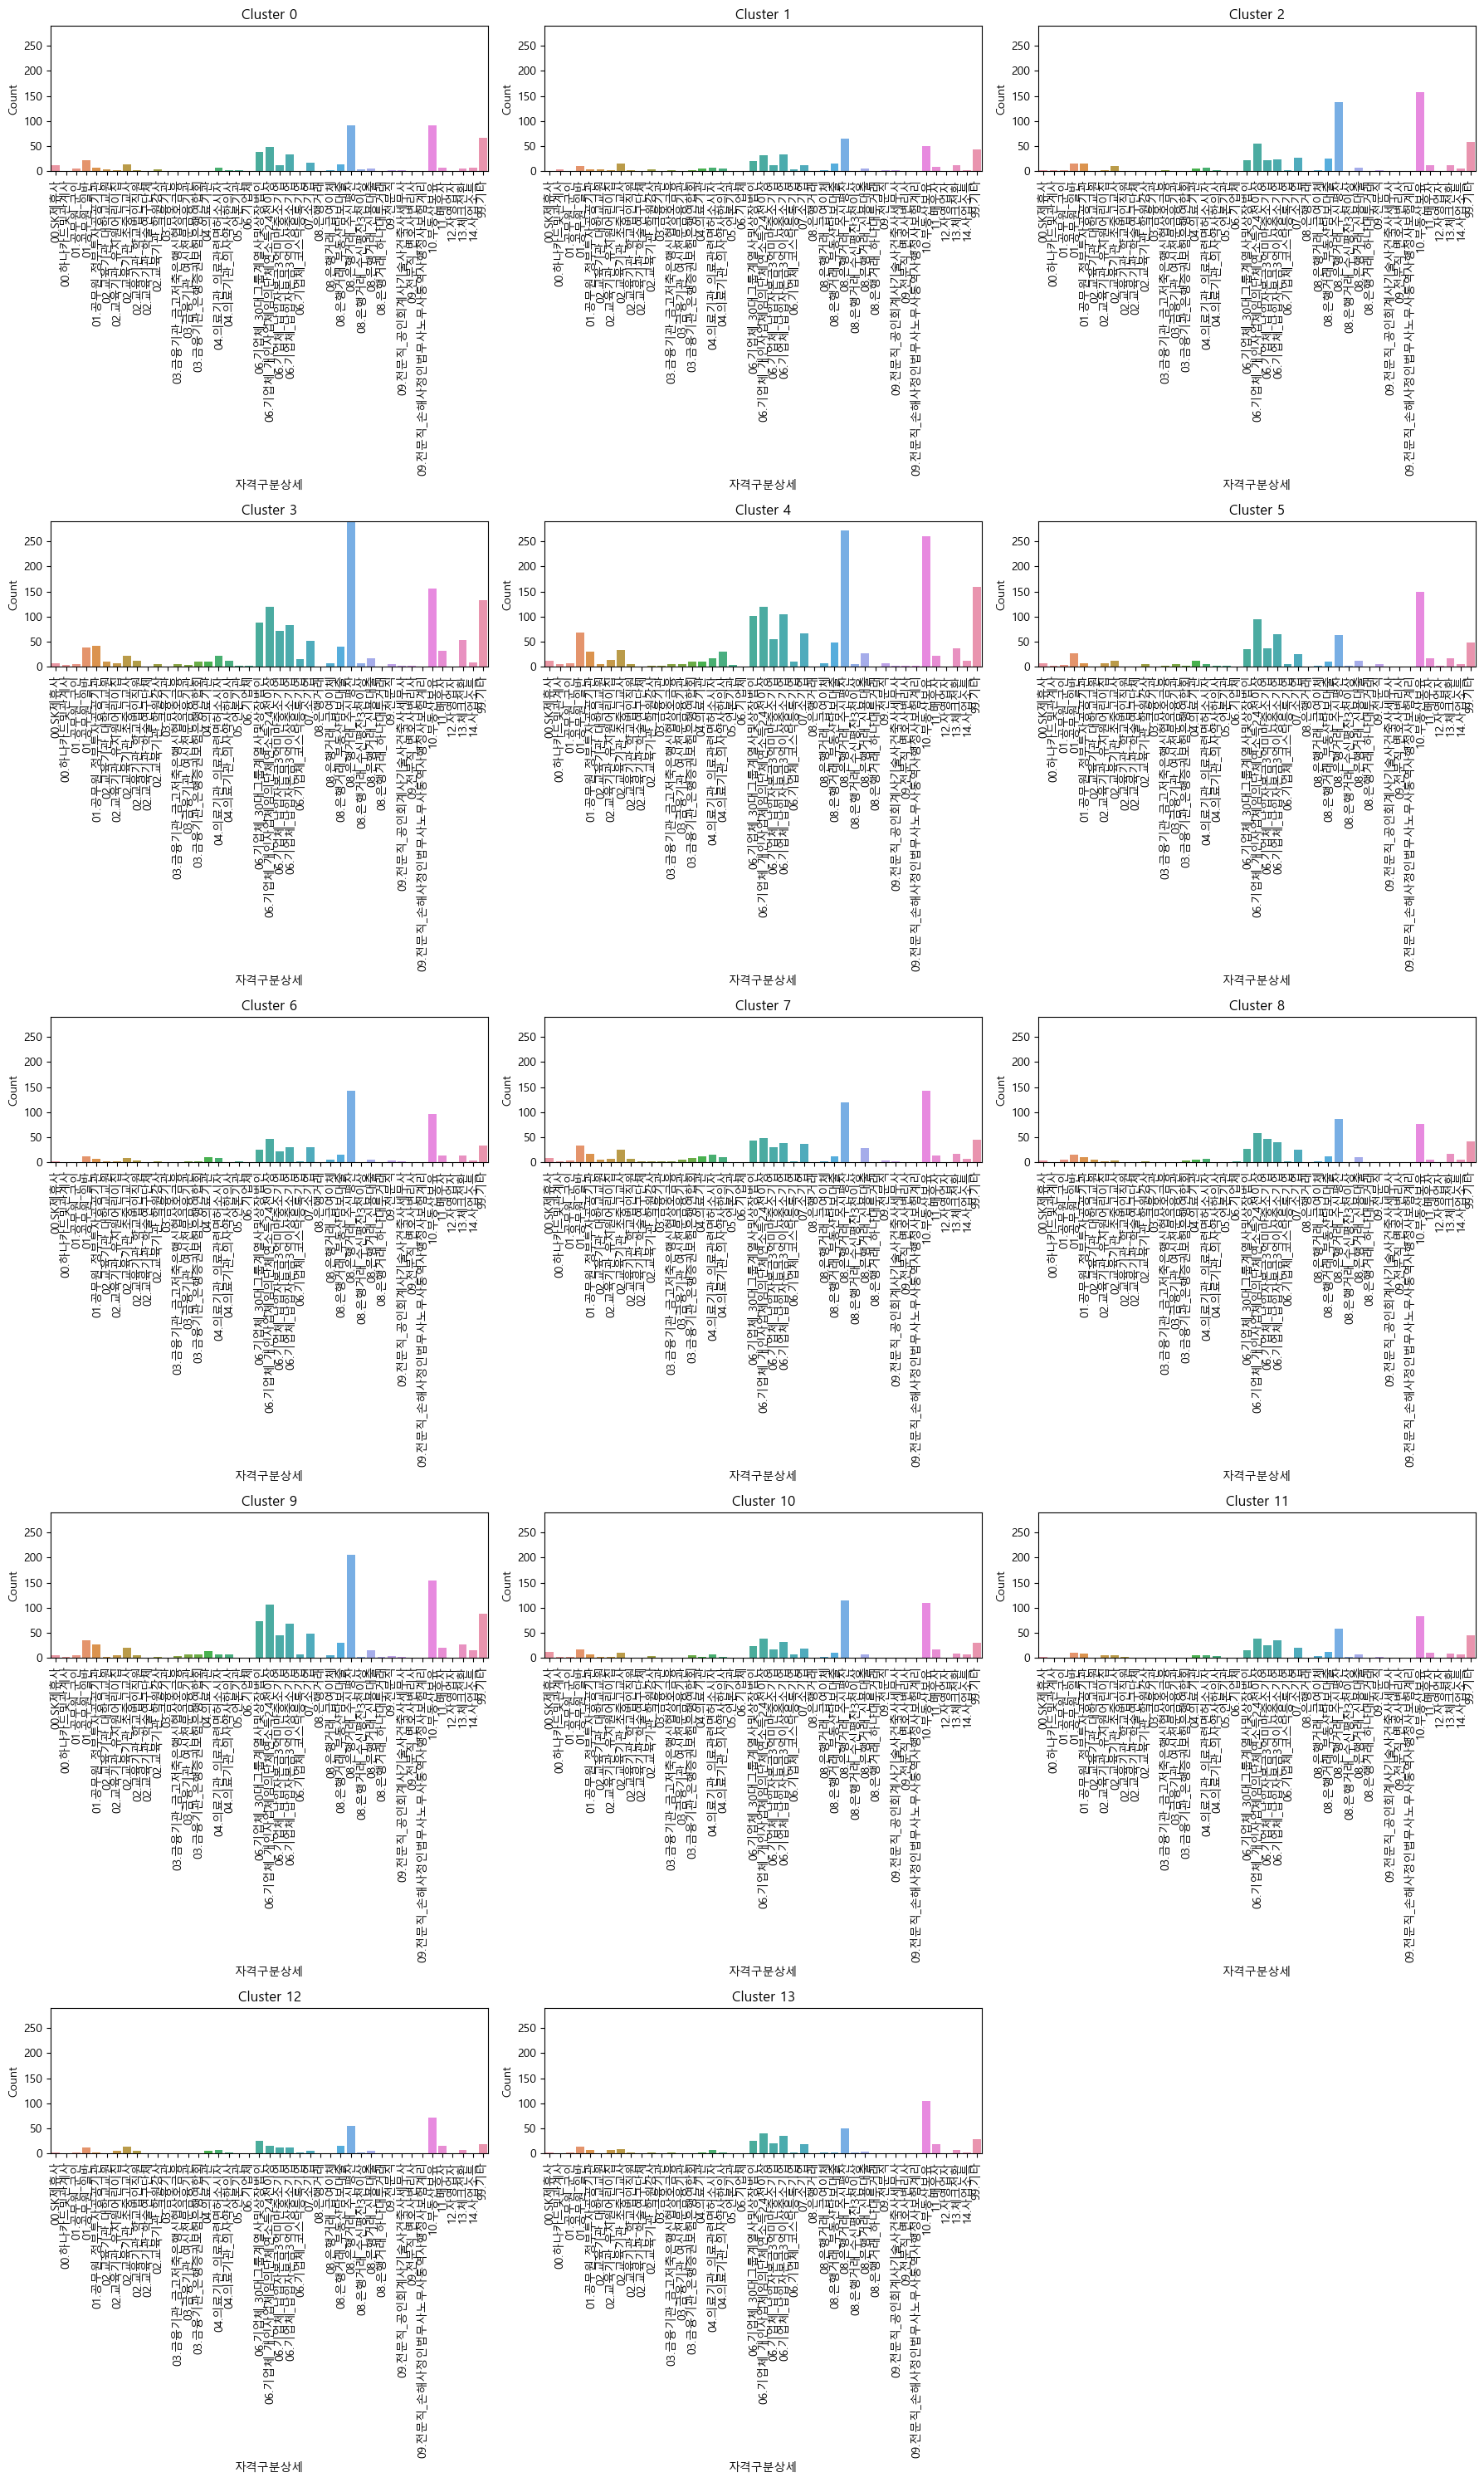

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클러스터별로 직업분포 그래프 그리기
num_clusters = len(occupation1)
num_rows = (num_clusters + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# 모든 그래프의 y 눈금 범위 설정을 위한 최대값 찾기
max_y_value = occupation1.iloc[:, :-1].max().max()

for cluster_index in range(num_clusters):
    row = cluster_index // 3
    col = cluster_index % 3
    
    # 해당 클러스터의 데이터 가져오기
    cluster_data = occupation1.iloc[cluster_index]
    
    # 그래프 그리기
    ax = axes[row, col]
    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax)
    ax.set_xlabel('자격구분상세')
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster {cluster_index}')
    ax.set_xticklabels(cluster_data.index, rotation=90)
    
    # 모든 그래프의 y 눈금 범위 설정
    ax.set_ylim(0, max_y_value)
    
# Remove any unused subplots
if num_clusters % 3 != 0:
    for i in range(num_clusters % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()


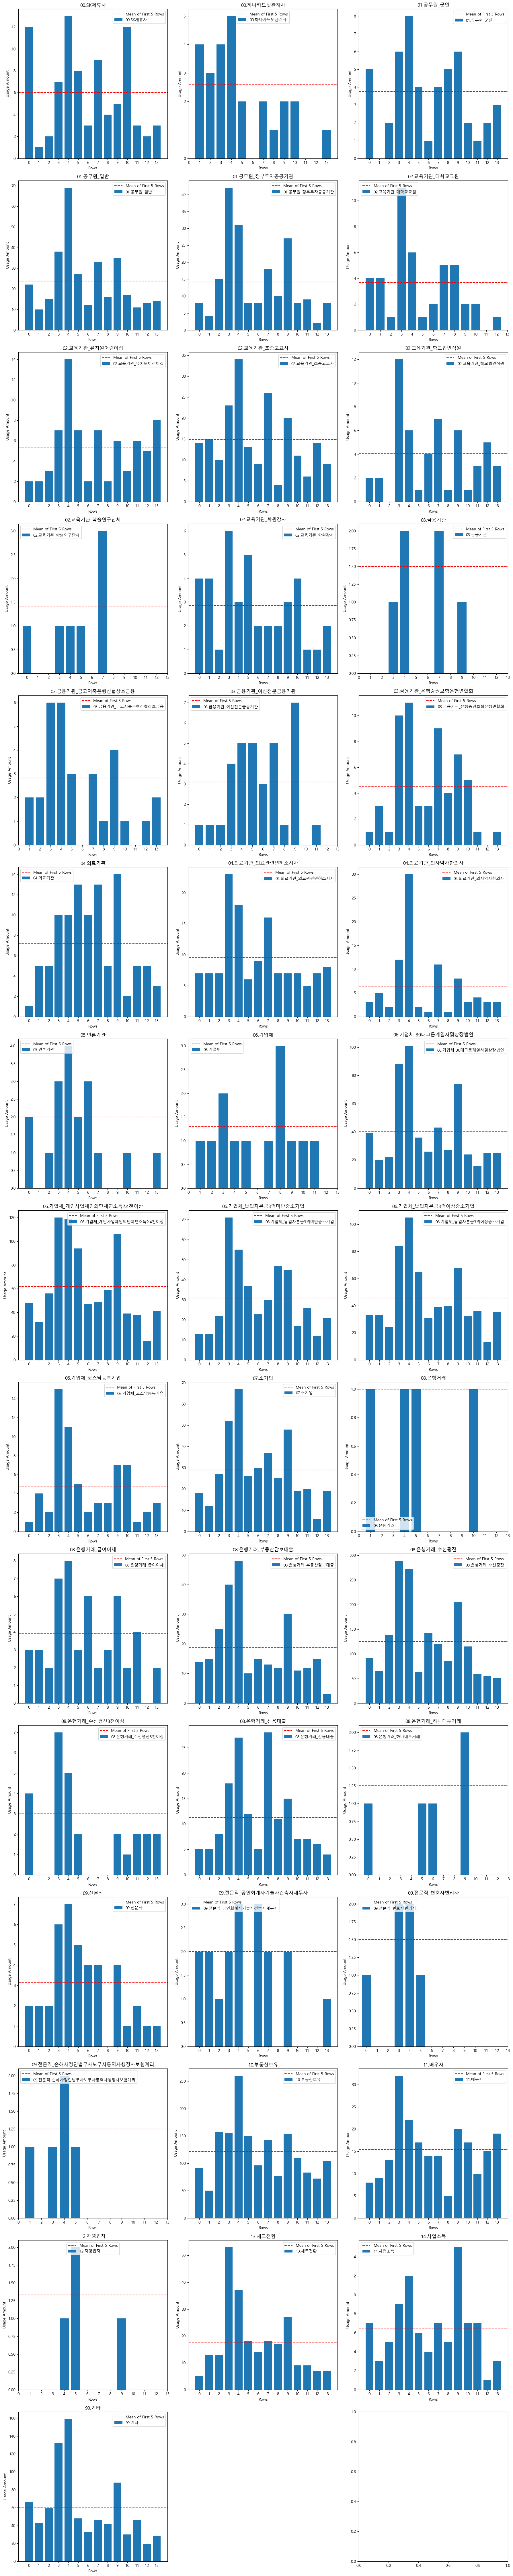

In [249]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = occupation.iloc[:14, :].mean()

# Plotting for each column
num_columns = len(occupation.columns)
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(num_columns):
    row = col_index // 3
    col = col_index % 3
    column_name = occupation.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), occupation.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
if num_columns % 3 != 0:
    fig.delaxes(axes[num_rows - 1, num_columns % 3])

plt.tight_layout()
plt.show()

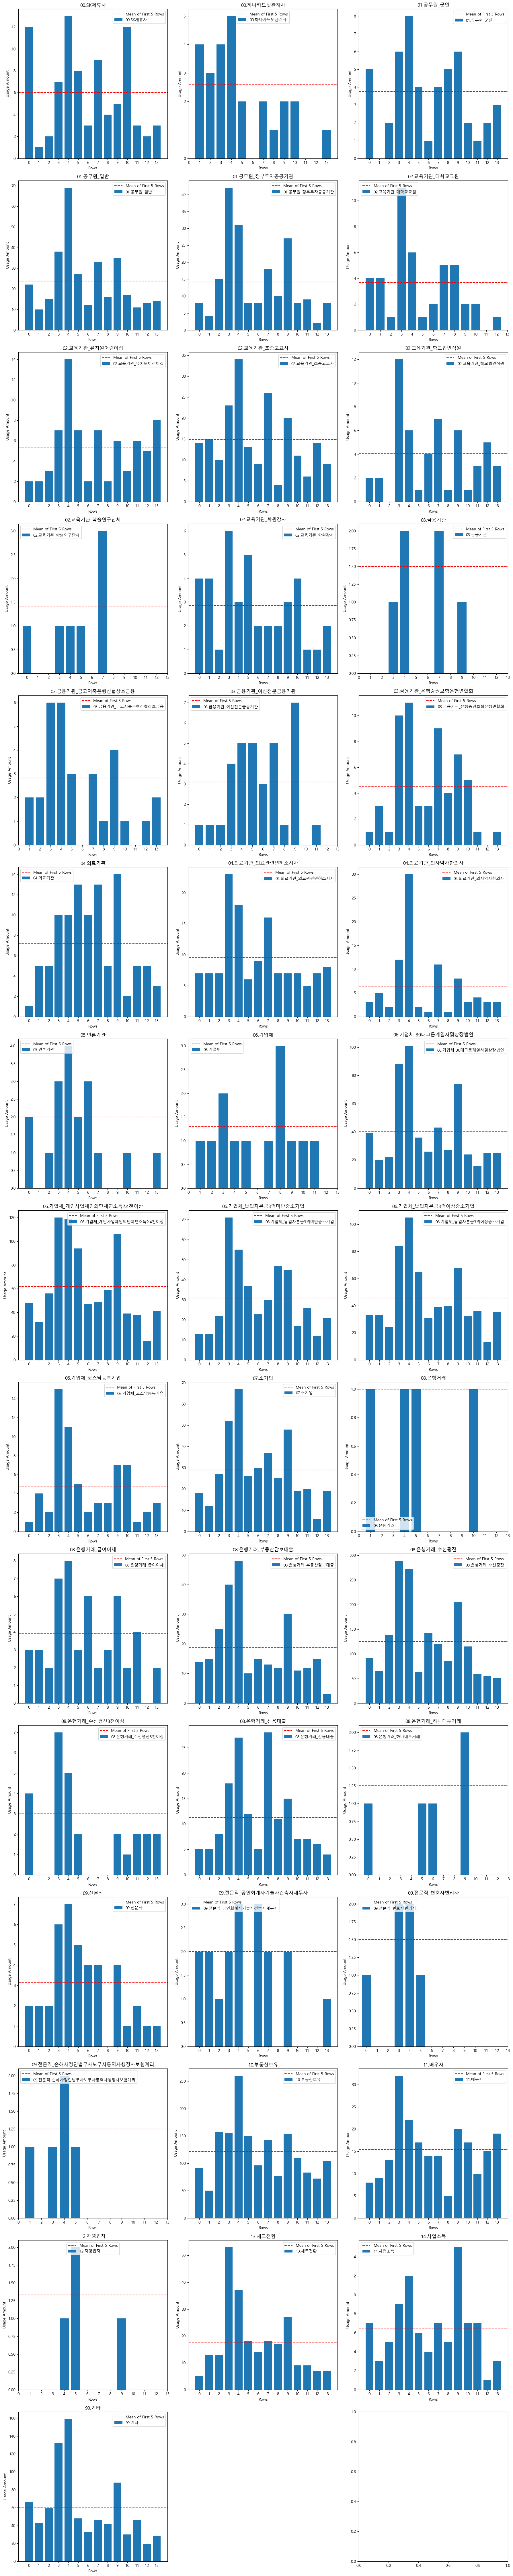

In [186]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = occupation.iloc[:14, :].mean()

# Plotting for each column
num_columns = len(occupation.columns)
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(num_columns):
    row = col_index // 3
    col = col_index % 3
    column_name = occupation.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), occupation.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
if num_columns % 3 != 0:
    fig.delaxes(axes[num_rows - 1, num_columns % 3])

plt.tight_layout()
plt.show()


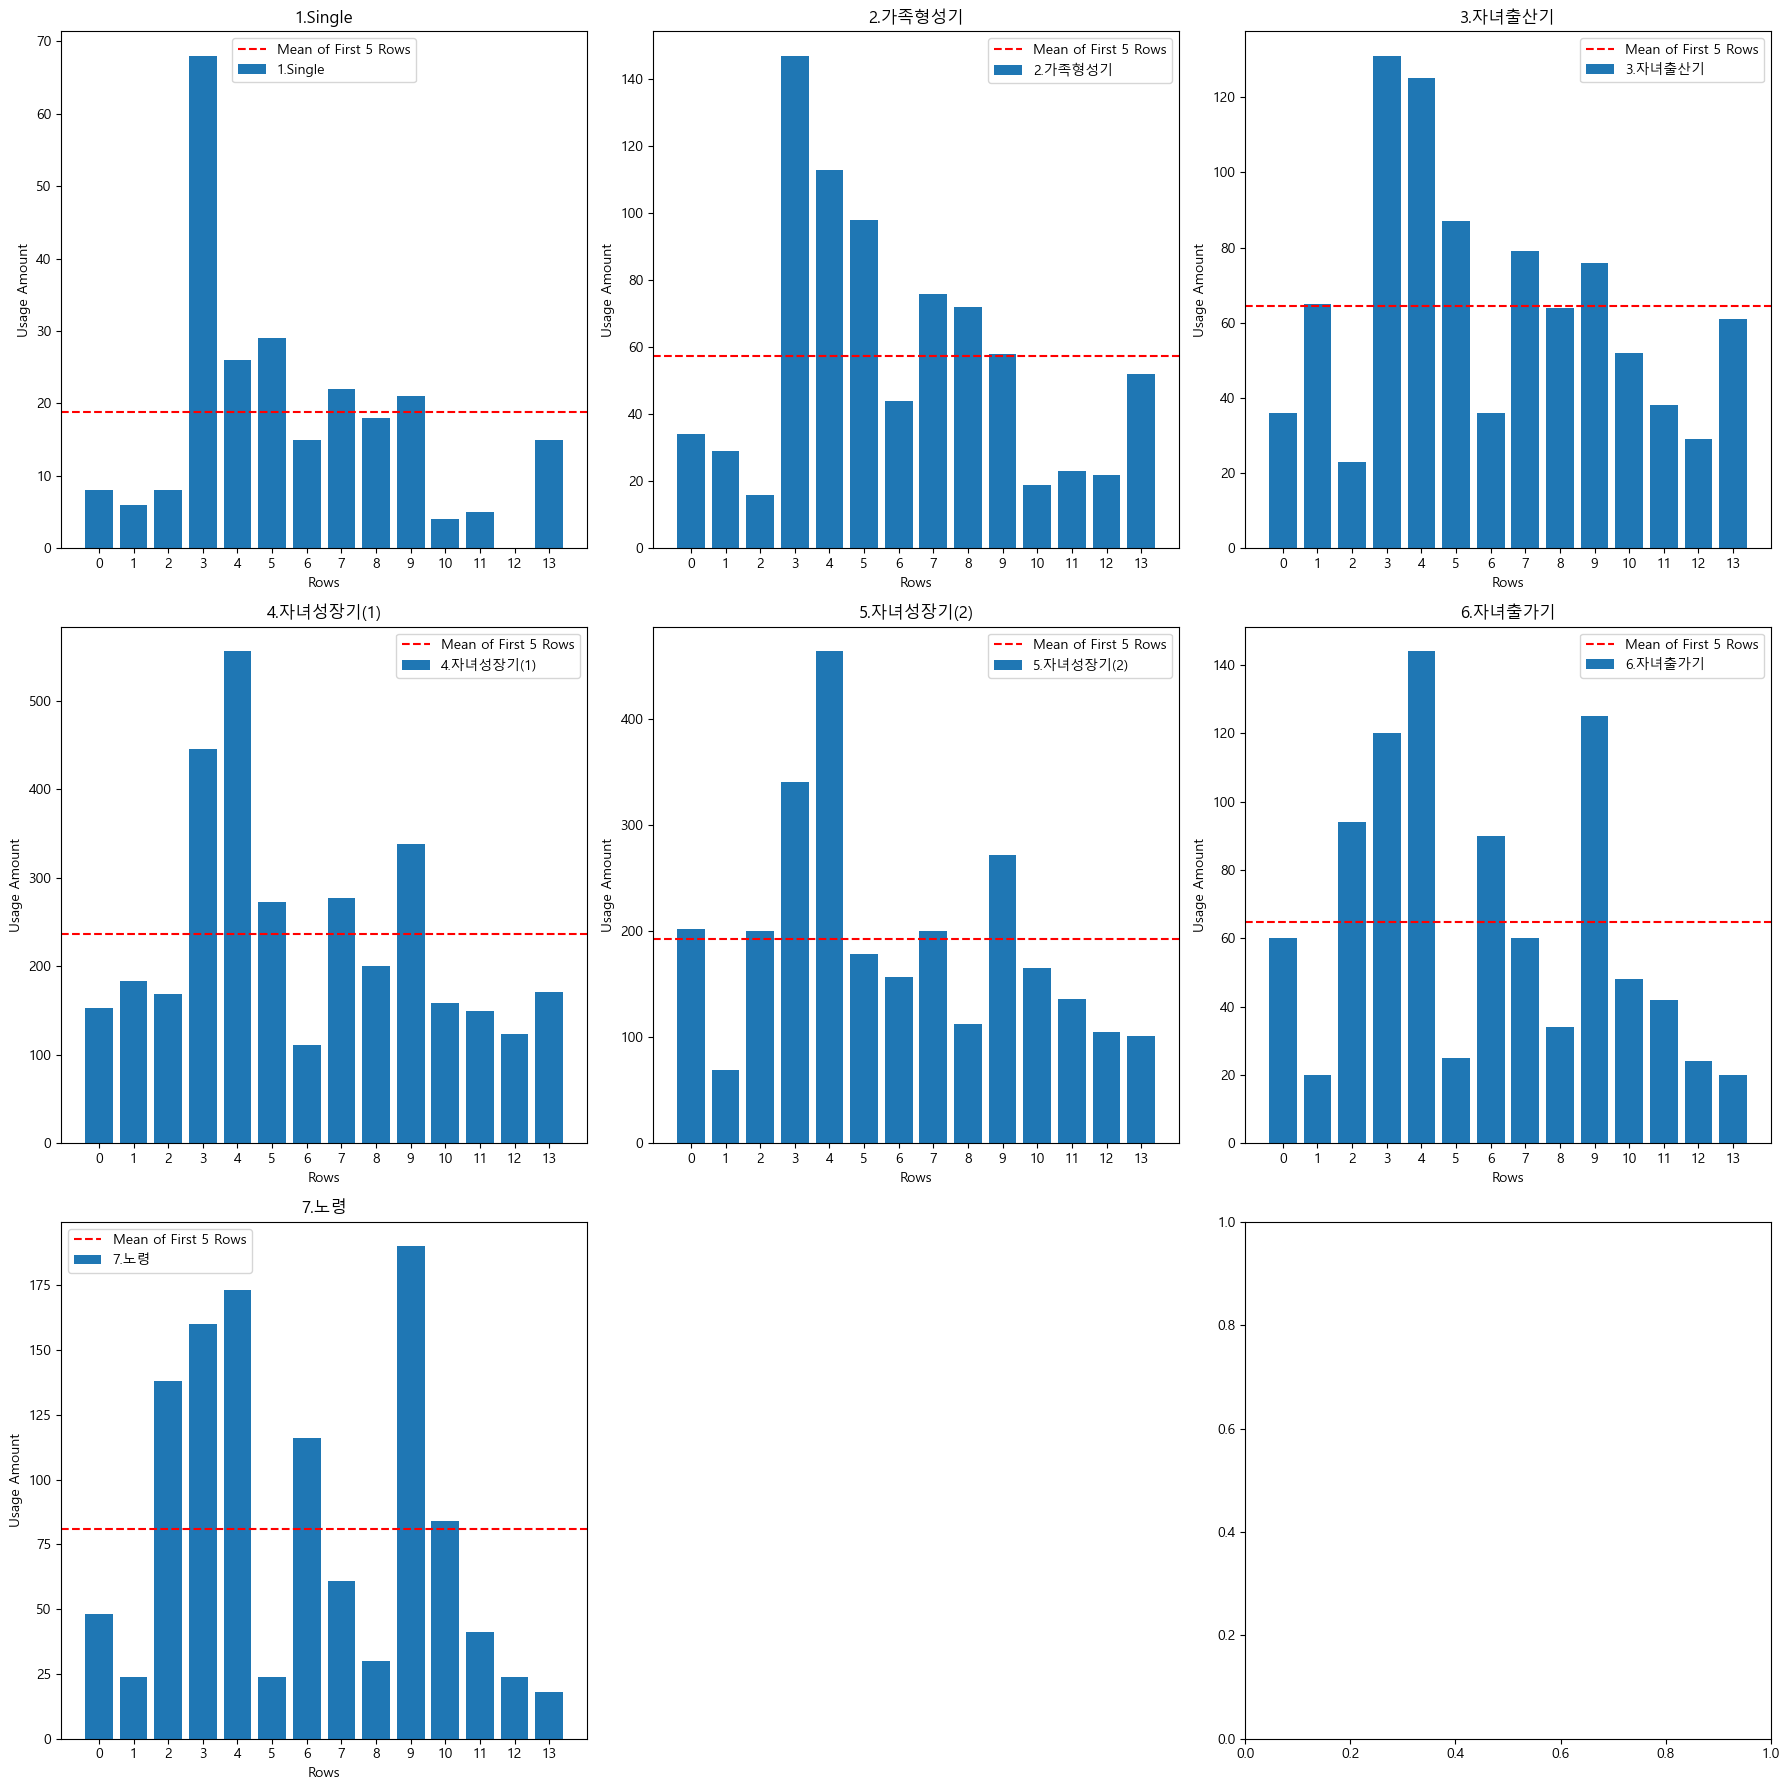

In [110]:
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = life_stage.iloc[:14, :].mean()

# Plotting for each column
num_columns = len(life_stage.columns)
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(num_columns):
    row = col_index // 3
    col = col_index % 3
    column_name = life_stage.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), life_stage.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
if num_columns % 3 != 0:
    fig.delaxes(axes[num_rows - 1, num_columns % 3])

plt.tight_layout()
plt.show()

In [93]:
mean1=df2.groupby('cluster').mean()
mean1

C:\Users\User\AppData\Local\Temp\ipykernel_11228\3137296388.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean1=df2.groupby('cluster').mean()


Unnamed: 0.1     Unnamed: 0    남녀구분코드         연령   소지여부_신용  \
cluster                                                                
0        149831.190388  149831.190388  1.486137  46.223660  1.000000   
1        143063.477273  143063.477273  1.459596  45.626263  1.000000   
2        152518.632716  152518.632716  1.455247  45.598765  1.000000   
3        150628.730170  150628.730170  1.469547  46.378895  0.967422   
4        147998.184884  147998.184884  1.492192  46.377889  1.000000   
5        150693.034965  150693.034965  1.483916  45.627972  0.998601   
6        147554.706503  147554.706503  1.532513  46.998243  0.998243   
7        151557.686452  151557.686452  1.477419  46.023226  0.998710   
8        147135.709981  147135.709981  1.450094  46.357815  0.998117   
9        151397.968519  151397.968519  1.461111  46.335185  0.996296   
10       150597.472693  150597.472693  1.465160  46.557439  1.000000   
11       146156.142529  146156.142529  1.445977  46.404598  1.000000   
12       142940.765244  142940.765244  1.454268  46.128049  0.996951   
13       144208.646119  144208.646119  1.449772  45.945205  0.997717   

              입회일자_신용  입회경과개월수_신용      탈회여부   회원여부_연체  수신거부여부_TM  ...  \
cluster                                                           ...   
0        2.010960e+07   91.892791  0.423290  0.003697   0.375231  ...   
1        2.011587e+07   84.419192  0.414141  0.015152   0.414141  ...   
2        2.012070e+07   78.555556  0.391975  0.004630   0.283951  ...   
3        2.011792e+07   81.910765  0.404391  0.057365   0.400142  ...   
4        2.011402e+07   86.567770  0.443473  0.009994   0.369144  ...   
5        2.013711e+07   58.667133  0.458741  0.011189   0.338462  ...   
6        2.011252e+07   88.504394  0.376098  0.007030   0.302285  ...   
7        2.012660e+07   71.673548  0.459355  0.009032   0.365161  ...   
8        2.012516e+07   73.171375  0.361582  0.016949   0.320151  ...   
9        2.010735e+07   94.640741  0.407407  0.023148   0.379630  ...   
10       2.011562e+07   84.726930  0.455744  0.009416   0.370998  ...   
11       2.012362e+07   75.059770  0.482759  0.011494   0.388506  ...   
12       2.013810e+07   57.902439  0.533537  0.006098   0.332317  ...   
13       2.013586e+07   60.347032  0.468037  0.013699   0.440639  ...   

          Frequency      Monetary  Recency_s  Frequency_s  Monetary_s  \
cluster                                                                 
0        145.129390  9.312053e+06   0.001078     0.025465    0.002255   
1        139.063131  1.277118e+07   0.002736     0.024541    0.002751   
2        168.492284  8.237491e+06   0.001157     0.029025    0.002101   
3        166.957507  6.727999e+06   0.101098     0.028791    0.001884   
4        146.319800  1.358340e+07   0.001666     0.025647    0.002868   
5        147.327273  9.145987e+06   0.000117     0.025800    0.002231   
6        237.713533  3.854474e+06   0.003515     0.039572    0.001472   
7        184.929032  8.371444e+06   0.001075     0.031530    0.002120   
8        193.685499  7.772086e+06   0.001412     0.032864    0.002034   
9        154.698148  7.717963e+06   0.005787     0.026923    0.002026   
10       164.427495  8.963448e+06   0.000471     0.028406    0.002205   
11       138.694253  9.878408e+06   0.000575     0.024485    0.002336   
12       143.262195  8.944429e+06   0.000254     0.025181    0.002202   
13       147.150685  7.516422e+06   0.002093     0.025773    0.001997   

         labels_k  Recency_8  Frequency_8  Monetary_8  RFM_Score  
cluster                                                           
0        1.000000   7.987061     4.526802    5.051756  61.347878  
1        1.000000   7.967172     4.401515    5.517677  62.129931  
2        1.000000   7.986111     4.791667    4.819444  62.543087  
3        0.935552   7.060907     4.775496    4.152266  59.124567  
4        1.000000   7.980012     4.497814    5.387883  62.401354  
5        1.000000   7.998601     4.549650    5.078

In [96]:
onoff=mean1[['이용건수_온라인_B0M', '이용건수_오프라인_B0M', '이용건수_페이_온라인_B0M', '이용건수_페이_오프라인_B0M']]
onoff

이용건수_온라인_B0M  이용건수_오프라인_B0M  이용건수_페이_온라인_B0M  이용건수_페이_오프라인_B0M
cluster                                                                
0            0.602588      11.005545         0.195933          0.044362
1            6.368687       5.308081         1.250000          0.080808
2            0.987654      14.608025         0.220679          0.050926
3            0.692635       2.264164         0.169972          0.015581
4            1.199250      11.484072         0.357277          0.079950
5            1.405594      10.641958         0.363636          0.079720
6            0.694200       9.008787         0.219684          0.014060
7            1.565161      18.793548         0.543226          0.131613
8            1.112994      19.580038         0.363465          0.116761
9            1.061111       8.026852         0.285185          0.050926
10           1.465160      13.233522         0.382298          0.086629
11           1.356322       9.494253         0.331034          0.068966
12           1.457317      10.536585         0.493902          0.100610
13           1.700913       6.091324         0.488584          0.063927

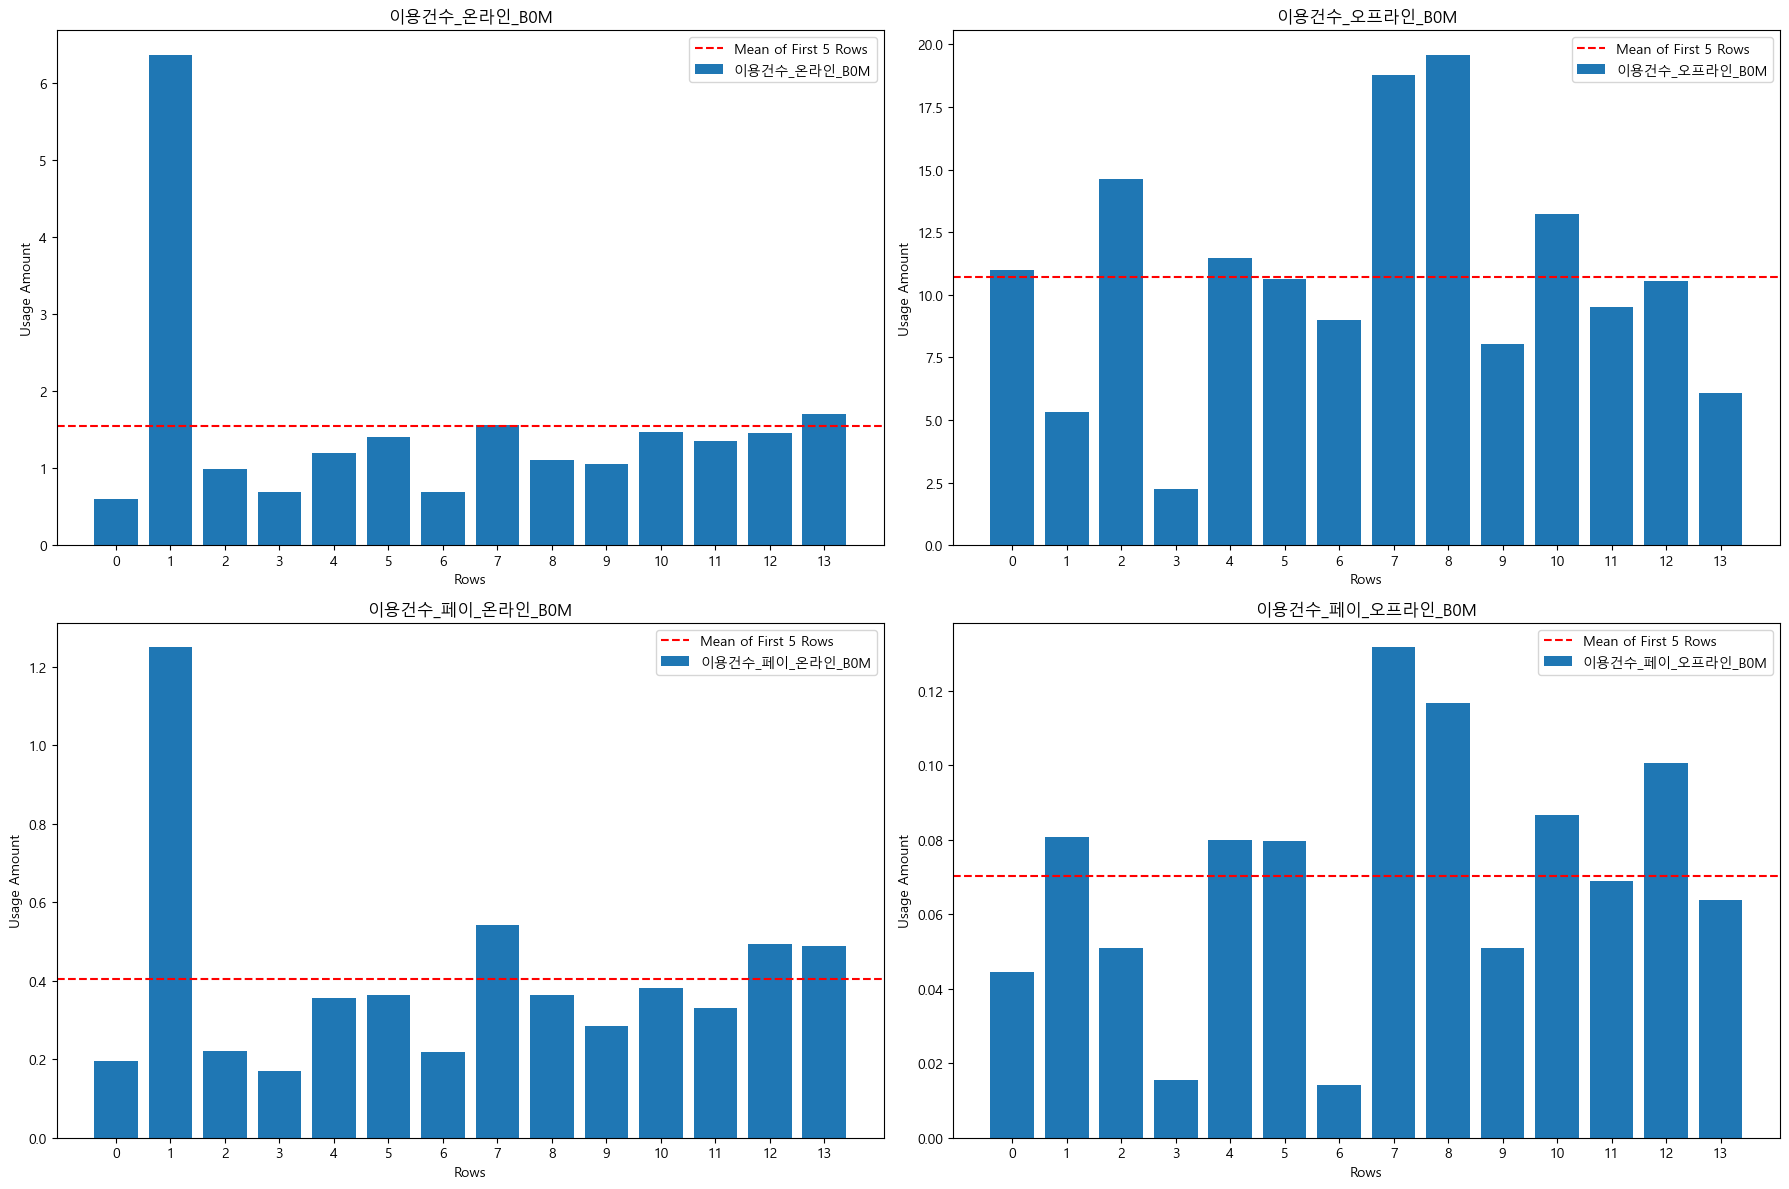

In [104]:
onoff = mean1[['이용건수_온라인_B0M', '이용건수_오프라인_B0M', '이용건수_페이_온라인_B0M', '이용건수_페이_오프라인_B0M']]

# Calculate the mean of the first 5 rows
mean_of_first_5_rows = onoff.iloc[:14, :].mean()  # 칼럼 범위 수정

# Plotting for each column
num_columns = len(onoff.columns)
num_rows = (num_columns + 1) // 2  # Ceiling division
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for col_index in range(num_columns):
    row = col_index // 2
    col = col_index % 2
    column_name = onoff.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), onoff.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
if num_columns % 2 != 0:
    fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

# 군집 14개 소비패턴+연령

In [16]:
df1=df[df['prediction']=='연속']
df2 = df1.sample(n=10000, random_state=42)
df3=df2[[ '연령', '쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외' ]]
df3 = df3.astype(np.int32)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

matrix1 = df3.values

# 데이터 스케일링
scaler1 = StandardScaler()
scaled_matrix1 = scaler1.fit_transform(matrix1)

# 코사인 유사도 계산
cosine_sim1 = cosine_similarity(scaled_matrix1)

# 데이터 프레임 형태로 저장
cosine_sim_df1 = pd.DataFrame(cosine_sim1, df3.index, columns=df3.index)
cosine_sim_df1.iloc[:4,:4]
from sklearn.cluster import KMeans
km = KMeans(n_clusters=14,random_state=42).fit(cosine_sim_df1)
km.cluster_centers_

# 클러스터링을 통해 군집화
predict = pd.DataFrame(km.predict(cosine_sim_df1))
predict.columns = ['Cluster']
predict.head(5)
predict.value_counts()

df3['cluster']=predict['Cluster'].values
df3

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


연령  쇼핑_도소매_이용금액  쇼핑_백화점_이용금액  쇼핑_마트_이용금액  쇼핑_슈퍼마켓_이용금액  쇼핑_편의점_이용금액  \
7388   56            0            0           0             0            0   
26896  32        56600            0           0         32350        82900   
11745  41            0            0           0             0        45000   
40651  45       132000            0           0             0         9000   
29215  45            0            0           0         13500            0   
...    ..          ...          ...         ...           ...          ...   
37011  62        65400            0       14790         73550            0   
16369  40            0            0           0             0            0   
37651  51            0            0           0             0        12000   
55739  42       877200            0           0         45880            0   
57916  35       187600        10000           0          3500        43500   

       쇼핑_아울렛_이용금액  쇼핑_온라인_이용금액  쇼핑_기타_이용금액  교통_주유이용금액  ...  납부_유선방송이용금액  \
7388             0            0           0      97000  ...            0   
26896            0            0           0          0  ...            0   
11745            0            0           0     562000  ...            0   
40651            0            0           0          0  ...            0   
29215            0      1434000           0      24975  ...            0   
...            ...          ...         ...        ...  ...          ...   
37011            0            0       29500      88000  ...            0   
16369            0            0           0          0  ...            0   
37651            0      1922873       40110          0  ...            0   
55739            0        68700           0     100000  ...            0   
57916            0            0        5000          0  ...            0   

       납부_건강연금이용금액  납부_기타이용금액  이용금액_요식  이용금액_의료  이용금액_교육  이용금액_사교활동  \
7388             0          0        0    19800        0     110500   
26896            0       9900     9000        0        0     112400   
11745            0          0        0    62950        0          0   
40651            0          0        0    67600        0     162500   
29215            0     152720        0        0        0          0   
...            ...        ...      ...      ...      ...        ...   
37011            0          0        0        0        0     102000   
16369            0          0        0        0        0          0   
37651            0          0        0     5300        0          0   
55739            0          0        0    84700        0      27000   
57916            0          0    23000     7500        0      34900   

       이용금액_일상생활  이용금액_해외  cluster  
7388           0    14849        5  
26896      13000        0        6  
11745          0        0       12  
40651          0        0        2  
29215          0        0       11  
...          ...      ...      ...  
37011          0        0        4  
16369          0        0        2  
37651          0        0        5  
55739      50000        0        1  
57916      50000        0        9  

[10000 rows x 38 columns]

In [18]:
predict.value_counts()

Cluster
11         1516
4           920
6           904
10          854
0           762
5           737
3           717
13          661
2           593
7           554
9           494
12          457
8           455
1           376
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_11228\3512295362.py:31: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


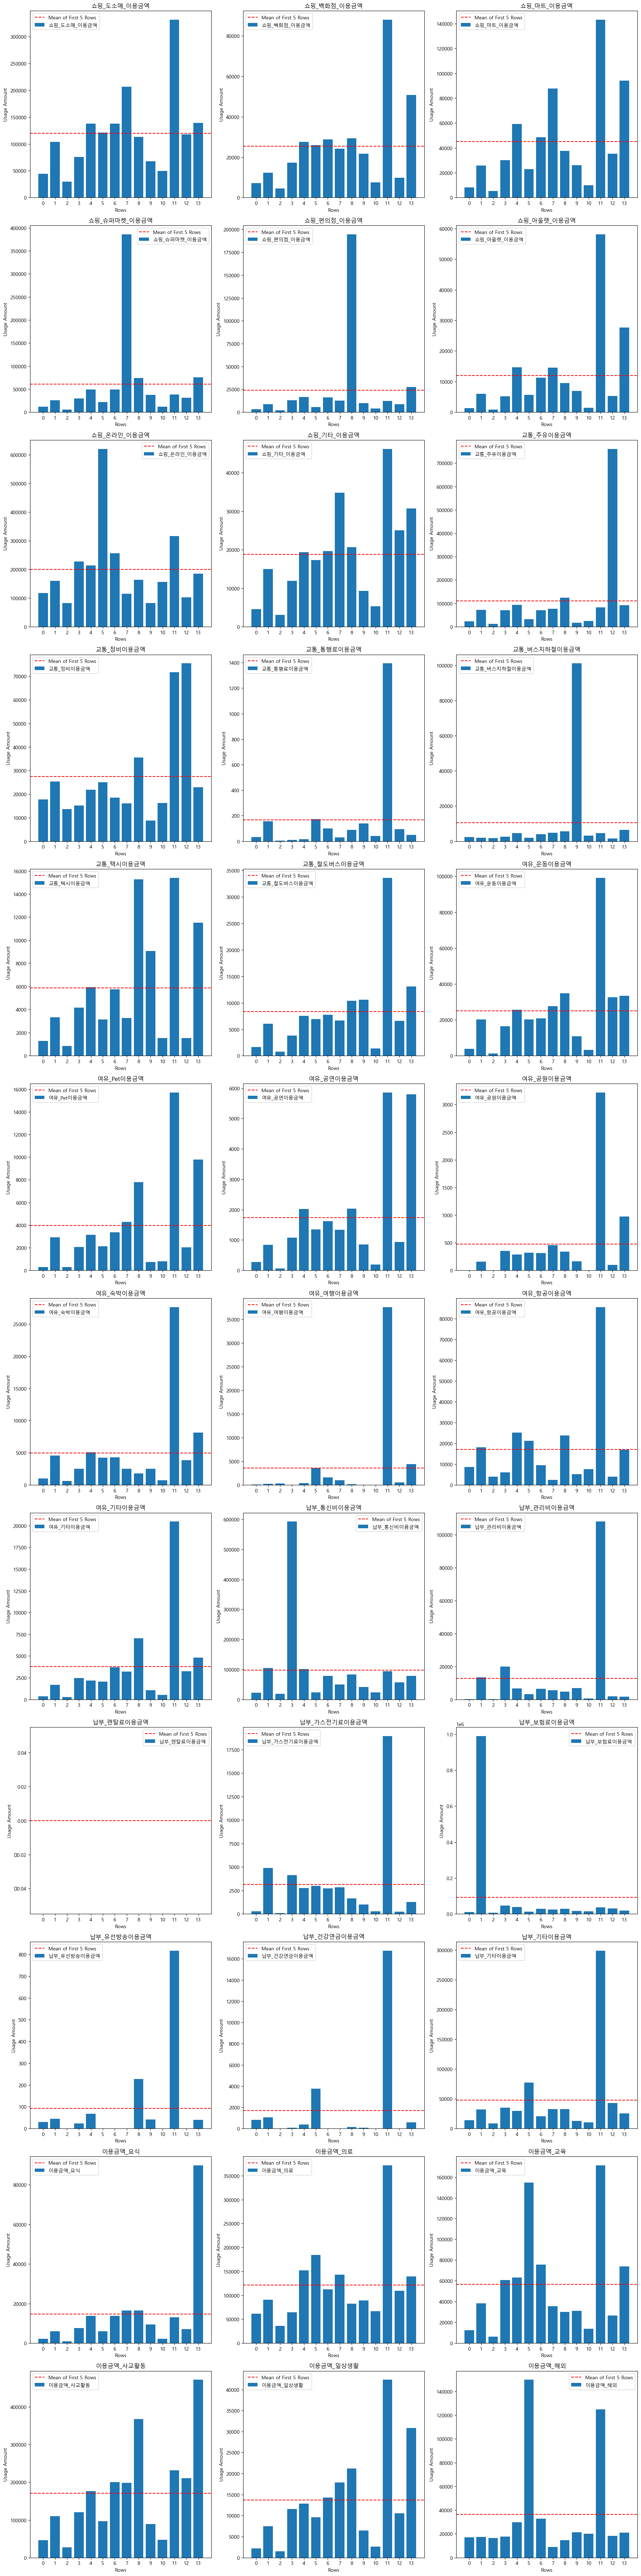

In [20]:
cluster_mean=df3.groupby('cluster').mean()
cluster_mean

plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:14, 1:].mean()

# Plotting for each column
num_columns = len(cluster_mean.columns) - 1
num_rows = (num_columns + 2) // 3  # Ceiling division
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

for col_index in range(1, num_columns + 1):
    row = (col_index - 1) // 3
    col = (col_index - 1) % 3
    column_name = cluster_mean.columns[col_index]
    
    ax = axes[row, col]
    ax.bar(range(14), cluster_mean.iloc[:14, col_index], label=column_name)
    ax.axhline(y=mean_of_first_5_rows[col_index - 1], color='r', linestyle='--', label='Mean of First 5 Rows')
    ax.set_xlabel('Rows')
    ax.set_ylabel('Usage Amount')
    ax.set_title(column_name)
    ax.legend()
    ax.set_xticks(range(14))

# Remove any unused subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [22]:
cluster_mean

연령    쇼핑_도소매_이용금액   쇼핑_백화점_이용금액     쇼핑_마트_이용금액   쇼핑_슈퍼마켓_이용금액  \
cluster                                                                         
0        59.451444   44549.485564   7243.188976    8058.136483   11793.044619   
1        46.324468  103818.369681  12321.143617   25753.757979   25475.159574   
2        46.021922   29499.106239   4448.684654    5315.362563    5414.907251   
3        43.475593   75523.417015  17175.249651   30006.276151   29634.146444   
4        64.784783  137643.940217  27494.565217   59128.151087   49132.270652   
5        47.333786  121177.020353  25870.219810   22799.552239   22257.549525   
6        31.523230  137810.560841  28832.828540   48535.300885   49387.973451   
7        45.588448  206422.924188  24221.115523   87694.480144  385972.007220   
8        46.098901  113262.692308  29374.747253   37595.934066   74334.887912   
9        46.633603   67560.904858  21695.870445   25944.253036   37754.585020   
10       33.774005   49592.139344   7428.454333    9820.725995   11537.405152   
11       45.912929  331113.355541  87929.624011  143119.291557   37980.047493   
12       43.949672  117700.827133   9800.124726   35426.039387   31503.897155   
13       45.760968  139370.425113  50761.479576   94093.862330   75848.736762   

           쇼핑_편의점_이용금액   쇼핑_아울렛_이용금액    쇼핑_온라인_이용금액    쇼핑_기타_이용금액  \
cluster                                                             
0          3374.225722   1348.608924  117552.234908   4552.007874   
1          8561.010638   5969.095745  159923.803191  14995.531915   
2          2198.600337    796.087690   82981.433390   3101.854975   
3         12963.960948   5113.640167  227548.649930  11907.085077   
4         16670.760870  14681.771739  213922.504348  19342.380435   
5          5621.886024   5642.485753  620352.957938  17296.702849   
6         16290.453540  11308.240044  256652.485619  19593.296460   
7         12590.342960  14488.772563  115181.375451  34798.736462   
8        194685.846154   9550.241758  164069.380220  20698.087912   
9          9875.991903   6901.578947   82605.307692   9328.157895   
10         3892.072600   1459.543326  155700.984778   5267.775176   
11        12057.856201  58115.506596  316009.718997  46208.621372   
12         8773.807440   5292.603939  101987.256018  25046.094092   
13        27523.782148  27605.691377  185007.627837  30742.435703   

             교통_주유이용금액  ...     납부_보험료이용금액  납부_유선방송이용금액   납부_건강연금이용금액  \
cluster                 ...                                             
0         23485.020997  ...   11834.754593    29.925197    820.947507   
1         71647.183511  ...  989228.944149    44.273936   1068.659574   
2         12430.919056  ...    6099.224283     0.000000      0.000000   
3         69628.281729  ...   47615.853556    23.012552     59.297071   
4         93653.933696  ...   39414.592391    67.818478    383.583696   
5         31559.563094  ...   11963.919946     0.000000   3770.077341   
6         70372.888274  ...   29018.387168     0.000000      0.000000   
7         77130.406137  ...   25250.046931     0.000000      0.000000   
8        123987.593407  ...   29007.417582   226.843956    152.305495   
9         16862.550607  ...   17321.809717    41.246964     84.838057   
10        25054.462529  ...   14559.777518     0.000000      0.000000   
11        83404.020449  ...   36098.808047   816.939314  16760.081794   
12       760753.636761  ...   29813.522976     0.000000      0.000000   
13        91287.358548  ...   18548.096823    39.939486    572.605144   

             납부_기타이용금액       이용금액_요식        이용금액_의료        이용금액_교육  \
cluster                                                              
0         14097.942257   2217.270341   61434.774278   12459.514436   
1         31814.640957   6016.861702   90774.069149   38336.941489   
2          8512.738617    929.258010   36262.647555    6236.593592   
3         34771.810321   7608.214784   64314.847978   60829.944212   
4         29568.100000  1

In [120]:
selected_columns = [ '쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외' ]
cluster_mean['total'] = cluster_mean[selected_columns].sum(axis=1)
round(cluster_mean.T,3)

cluster                0            1            2           3            4   \
쇼핑_도소매_이용금액    103035.774    59262.593   201723.352   19196.953   368511.497   
쇼핑_백화점_이용금액      9098.673    21385.960    25019.441    4099.136    89792.029   
쇼핑_마트_이용금액      24621.516    21033.131    60915.185    3863.640    31054.037   
쇼핑_슈퍼마켓_이용금액    31622.427    16353.611   355781.191    4414.433    33984.809   
쇼핑_편의점_이용금액     10410.111     6981.995    12502.809    1633.031    12077.489   
쇼핑_아울렛_이용금액      3473.031     3942.652    13277.515     538.159    49976.732   
쇼핑_온라인_이용금액     87663.569  1943567.854   113473.591   75336.153   193632.139   
쇼핑_기타_이용금액      25069.085     7317.702    33455.448    2271.353    43936.265   
교통_주유이용금액      697990.277    32523.859    72212.497   11036.341    71717.416   
교통_정비이용금액       70508.865     5945.593    14744.907   13748.499    76186.956   
교통_통행료이용금액         80.222       46.970       27.315       7.790     1376.515   
교통_버스지하철이용금액     1689.778     2047.879     4698.272    1564.561     4057.258   
교통_택시이용금액        1640.444     1940.657     3410.139     632.635    16783.835   
교통_철도버스이용금액      4243.808     3128.788     6035.185     480.453    34557.645   
여유_운동이용금액       26211.091     8788.081    24443.194    1241.360   105013.052   
여유_Pet이용금액       2720.148     1410.949     4498.534     137.465    14924.566   
여유_공연이용금액         892.791     1737.694     1096.914      62.677     5835.423   
여유_공원이용금액         117.190      161.237      456.250       1.487     2916.084   
여유_숙박이용금액        3034.965     2157.614     3278.318     424.483    28342.041   
여유_여행이용금액        1645.562      326.263      897.840      43.725    36818.801   
여유_항공이용금액        5880.776    21830.202     2114.815    3236.712    94823.841   
여유_기타이용금액        2982.209     1453.030     2689.028     160.694    19767.595   
납부_통신비이용금액      55657.989    40909.396    46914.796    9821.181    68562.909   
납부_관리비이용금액        416.784      400.202     3468.256       0.000     2696.540   
납부_렌탈료이용금액          0.000        0.000        0.000       0.000        0.000   
납부_가스전기료이용금액      130.314     1332.020     2136.281     123.208    17677.370   
납부_보험료이용금액      26005.349    11976.470    25798.502    4824.640    27410.092   
납부_유선방송이용금액         0.000        0.000        0.000       0.000      763.467   
납부_건강연금이용금액         0.000        0.000       20.486       0.000    16912.814   
납부_기타이용금액       40551.795    66776.280    29239.856    7722.270   285079.468   
이용금액_요식          6920.887     7738.543    15678.889     820.375    11516.046   
이용금액_의료        112969.113    74992.359   141963.441   29046.684   393619.452   
이용금액_교육         21304.787    25524.015    36466.273    3971.926   214962.954   
이용금액_사교활동      187622.564    71763.169   195606.065   20546.261   246576.756   
이용금액_일상생활        8518.355     6630.278    17852.901    1213.612    40413.338   
이용금액_해외         18982.510    65955.664     9077.415   12849.760   157327.424   
total         1593712.760  2537342.710  1480974.901  235071.657  2819604.656   

cluster                5           6            7            8           9   \
쇼핑_도소매_이용금액     85241.510   64796.554   151025.981    95399.614  111907.782   
쇼핑_백화점_이용금액     22066.733   17561.318    47059.391    27374.463   20146.148   
쇼핑_마트_이용금액      37556.811   22358.332    67109.043    36039.868   22231.409   
쇼핑_슈퍼마켓_이용금액    37833.899   35351.940    72597.734    69324.810   30972.031   
쇼핑_편의점_이용금액     16368.406    9599.192    26485.316   179465.819    7869.972   
쇼핑_아울렛_이용금액      6664.671    6203.093    29018.506     9678.021    4929.669   
쇼핑_온라인_이용금액    223179.225   85017.218   207086.472   165543.181  108051.085   
쇼핑_기타_이용금액      14999.483    8544.991    28578.568    19781.977   15649.093   
교통_주유이용금액       82794.091   17201.606    96127.046   116149.704   41773.835   
교통_정비이용금액       17530.029    8014.589    21732.729    36760.638   24307.049   
교통_통행료이용금액         23.427     122.320       52.903       55.556      97.963   
교통_버스지하철이용금

In [124]:
round(cluster_mean['total'],3).sort_values(ascending=False)

cluster
4     2819604.656
1     2537342.710
11    1865772.497
7     1786568.333
10    1724781.827
12    1717247.476
5     1626280.920
0     1593712.760
8     1500578.228
2     1480974.901
9      896418.302
13     841246.470
6      722916.977
3      235071.657
Name: total, dtype: float64

In [122]:
cluster_mean[selected_columns] = cluster_mean[selected_columns].div(cluster_mean['total'], axis=0).round(3)
round(cluster_mean.T,3)

cluster                0            1            2           3            4   \
쇼핑_도소매_이용금액         0.065        0.023        0.136       0.082        0.131   
쇼핑_백화점_이용금액         0.006        0.008        0.017       0.017        0.032   
쇼핑_마트_이용금액          0.015        0.008        0.041       0.016        0.011   
쇼핑_슈퍼마켓_이용금액        0.020        0.006        0.240       0.019        0.012   
쇼핑_편의점_이용금액         0.007        0.003        0.008       0.007        0.004   
쇼핑_아울렛_이용금액         0.002        0.002        0.009       0.002        0.018   
쇼핑_온라인_이용금액         0.055        0.766        0.077       0.320        0.069   
쇼핑_기타_이용금액          0.016        0.003        0.023       0.010        0.016   
교통_주유이용금액           0.438        0.013        0.049       0.047        0.025   
교통_정비이용금액           0.044        0.002        0.010       0.058        0.027   
교통_통행료이용금액          0.000        0.000        0.000       0.000        0.000   
교통_버스지하철이용금액        0.001        0.001        0.003       0.007        0.001   
교통_택시이용금액           0.001        0.001        0.002       0.003        0.006   
교통_철도버스이용금액         0.003        0.001        0.004       0.002        0.012   
여유_운동이용금액           0.016        0.003        0.017       0.005        0.037   
여유_Pet이용금액          0.002        0.001        0.003       0.001        0.005   
여유_공연이용금액           0.001        0.001        0.001       0.000        0.002   
여유_공원이용금액           0.000        0.000        0.000       0.000        0.001   
여유_숙박이용금액           0.002        0.001        0.002       0.002        0.010   
여유_여행이용금액           0.001        0.000        0.001       0.000        0.013   
여유_항공이용금액           0.004        0.009        0.001       0.014        0.034   
여유_기타이용금액           0.002        0.001        0.002       0.001        0.007   
납부_통신비이용금액          0.035        0.016        0.032       0.042        0.024   
납부_관리비이용금액          0.000        0.000        0.002       0.000        0.001   
납부_렌탈료이용금액          0.000        0.000        0.000       0.000        0.000   
납부_가스전기료이용금액        0.000        0.001        0.001       0.001        0.006   
납부_보험료이용금액          0.016        0.005        0.017       0.021        0.010   
납부_유선방송이용금액         0.000        0.000        0.000       0.000        0.000   
납부_건강연금이용금액         0.000        0.000        0.000       0.000        0.006   
납부_기타이용금액           0.025        0.026        0.020       0.033        0.101   
이용금액_요식             0.004        0.003        0.011       0.003        0.004   
이용금액_의료             0.071        0.030        0.096       0.124        0.140   
이용금액_교육             0.013        0.010        0.025       0.017        0.076   
이용금액_사교활동           0.118        0.028        0.132       0.087        0.087   
이용금액_일상생활           0.005        0.003        0.012       0.005        0.014   
이용금액_해외             0.012        0.026        0.006       0.055        0.056   
total         1593712.760  2537342.710  1480974.901  235071.657  2819604.656   

cluster                5           6            7            8           9   \
쇼핑_도소매_이용금액         0.052       0.090        0.085        0.064       0.125   
쇼핑_백화점_이용금액         0.014       0.024        0.026        0.018       0.022   
쇼핑_마트_이용금액          0.023       0.031        0.038        0.024       0.025   
쇼핑_슈퍼마켓_이용금액        0.023       0.049        0.041        0.046       0.035   
쇼핑_편의점_이용금액         0.010       0.013        0.015        0.120       0.009   
쇼핑_아울렛_이용금액         0.004       0.009        0.016        0.006       0.005   
쇼핑_온라인_이용금액         0.137       0.118        0.116        0.110       0.121   
쇼핑_기타_이용금액          0.009       0.012        0.016        0.013       0.017   
교통_주유이용금액           0.051       0.024        0.054        0.077       0.047   
교통_정비이용금액           0.011       0.011        0.012        0.024       0.027   
교통_통행료이용금액          0.000       0.000        0.000        0.000       0.000   
교통_버스지하철이용금

In [115]:
cluster_mean

쇼핑_도소매_이용금액   쇼핑_백화점_이용금액     쇼핑_마트_이용금액   쇼핑_슈퍼마켓_이용금액  \
cluster                                                              
0        103035.774492   9098.672828   24621.515712   31622.426987   
1         59262.593434  21385.959596   21033.131313   16353.611111   
2        201723.351852  25019.441358   60915.185185  355781.191358   
3         19196.953258   4099.135977    3863.640227    4414.433428   
4        368511.496565  89792.028732   31054.036852   33984.808869   
5         85241.510490  22066.732867   37556.811189   37833.899301   
6         64796.553603  17561.318102   22358.332162   35351.940246   
7        151025.980645  47059.390968   67109.042581   72597.734194   
8         95399.613936  27374.463277   36039.868173   69324.809793   
9        111907.782407  20146.148148   22231.409259   30972.031481   
10       131545.787194  33174.794727  483290.337100   58710.131827   
11        97786.154023  13205.954023   25721.110345   27503.563218   
12        70775.317073  17219.237805   40752.804878   34222.954268   
13        58550.367580   9173.561644   12795.410959   10761.278539   

           쇼핑_편의점_이용금액   쇼핑_아울렛_이용금액   쇼핑_온라인_이용금액    쇼핑_기타_이용금액  \
cluster                                                            
0         10410.110906   3473.031423  8.766357e+04  25069.085028   
1          6981.994949   3942.651515  1.943568e+06   7317.702020   
2         12502.808642  13277.515432  1.134736e+05  33455.447531   
3          1633.031161    538.158640  7.533615e+04   2271.352691   
4         12077.489069  49976.732042  1.936321e+05  43936.264834   
5         16368.405594   6664.671329  2.231792e+05  14999.482517   
6          9599.191564   6203.093146  8.501722e+04   8544.991213   
7         26485.316129  29018.505806  2.070865e+05  28578.567742   
8        179465.819209   9678.020716  1.655432e+05  19781.977401   
9          7869.972222   4929.668519  1.080511e+05  15649.092593   
10        12480.489642  27765.499058  1.979637e+05  32113.465160   
11         8653.034483   7589.655172  1.716412e+05  14939.310345   
12         8314.268293  25649.146341  2.012907e+05  10629.725610   
13         4776.552511   1311.324201  1.882691e+05   7978.401826   

             교통_주유이용금액     교통_정비이용금액  ...     납부_보험료이용금액  납부_유선방송이용금액  \
cluster                               ...                               
0        697990.277264  70508.865065  ...   26005.349353     0.000000   
1         32523.858586   5945.593434  ...   11976.469697     0.000000   
2         72212.496914  14744.907407  ...   25798.501543     0.000000   
3         11036.340652  13748.498584  ...    4824.639518     0.000000   
4         71717.415990  76186.956277  ...   27410.092442   763.466583   
5         82794.090909  17530.029371  ...   48485.076923     0.000000   
6         17201.606327   8014.588752  ...   14791.659051    35.810193   
7         96127.046452  21732.729032  ...   19815.538065    62.301935   
8        116149.704331  36760.638418  ...   31546.506591   194.376648   
9         41773.835185  24307.049074  ...   16735.345370    21.113889   
10       100246.401130  19802.849341  ...   31979.306968   106.740113   
11        77079.917241  24601.356322  ...  918264.508046    38.268966   
12        62819.323171   7711.317073  ...   40966.844512     0.000000   
13        30036.077626   9386.484018  ...   21625.509132    37.671233   

          납부_건강연금이용금액      납부_기타이용금액       이용금액_요식        이용금액_의료  \
cluster                                                             
0            0.000000   40551.794824   6920.887246  112969.112754   
1            0.000000   66776.280303   7738.542929   74992.358586   
2           20.486111   29239.856481  15678.888889  141963.441358   
3            0.000000    7722.269830    820.375354   29046.684136   
4        16912.813866  285079.468457  11516.046221  393619.452217   
5            0.000000   33281.149650  10119.734266   71788.525874   
6           73.655536   11158.442882   8222.478032   94250.467487   
7          

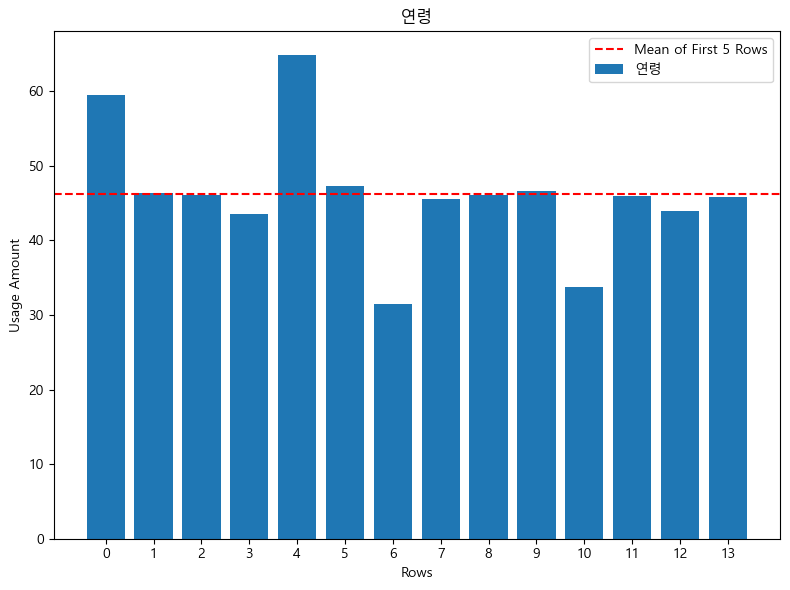

In [24]:
plt.rc('font', family='Malgun Gothic')
# Calculate the mean of the first 5 rows
mean_of_first_5_rows = cluster_mean.iloc[:14].mean()

# Plotting
plt.figure(figsize=(8, 6))

# Plotting the bar graph for the first 5 rows
plt.bar(range(14), cluster_mean['연령'][:14], label='연령')

# Plotting the red line for the mean of the first 5 rows
plt.axhline(y=mean_of_first_5_rows['연령'], color='r', linestyle='--', label='Mean of First 5 Rows')

plt.xlabel('Rows')
plt.ylabel('Usage Amount')
plt.title('연령')
plt.legend()

plt.xticks(range(14))
plt.tight_layout()
plt.show()

# pred_휴면

In [148]:
new_=df[df['prediction']=='휴면']
new_df=new_[[  '연령','쇼핑_도소매_이용금액','쇼핑_백화점_이용금액' , '쇼핑_마트_이용금액',  '쇼핑_슈퍼마켓_이용금액' ,'쇼핑_편의점_이용금액' , '쇼핑_아울렛_이용금액' , '쇼핑_온라인_이용금액' , 
'쇼핑_기타_이용금액' ,   '교통_주유이용금액' ,'교통_정비이용금액' ,'교통_통행료이용금액' ,'교통_버스지하철이용금액'  ,'교통_택시이용금액' ,
'교통_철도버스이용금액' ,'여유_운동이용금액', '여유_Pet이용금액' , '여유_공연이용금액' ,'여유_공원이용금액' ,'여유_숙박이용금액' ,
'여유_여행이용금액' ,'여유_항공이용금액' ,'여유_기타이용금액' , '납부_통신비이용금액' ,'납부_관리비이용금액' ,'납부_렌탈료이용금액' ,
'납부_가스전기료이용금액'  ,'납부_보험료이용금액' ,'납부_유선방송이용금액' ,'납부_건강연금이용금액' ,'납부_기타이용금액' ,'이용금액_요식',  '이용금액_의료',  
 '이용금액_교육' ,'이용금액_사교활동', '이용금액_일상생활' ,'이용금액_해외']]

In [48]:
df3=df3.drop(['cluster'],axis=1)

KeyError: "['cluster'] not found in axis"

In [49]:
new_df

연령  쇼핑_도소매_이용금액  쇼핑_백화점_이용금액  쇼핑_마트_이용금액  쇼핑_슈퍼마켓_이용금액  쇼핑_편의점_이용금액  \
8      54        28520            0           0             0       160700   
17     65            0            0           0             0            0   
28     59       246220            0           0             0            0   
35     29            0            0           0             0            0   
42     40            0            0           0             0            0   
...    ..          ...          ...         ...           ...          ...   
69375  26            0            0           0             0            0   
69377  49            0            0       63870             0            0   
69381  44            0            0           0             0            0   
69382  41        79000            0           0         38170        72000   
69383  34            0            0           0             0            0   

       쇼핑_아울렛_이용금액  쇼핑_온라인_이용금액  쇼핑_기타_이용금액  교통_주유이용금액  ...  납부_보험료이용금액  \
8                0            0           0      75000  ...           0   
17               0            0           0          0  ...           0   
28          307620            0           0          0  ...           0   
35               0        73000           0          0  ...           0   
42               0            0           0      30075  ...      100350   
...            ...          ...         ...        ...  ...         ...   
69375            0      4000000           0      50000  ...       31000   
69377            0            0           0      20000  ...           0   
69381            0            0           0          0  ...           0   
69382            0            0           0      99000  ...           0   
69383            0            0           0          0  ...           0   

       납부_유선방송이용금액  납부_건강연금이용금액  납부_기타이용금액  이용금액_요식  이용금액_의료  이용금액_교육  \
8                0            0          0        0    14000        0   
17               0            0          0        0        0  1623000   
28               0            0      19400        0        0        0   
35               0            0          0        0        0        0   
42               0            0          0        0        0        0   
...            ...          ...        ...      ...      ...      ...   
69375            0            0          0        0        0        0   
69377            0            0          0        0        0        0   
69381            0            0       2700        0        0        0   
69382            0            0       2700     6900    10700        0   
69383            0            0          0        0        0        0   

       이용금액_사교활동  이용금액_일상생활  이용금액_해외  
8         175000          0        0  
17             0          0        0  
28         24000          0        0  
35             0          0        0  
42             0          0        0  
...          ...        ...      ...  
69375      24000          0        0  
69377      87000          0        0  
69381          0          0        0  
69382      30500          0        0  
69383          0          0        0  

[14442 rows x 37 columns]

In [50]:
df3

연령  쇼핑_도소매_이용금액  쇼핑_백화점_이용금액  쇼핑_마트_이용금액  쇼핑_슈퍼마켓_이용금액  쇼핑_편의점_이용금액  \
7388   56            0            0           0             0            0   
26896  32        56600            0           0         32350        82900   
11745  41            0            0           0             0        45000   
40651  45       132000            0           0             0         9000   
29215  45            0            0           0         13500            0   
...    ..          ...          ...         ...           ...          ...   
37011  62        65400            0       14790         73550            0   
16369  40            0            0           0             0            0   
37651  51            0            0           0             0        12000   
55739  42       877200            0           0         45880            0   
57916  35       187600        10000           0          3500        43500   

       쇼핑_아울렛_이용금액  쇼핑_온라인_이용금액  쇼핑_기타_이용금액  교통_주유이용금액  ...  납부_보험료이용금액  \
7388             0            0           0      97000  ...           0   
26896            0            0           0          0  ...           0   
11745            0            0           0     562000  ...           0   
40651            0            0           0          0  ...           0   
29215            0      1434000           0      24975  ...           0   
...            ...          ...         ...        ...  ...         ...   
37011            0            0       29500      88000  ...           0   
16369            0            0           0          0  ...           0   
37651            0      1922873       40110          0  ...           0   
55739            0        68700           0     100000  ...      530640   
57916            0            0        5000          0  ...           0   

       납부_유선방송이용금액  납부_건강연금이용금액  납부_기타이용금액  이용금액_요식  이용금액_의료  이용금액_교육  \
7388             0            0          0        0    19800        0   
26896            0            0       9900     9000        0        0   
11745            0            0          0        0    62950        0   
40651            0            0          0        0    67600        0   
29215            0            0     152720        0        0        0   
...            ...          ...        ...      ...      ...      ...   
37011            0            0          0        0        0        0   
16369            0            0          0        0        0        0   
37651            0            0          0        0     5300        0   
55739            0            0          0        0    84700        0   
57916            0            0          0    23000     7500        0   

       이용금액_사교활동  이용금액_일상생활  이용금액_해외  
7388      110500          0    14849  
26896     112400      13000        0  
11745          0          0        0  
40651     162500          0        0  
29215          0          0        0  
...          ...        ...      ...  
37011     102000          0        0  
16369          0          0        0  
37651          0          0        0  
55739      27000      50000        0  
57916      34900      50000        0  

[10000 rows x 37 columns]

In [51]:
new_cosine_sim = cosine_similarity(new_df, df3)
# 클러스터링을 통해 군집화
new_predict = pd.DataFrame(km.predict(new_cosine_sim))
new_predict.columns = ['Cluster']
new_predict

Cluster
0            8
1           11
2           11
3            3
4            3
...        ...
14437        5
14438        3
14439       11
14440        3
14441        5

[14442 rows x 1 columns]

In [52]:
new_predict.value_counts()

Cluster
5          5665
11         3779
3          1282
12         1093
13          863
7           721
1           661
8           200
9           178
dtype: int64

In [150]:
predict

Cluster
0           4
1           6
2           0
3          13
4           4
...       ...
9995        9
9996        3
9997        1
9998       11
9999        6

[10000 rows x 1 columns]

In [153]:
new_predict_df = new_predict.value_counts().reset_index()
new_predict_df.columns = ['cluster', 'count']
new_predict_df

cluster  count
0        5   5665
1       11   3779
2        3   1282
3       12   1093
4       13    863
5        7    721
6        1    661
7        8    200
8        9    178

In [157]:
predict_df = predict.value_counts().reset_index()
predict_df.columns = ['cluster', 'count']
predict_df

cluster  count
0         4   1601
1         3   1412
2         9   1080
3         7    775
4         5    715
5         2    648
6         6    569
7         0    541
8         8    531
9        10    531
10       13    438
11       11    435
12        1    396
13       12    328

In [162]:
new_predict_df = new_predict.value_counts().reset_index()
new_predict_df.columns = ['cluster', 'count']

# predict_df 생성
predict_df = predict.value_counts().reset_index()
predict_df.columns = ['cluster', 'count']

# 두 데이터프레임 합치기
merged_ = pd.merge(new_predict_df, predict_df, on='cluster', suffixes=('_new', '_predict'))

# sum 칼럼 추가
merged_['sum'] = merged_['count_new'] + merged_['count_predict']
merged_

cluster  count_new  count_predict   sum
0        5       5665            715  6380
1       11       3779            435  4214
2        3       1282           1412  2694
3       12       1093            328  1421
4       13        863            438  1301
5        7        721            775  1496
6        1        661            396  1057
7        8        200            531   731
8        9        178           1080  1258

In [168]:
merged_['이탈률']=merged_['count_new']/merged_['sum']
merged_.sort_values(['이탈률'],ascending=False)

cluster  count_new  count_predict   sum       이탈률
1       11       3779            435  4214  0.896773
0        5       5665            715  6380  0.887931
3       12       1093            328  1421  0.769177
4       13        863            438  1301  0.663336
6        1        661            396  1057  0.625355
5        7        721            775  1496  0.481952
2        3       1282           1412  2694  0.475872
7        8        200            531   731  0.273598
8        9        178           1080  1258  0.141494

In [54]:
new_['cluster']=new_predict['Cluster'].values
new_

C:\Users\User\AppData\Local\Temp\ipykernel_11228\829461944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['cluster']=new_predict['Cluster'].values


Unnamed: 0.1  Unnamed: 0      회원번호  남녀구분코드  연령  소지여부_신용   입회일자_신용  \
8                43          43  sytxTIWe       1  54        1  20160202   
17               81          81  qJVMhX52       1  65        1  20090413   
28              148         148  jJpomaur       1  59        1  20040603   
35              191         191  M6X9TldS       2  29        1  20050321   
42              235         235  8CpoNiZA       2  40        1  20160831   
...             ...         ...       ...     ...  ..      ...       ...   
69375        299938      299938  45lIwbJA       2  26        1  20160921   
69377        299943      299943  vdBya0ZX       2  49        1  20131023   
69381        299965      299965  u3m5mxIA       1  44        1  20120912   
69382        299974      299974  WoxfyQXF       2  41        1  20020121   
69383        299976      299976  n4Tx2THz       1  34        1  19941017   

       입회경과개월수_신용  탈회여부  회원여부_연체  ...  Monetary_s  labels_k  Recency_8  \
8              35     0        0  ...    0.001465         1          8   
17            117     0        0  ...    0.002731         1          8   
28            175     0        0  ...    0.001818         1          8   
35            166     1        0  ...    0.001459         1          8   
42             28     1        0  ...    0.004079         1          8   
...           ...   ...      ...  ...         ...       ...        ...   
69375          28     1        0  ...    0.002435         1          8   
69377          63     0        0  ...    0.002204         1          8   
69381          76     1        0  ...    0.001743         1          8   
69382         204     0        0  ...    0.001649         1          8   
69383         291     1        0  ...    0.004613         1          8   

       Frequency_8 Monetary_8  RFM_Score RFM_Class  고객구분_New  prediction  \
8                4          4  53.181605   놓치면안될고객        간헐          휴면   
17               5          6  68.716172    잠재충성고객        간헐          휴면   
28               4          4  53.181605   놓치면안될고객        간헐          휴면   
35               4          4  53.181605   놓치면안될고객        간헐          휴면   
42               3          7  56.796880   놓치면안될고객        간헐          휴면   
...            ...        ...        ...       ...       ...         ...   
69375            3          6  52.966911   놓치면안될고객        간헐          휴면   
69377            4          5  57.011574   놓치면안될고객        간헐          휴면   
69381            5          4  61.056236    잠재충성고객        간헐          휴면   
69382            4          4  53.181605   놓치면안될고객        간헐          휴면   
69383            2          8  52.752218   놓치면안될고객        간헐          휴면   

       cluster  
8            8  
17          11  
28          11  
35           3  
42           3  
...        ...  
69375        5  
69377        3  
69381       11  
69382        3  
69383        5  

[14442 rows x 319 columns]

In [55]:
new_

Unnamed: 0.1  Unnamed: 0      회원번호  남녀구분코드  연령  소지여부_신용   입회일자_신용  \
8                43          43  sytxTIWe       1  54        1  20160202   
17               81          81  qJVMhX52       1  65        1  20090413   
28              148         148  jJpomaur       1  59        1  20040603   
35              191         191  M6X9TldS       2  29        1  20050321   
42              235         235  8CpoNiZA       2  40        1  20160831   
...             ...         ...       ...     ...  ..      ...       ...   
69375        299938      299938  45lIwbJA       2  26        1  20160921   
69377        299943      299943  vdBya0ZX       2  49        1  20131023   
69381        299965      299965  u3m5mxIA       1  44        1  20120912   
69382        299974      299974  WoxfyQXF       2  41        1  20020121   
69383        299976      299976  n4Tx2THz       1  34        1  19941017   

       입회경과개월수_신용  탈회여부  회원여부_연체  ...  Monetary_s  labels_k  Recency_8  \
8              35     0        0  ...    0.001465         1          8   
17            117     0        0  ...    0.002731         1          8   
28            175     0        0  ...    0.001818         1          8   
35            166     1        0  ...    0.001459         1          8   
42             28     1        0  ...    0.004079         1          8   
...           ...   ...      ...  ...         ...       ...        ...   
69375          28     1        0  ...    0.002435         1          8   
69377          63     0        0  ...    0.002204         1          8   
69381          76     1        0  ...    0.001743         1          8   
69382         204     0        0  ...    0.001649         1          8   
69383         291     1        0  ...    0.004613         1          8   

       Frequency_8 Monetary_8  RFM_Score RFM_Class  고객구분_New  prediction  \
8                4          4  53.181605   놓치면안될고객        간헐          휴면   
17               5          6  68.716172    잠재충성고객        간헐          휴면   
28               4          4  53.181605   놓치면안될고객        간헐          휴면   
35               4          4  53.181605   놓치면안될고객        간헐          휴면   
42               3          7  56.796880   놓치면안될고객        간헐          휴면   
...            ...        ...        ...       ...       ...         ...   
69375            3          6  52.966911   놓치면안될고객        간헐          휴면   
69377            4          5  57.011574   놓치면안될고객        간헐          휴면   
69381            5          4  61.056236    잠재충성고객        간헐          휴면   
69382            4          4  53.181605   놓치면안될고객        간헐          휴면   
69383            2          8  52.752218   놓치면안될고객        간헐          휴면   

       cluster  
8            8  
17          11  
28          11  
35           3  
42           3  
...        ...  
69375        5  
69377        3  
69381       11  
69382        3  
69383        5  

[14442 rows x 319 columns]

In [56]:
new_['cluster']=new_predict['Cluster'].values
new=new_[['회원번호','_1순위카드ID','cluster']]
new.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11228\853056276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['cluster']=new_predict['Cluster'].values


회원번호  _1순위카드ID  cluster
8   sytxTIWe       136        8
17  qJVMhX52      1068       11
28  jJpomaur       487       11
35  M6X9TldS       302        3
42  8CpoNiZA       156        3

In [58]:
new_

Unnamed: 0.1  Unnamed: 0      회원번호  남녀구분코드  연령  소지여부_신용   입회일자_신용  \
8                43          43  sytxTIWe       1  54        1  20160202   
17               81          81  qJVMhX52       1  65        1  20090413   
28              148         148  jJpomaur       1  59        1  20040603   
35              191         191  M6X9TldS       2  29        1  20050321   
42              235         235  8CpoNiZA       2  40        1  20160831   
...             ...         ...       ...     ...  ..      ...       ...   
69375        299938      299938  45lIwbJA       2  26        1  20160921   
69377        299943      299943  vdBya0ZX       2  49        1  20131023   
69381        299965      299965  u3m5mxIA       1  44        1  20120912   
69382        299974      299974  WoxfyQXF       2  41        1  20020121   
69383        299976      299976  n4Tx2THz       1  34        1  19941017   

       입회경과개월수_신용  탈회여부  회원여부_연체  ...  Monetary_s  labels_k  Recency_8  \
8              35     0        0  ...    0.001465         1          8   
17            117     0        0  ...    0.002731         1          8   
28            175     0        0  ...    0.001818         1          8   
35            166     1        0  ...    0.001459         1          8   
42             28     1        0  ...    0.004079         1          8   
...           ...   ...      ...  ...         ...       ...        ...   
69375          28     1        0  ...    0.002435         1          8   
69377          63     0        0  ...    0.002204         1          8   
69381          76     1        0  ...    0.001743         1          8   
69382         204     0        0  ...    0.001649         1          8   
69383         291     1        0  ...    0.004613         1          8   

       Frequency_8 Monetary_8  RFM_Score RFM_Class  고객구분_New  prediction  \
8                4          4  53.181605   놓치면안될고객        간헐          휴면   
17               5          6  68.716172    잠재충성고객        간헐          휴면   
28               4          4  53.181605   놓치면안될고객        간헐          휴면   
35               4          4  53.181605   놓치면안될고객        간헐          휴면   
42               3          7  56.796880   놓치면안될고객        간헐          휴면   
...            ...        ...        ...       ...       ...         ...   
69375            3          6  52.966911   놓치면안될고객        간헐          휴면   
69377            4          5  57.011574   놓치면안될고객        간헐          휴면   
69381            5          4  61.056236    잠재충성고객        간헐          휴면   
69382            4          4  53.181605   놓치면안될고객        간헐          휴면   
69383            2          8  52.752218   놓치면안될고객        간헐          휴면   

       cluster  
8            8  
17          11  
28          11  
35           3  
42           3  
...        ...  
69375        5  
69377        3  
69381       11  
69382        3  
69383        5  

[14442 rows x 319 columns]

In [76]:
results = [] 

for i in range(14):
    # cluster 칼럼 값이 i인 행들 필터링
    cluster_i_rows = new_[new_['cluster'] == i]

    if not cluster_i_rows.empty:  # 클러스터 데이터가 존재하는지 확인
        # _1순위카드 칼럼의 최빈값 구하기
        mode_card = stats.mode(cluster_i_rows['_1순위카드ID'])[0][0]

        # 두 번째로 많이 사용하는 카드 구하기
        card_value_counts = cluster_i_rows['_1순위카드ID'].value_counts()
        second_mode_card = card_value_counts.index[1] if len(card_value_counts) > 1 else np.nan

        # 세 번째부터 60순위까지 사용하는 카드 구하기
        remaining_cards = card_value_counts.index[2:70] if len(card_value_counts) > 2 else []

        results.append([i, mode_card, second_mode_card] + list(remaining_cards))

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(results, columns=['cluster', '1순위', '2순위'] + [f'{i}순위' for i in range(3, 71)])
result_df.set_index('cluster', inplace=True)

result_df

C:\Users\User\AppData\Local\Temp\ipykernel_11228\3503060113.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_card = stats.mode(cluster_i_rows['_1순위카드ID'])[0][0]
C:\Users\User\AppData\Local\Temp\ipykernel_11228\3503060113.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

1순위   2순위   3순위   4순위   5순위   6순위   7순위   8순위   9순위  10순위  ...  61순위  \
cluster                                                             ...         
1        136   156  1561   492  1558   126   270   226    98   229  ...   157   
3        156   229   216   136   218   126   226  1561   302   482  ...   100   
5        136  1561  1514  1513   156   305  1555   126    98  1077  ...   489   
7        136    98  1555   156  1561   305  1558  1050   492   101  ...   482   
8        136   156    98   305   126  1561  1564  1555   491  1050  ...  1225   
9        136   305  1077   126    98  1558  1561   156  1555  1075  ...   470   
11       136  1077  1739  1561   156  1555   305  1558    98   126  ...  1706   
12       136   156  1558   870  1555  1561    98   491   305  1050  ...  1536   
13       136  1555  1558   305    98   126   156  1561   491  1077  ...  1512   

         62순위  63순위  64순위  65순위  66순위  67순위  68순위  69순위  70순위  
cluster                                                        
1         144   442   334  1293   441   249   218  1066   321  
3        1007   311   470   791   342   797   306  1328   838  
5         838   279   884   355   341   812   359   297   332  
7         112  1183  1007   332  1731   322  1536   313  1515  
8         810  1489   492   444   277   279  1405   794     1  
9         482   358   164   320   497   931   269   490   306  
11        230  1112  1405   809  1142   217   111   488  1567  
12        794   487   120   931   295   517   791   144   335  
13       1155   246   224  1400   135  1127   165   333  1725  

[9 rows x 70 columns]

In [114]:
merged_df = pd.merge(new, result_df, on='cluster')
merged_df.head(5)

회원번호  _1순위카드ID  cluster  1순위  2순위  3순위  4순위  5순위   6순위   7순위  ...  \
0  sytxTIWe       136        8  136  156   98  305  126  1561  1564  ...   
1  aD26XDLb       126        8  136  156   98  305  126  1561  1564  ...   
2  EqUBy5IP      1558        8  136  156   98  305  126  1561  1564  ...   
3  oKef7MW0       156        8  136  156   98  305  126  1561  1564  ...   
4  B0a93t06      1145        8  136  156   98  305  126  1561  1564  ...   

   61순위  62순위  63순위  64순위  65순위  66순위  67순위  68순위  69순위  70순위  
0  1225   810  1489   492   444   277   279  1405   794     1  
1  1225   810  1489   492   444   277   279  1405   794     1  
2  1225   810  1489   492   444   277   279  1405   794     1  
3  1225   810  1489   492   444   277   279  1405   794     1  
4  1225   810  1489   492   444   277   279  1405   794     1  

[5 rows x 73 columns]

In [ ]:
merged_df['소비군']=

In [78]:
def find_similar_consumption_pattern(member_id, merged_df):
    # 회원 번호로부터 클러스터 찾기
    member_cluster = merged_df.loc[merged_df['회원번호'] == member_id, 'cluster'].values[0]
    
    if member_cluster == -1:
        return "User not found in any cluster."
    
    # 같은 클러스터 내의 회원들 찾기
    similar_members = merged_df[merged_df['cluster'] == member_cluster]
    # 회원의 현재 사용카드 구하기
    current_cards = similar_members[similar_members['회원번호'] == member_id]['_1순위카드ID'].values[0]
    
    # 주사용카드 1순위, 2순위, 3순위 구하기
    top_cards = similar_members[['1순위', '2순위', '3순위']].mode().iloc[0]
    
    # 결과 문자열 생성
    result = f"User {member_id}'s current usage cards:\n"
    result += f"Current card: {current_cards}\n\n"
    result += f"Top cards for users with similar consumption patterns:\n"
    result += f"1st choice: {top_cards['1순위']}\n"
    result += f"2nd choice: {top_cards['2순위']}\n"
    result += f"3rd choice: {top_cards['3순위']}"
    
    return result

# 예시 사용
member_id = 'sytxTIWe'  # 입력하려는 회원 번호
result = find_similar_consumption_pattern(member_id, merged_df)
print(result)


User sytxTIWe's current usage cards:
Current card: 136

Top cards for users with similar consumption patterns:
1st choice: 136
2nd choice: 156
3rd choice: 98


In [125]:
# '소비군'과 '주력카드ID' 칼럼 초기화
merged_df['소비군'] = ""
merged_df['주력카드ID'] = ""

# 'cluster' 칼럼 값을 기반으로 '소비군'과 '주력카드ID' 값을 할당
for index, row in merged_df.iterrows():
    if row['cluster'] == 0:
        merged_df.at[index, '소비군'] = '주유'
        merged_df.at[index, '주력카드ID'] = '260'
    elif row['cluster'] == 1:
        merged_df.at[index, '소비군'] = '간편결제'
        merged_df.at[index, '주력카드ID'] = '114'
    elif row['cluster'] == 2:
        merged_df.at[index, '소비군'] = '마트'
        merged_df.at[index, '주력카드ID'] = '123'
    elif row['cluster'] == 3:
        merged_df.at[index, '소비군'] = '외식'
        merged_df.at[index, '주력카드ID'] = '136'
    elif row['cluster'] == 4:
        merged_df.at[index, '소비군'] = '마일리지'
        merged_df.at[index, '주력카드ID'] = '247'
    elif row['cluster'] == 5:
        merged_df.at[index, '소비군'] = '통신'
        merged_df.at[index, '주력카드ID'] = '226'
    elif row['cluster'] == 6:
        merged_df.at[index, '소비군'] = '교통'
        merged_df.at[index, '주력카드ID'] = '1061'
    elif row['cluster'] == 7:
        merged_df.at[index, '소비군'] = '레저'
        merged_df.at[index, '주력카드ID'] = '1007'
    elif row['cluster'] == 8:
        merged_df.at[index, '소비군'] = '전가맹점'
        merged_df.at[index, '주력카드ID'] = '130'
    elif row['cluster'] == 9:
        merged_df.at[index, '소비군'] = '해외'
        merged_df.at[index, '주력카드ID'] = '246'
    elif row['cluster'] == 10:
        merged_df.at[index, '소비군'] = '쇼핑'
        merged_df.at[index, '주력카드ID'] = '1400'
    elif row['cluster'] == 11:
        merged_df.at[index, '소비군'] = '병원'
        merged_df.at[index, '주력카드ID'] = '336'
    elif row['cluster'] == 12:
        merged_df.at[index, '소비군'] = '구독'
        merged_df.at[index, '주력카드ID'] = '1152'
    elif row['cluster'] == 13:
        merged_df.at[index, '소비군'] = '생활'
        merged_df.at[index, '주력카드ID'] = '1203'

In [338]:
pd.set_option('display.max_rows', 1000)
merged_df

회원번호  _1순위카드ID  cluster  1순위  2순위   3순위  4순위  5순위   6순위   7순위  \
0      sytxTIWe       136        8  136  156    98  305  126  1561  1564   
1      aD26XDLb       126        8  136  156    98  305  126  1561  1564   
2      EqUBy5IP      1558        8  136  156    98  305  126  1561  1564   
3      oKef7MW0       156        8  136  156    98  305  126  1561  1564   
4      B0a93t06      1145        8  136  156    98  305  126  1561  1564   
...         ...       ...      ...  ...  ...   ...  ...  ...   ...   ...   
14437  iWtMfNBg       126        9  136  305  1077  126   98  1558  1561   
14438  6PsR2Eya       305        9  136  305  1077  126   98  1558  1561   
14439  mF1zDjdZ       126        9  136  305  1077  126   98  1558  1561   
14440  tKVR0fnT       791        9  136  305  1077  126   98  1558  1561   
14441  vld14v19       785        9  136  305  1077  126   98  1558  1561   

        8순위   9순위  10순위  11순위  12순위  13순위  14순위  15순위  16순위  17순위  18순위  19순위  \
0      1555   491  1050  1558   226   870  1066   311   332  1142  1077   114   
1      1555   491  1050  1558   226   870  1066   311   332  1142  1077   114   
2      1555   491  1050  1558   226   870  1066   311   332  1142  1077   114   
3      1555   491  1050  1558   226   870  1066   311   332  1142  1077   114   
4      1555   491  1050  1558   226   870  1066   311   332  1142  1077   114   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
14437   156  1555  1075   491  1066  1513   715  1166   120   492   107   311   
14438   156  1555  1075   491  1066  1513   715  1166   120   492   107   311   
14439   156  1555  1075   491  1066  1513   715  1166   120   492   107   311   
14440   156  1555  1075   491  1066  1513   715  1166   120   492   107   311   
14441   156  1555  1075   491  1066  1513   715  1166   120   492   107   311   

       20순위  21순위  22순위  23순위  24순위  25순위  26순위  27순위  28순위  29순위  30순위  31순위  \
0       270   355   489  1166   791   487  1112   339   229   269  1735   116   
1       270   355   489  1166   791   487  1112   339   229   269  1735   116   
2       270   355   489  1166   791   487  1112   339   229   269  1735   116   
3       270   355   489  1166   791   487  1112   339   229   269  1735   116   
4       270   355   489  1166   791   487  1112   339   229   269  1735   116   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
14437  1514   791  1088   328  1050   820   810   114   110   319  1155  1486   
14438  1514   791  1088   328  1050   820   810   114   110   319  1155  1486   
14439  1514   791  1088   328  1050   820   810   114   110   319  1155  1486   
14440  1514   791  1088   328  1050   820   810   114   110   319  1155  1486   
14441  1514   791  1088   328  1050   820   810   114   110   319  1155  1486   

       32순위  33순위  34순위  35순위  36순위  37순위  38순위  39순위  40순위  41순위  42순위  43순위  \
0      1059   797   225   100   915  1511   110  1007   320  1145   118   216   
1      1059   797   225   100   915  1511   110  1007   320  1145   118   216   
2      1059   797   225   100   915  1511   110  1007   320  1145   118   216   
3      1059   797   225   100   915  1511   110  1007   320  1145   118   216   
4      1059   797   225   100   915  1511   110  1007   320  1145   118   216   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
14437   271   543   510  1029  1451   270  1228   809   793   910   308   488   
14438   271   543   510  1029  1451   270  1228   809   793   910   308   488   
14439   271   543   510  1029  1451   270  1228   809   793   910   308   488   
14440   271   543   510  1029  1451   270  1228   809   793   910   308   488   
14441   271   543   510  1029  1451   270  1228   809   793   910   308   488   

       44순위  45순위  46순위  47순위  48순위  49순위  50순위  51순위  52순위  53순위  54순위  55순위  \
0       482   423   470   314  1654  1324   546     2   785   335   341   484   
1       482   423

In [341]:
merged_df[merged_df['cluster']==5]

회원번호  _1순위카드ID  cluster  1순위   2순위   3순위   4순위  5순위  6순위   7순위  \
5922   9asvHUOZ       126        5  136  1561  1514  1513  156  305  1555   
5923   lNhXbGY5       260        5  136  1561  1514  1513  156  305  1555   
5924   HSgJgqzR       136        5  136  1561  1514  1513  156  305  1555   
5925   PuWhihu8      1007        5  136  1561  1514  1513  156  305  1555   
5926   Goitp8zi       333        5  136  1561  1514  1513  156  305  1555   
...         ...       ...      ...  ...   ...   ...   ...  ...  ...   ...   
11582  MwLjHdBr       218        5  136  1561  1514  1513  156  305  1555   
11583  HcXc9Jdo       470        5  136  1561  1514  1513  156  305  1555   
11584  kAgYXRkm       901        5  136  1561  1514  1513  156  305  1555   
11585  45lIwbJA      1556        5  136  1561  1514  1513  156  305  1555   
11586  n4Tx2THz       136        5  136  1561  1514  1513  156  305  1555   

       8순위  9순위  10순위  11순위  12순위  13순위  14순위  15순위  16순위  17순위  18순위  19순위  \
5922   126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
5923   126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
5924   126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
5925   126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
5926   126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
11582  126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
11583  126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
11584  126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
11585  126   98  1077  1558   810   809   123  1050   492  1567  1564   890   
11586  126   98  1077  1558   810   809   123  1050   492  1567  1564   890   

       20순위  21순위  22순위  23순위  24순위  25순위  26순위  27순위  28순위  29순위  30순위  31순위  \
5922    889   491   114   311   101   270   328   135   324   715   216   299   
5923    889   491   114   311   101   270   328   135   324   715   216   299   
5924    889   491   114   311   101   270   328   135   324   715   216   299   
5925    889   491   114   311   101   270   328   135   324   715   216   299   
5926    889   491   114   311   101   270   328   135   324   715   216   299   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
11582   889   491   114   311   101   270   328   135   324   715   216   299   
11583   889   491   114   311   101   270   328   135   324   715   216   299   
11584   889   491   114   311   101   270   328   135   324   715   216   299   
11585   889   491   114   311   101   270   328   135   324   715   216   299   
11586   889   491   114   311   101   270   328   135   324   715   216   299   

       32순위  33순위  34순위  35순위  36순위  37순위  38순위  39순위  40순위  41순위  42순위  43순위  \
5922    226  1739   870   813   229  1145   269   791   120   164   785   308   
5923    226  1739   870   813   229  1145   269   791   120   164   785   308   
5924    226  1739   870   813   229  1145   269   791   120   164   785   308   
5925    226  1739   870   813   229  1145   269   791   120   164   785   308   
5926    226  1739   870   813   229  1145   269   791   120   164   785   308   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
11582   226  1739   870   813   229  1145   269   791   120   164   785   308   
11583   226  1739   870   813   229  1145   269   791   120   164   785   308   
11584   226  1739   870   813   229  1145   269   791   120   164   785   308   
11585   226  1739   870   813   229  1145   269   791   120   164   785   308   
11586   226  1739   870   813   229  1145   269   791   120   164   785   308   

       44순위  45순위  46순위  47순위  48순위  49순위  50순위  51순위  52순위  53순위  54순위  55순위  \
5922   1405   249   321   470  1007   482   230   487  1364   218   803  1359   
5923   1405   249   321   470

In [344]:
def find_similar_consumption_pattern(member_id, merged_df):
    # 회원 번호로부터 클러스터 찾기
    member_cluster = merged_df.loc[merged_df['회원번호'] == member_id, 'cluster'].values[0]
    
    if member_cluster == -1:
        return "User not found in any cluster."
    
    # 같은 클러스터 내의 회원들 찾기
    similar_members = merged_df[merged_df['cluster'] == member_cluster]
    # 회원의 현재 사용카드 구하기
    current_cards = similar_members[similar_members['회원번호'] == member_id]['_1순위카드ID'].values[0]
    # 회원이 속한 cluster 소비군
    consumption_pattern = similar_members[similar_members['회원번호'] == member_id]['소비군'].values[0]
    # 소비패턴의 주력카드id
    recommand_card = similar_members[similar_members['회원번호'] == member_id]['주력카드ID'].values[0]
    
    # 주사용카드 1순위, 2순위, 3순위 구하기
    top_cards = similar_members[['1순위', '2순위', '3순위']].mode().iloc[0]
    
    # 결과 문자열 생성
    result = f"User {member_id}'s current usage cards:\n"
    result += f"Current card: {current_cards}\n\n"
    result += f"Top cards for users with similar consumption patterns:\n"
    result += f"1st choice: {top_cards['1순위']}\n"
    result += f"2nd choice: {top_cards['2순위']}\n"
    result += f"3rd choice: {top_cards['3순위']}\n\n"
    #소속 클러스터
    result += f"recommand_cardID_based_spend_pattern: {recommand_card}\n"
    result += f"consumption_pattern: {consumption_pattern}"
    return result

# 예시 사용
member_id = 'MwLjHdBr'  # 입력하려는 회원 번호
result = find_similar_consumption_pattern(member_id, merged_df)
print(result)


User MwLjHdBr's current usage cards:
Current card: 218

Top cards for users with similar consumption patterns:
1st choice: 136
2nd choice: 1561
3rd choice: 1514

recommand_cardID_based_spend_pattern: 226
consumption_pattern: 통신


In [329]:
def find_similar_consumption_pattern(member_id, merged_df):
    # 회원 번호로부터 클러스터 찾기
    member_cluster = merged_df.loc[merged_df['회원번호'] == member_id, 'cluster'].values[0]
    
    if member_cluster == -1:
        return "User not found in any cluster."
    
    # 같은 클러스터 내의 회원들 찾기
    similar_members = merged_df[merged_df['cluster'] == member_cluster]
    # 회원의 현재 사용카드 구하기
    current_cards = similar_members[similar_members['회원번호'] == member_id]['_1순위카드ID'].values[0]
    # 회원이 속한 cluster 소비군
    consumption_pattern = similar_members[similar_members['회원번호'] == member_id]['소비군'].values[0]
    # 소비패턴의 주력카드id
    recommand_card = similar_members[similar_members['회원번호'] == member_id]['주력카드ID'].values[0]
    
    # 주사용카드 1순위, 2순위, 3순위 구하기
    top_cards = similar_members[['1순위', '2순위', '3순위']].mode().iloc[0]
    
    # 결과 문자열 생성
    result = f"User {member_id}'s current usage cards:\n"
    result += f"Current card: {current_cards}\n\n"
    result += f"Top cards for users with similar consumption patterns:\n"
    result += f"1st choice: {top_cards['1순위']}\n"
    result += f"2nd choice: {top_cards['2순위']}\n"
    result += f"3rd choice: {top_cards['3순위']}\n\n"
    #소속 클러스터
    result += f"recommand_cardID_based_spend_pattern: {recommand_card}\n"
    result += f"consumption_pattern: {consumption_pattern}"
    return result

# 예시 사용
member_id = 'iWtMfNBg'  # 입력하려는 회원 번호
result = find_similar_consumption_pattern(member_id, merged_df)
print(result)

User iWtMfNBg's current usage cards:
Current card: 126

Top cards for users with similar consumption patterns:
1st choice: 136
2nd choice: 305
3rd choice: 1077

recommand_cardID_based_spend_pattern: 246
consumption_pattern: 해외


In [ ]:
def find_similar_consumption_pattern(member_id, merged_df):
    # 회원 번호로부터 클러스터 찾기
    member_cluster = merged_df.loc[merged_df['회원번호'] == member_id, 'cluster'].values[0]
    
    if member_cluster == -1:
        return "User not found in any cluster."
    
    # 같은 클러스터 내의 회원들 찾기
    similar_members = merged_df[merged_df['cluster'] == member_cluster]
    # 회원의 현재 사용카드 구하기
    current_cards = similar_members[similar_members['회원번호'] == member_id]['_1순위카드ID'].values[0]
    # 회원이 속한 cluster 소비군
    consumption_pattern = similar_members[similar_members['회원번호'] == member_id]['소비군'].values[0]
    # 소비패턴의 주력카드id
    recommand_card = similar_members[similar_members['회원번호'] == member_id]['주력카드ID'].values[0]
    
    # 주사용카드 1순위, 2순위, 3순위 구하기
    top_cards = similar_members[['1순위', '2순위', '3순위']].mode().iloc[0]
    
    # 결과 문자열 생성
    result = f"User {member_id}'s current usage cards:\n"
    result += f"Current card: {current_cards}\n\n"
    result += f"Top cards for users with similar consumption patterns:\n"
    result += f"1st choice: {top_cards['1순위']}\n"
    result += f"2nd choice: {top_cards['2순위']}\n"
    result += f"3rd choice: {top_cards['3순위']}\n\n"
    #소속 클러스터
    result += f"recommand_cardID_based_spend_pattern: {recommand_card}\n"
    result += f"consumption_pattern: {consumption_pattern}"
    return result

# 예시 사용
member_id = 'vld14v19'  # 입력하려는 회원 번호
result = find_similar_consumption_pattern(member_id, merged_df)
print(result)

cluster  _1순위카드ID
1        136          79
         156          39
         1561         21
         492          18
         1558         17
         126          16
         226          16
         270          16
         98           14
         229          12
3        156         116
         229          87
         216          72
         136          69
         218          61
         126          45
         226          43
         1561         35
         302          33
         482          29
5        136         414
         1514        195
         1561        195
         1513        186
         156         164
         305         140
         1555        139
         126         136
         98          135
         1077        123
7        136          70
         98           32
         1555         30
         156          29
         1561         29
         305          24
         1558         22
         492          17
         1050         17
       

C:\Users\User\AppData\Local\Temp\ipykernel_11228\1979118737.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


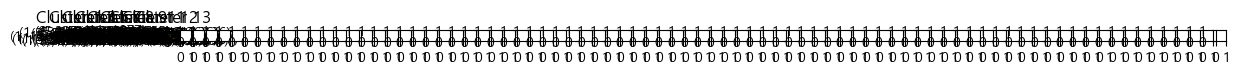

In [322]:
# 각 클러스터별 _1순위카드ID 랭킹 계산
top_10_by_cluster = merged_df.groupby(['cluster', '_1순위카드ID']).size().groupby('cluster').nlargest(10).reset_index(level=0, drop=True)

# 상위 10개 데이터 출력
print(top_10_by_cluster)
# 파이차트 시각화
colors = plt.cm.Paired(range(len(top_10_by_cluster)))

fig, axes = plt.subplots(1, len(top_10_by_cluster), figsize=(15, 5), subplot_kw={'aspect': 'equal'})

for i, (cluster, data) in enumerate(top_10_by_cluster.groupby('cluster')):
    ax = axes[i]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()

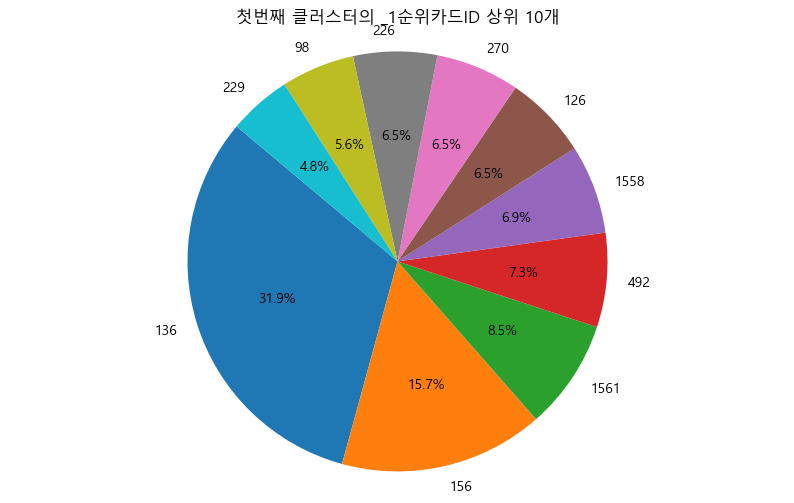

In [326]:
cluster1_top_10 = merged_df[merged_df['cluster'] == 1]['_1순위카드ID'].value_counts().head(10)

# 파이차트 시각화
plt.figure(figsize=(10, 6))
plt.pie(cluster1_top_10, labels=cluster1_top_10.index, autopct='%1.1f%%', startangle=140)
plt.title("첫번째 클러스터의 _1순위카드ID 상위 10개")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

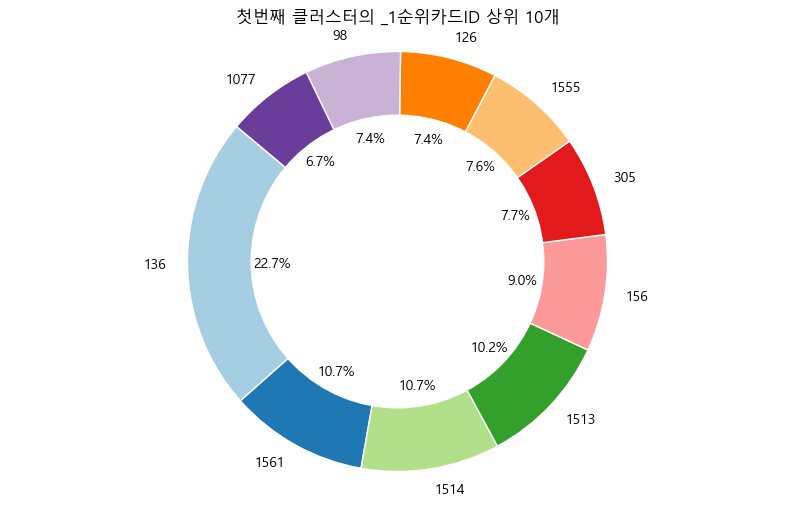

In [345]:
# 첫번째 클러스터의 '_1순위카드ID' 랭킹 상위 10개 추출
cluster1_top_10 =merged_df[merged_df['cluster'] == 5]['_1순위카드ID'].value_counts().head(10)

# 파이차트 시각화
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(cluster1_top_10)))  # 청록색 계열 색상 사용
plt.pie(cluster1_top_10, labels=cluster1_top_10.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title("첫번째 클러스터의 _1순위카드ID 상위 10개")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 도넛 형태로 만들기 위해 중앙에 원을 추가
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

In [ ]:
0 주유 이용금액 정비이용금액 260 카드 (주유할인)                          주유 
1 온라인 이용금액  114 카드 (온라인쇼핑할인)                               간편결제
2슈퍼마켓 이용금액 123카드 (유통/마트 할인)                                 마트
3 특징이 없으니깐 제일 혜택많은거  136카드 (혜택많은 136)               외식
4 그냥 거의다 1등  247 카드 (플래티늄서비스)                                 마일리지
5 통신비 이용금액 226 카드 (통신할인)                                          통신
6 버스 지하철 이용금액  1061 카드 (교통할인)                                 교통
7 펫이용금액, 공연이용금액 1007 카드 (문화생활할인)                        레저
8 편의점 이용금액 택시 이용금액 130카드 (전가맹점할인)                     전가맹점
9 해외이용금액 246번 카드 (대한항공 항공사 마일리지)                      해외 
10 마트 이용금액 1400카드(가전할인)                                             쇼핑
11 보험료 이용금액 336 카드 (기타 원금할인)                                   병원 
12 관리비 이용금액  1152 카드 (아파트할인)                                     구독
13 교육납부금액 1203 카드 (교육관련할인)                                       생활

In [72]:
rank_columns = [f'{i}순위' for i in range(1, 6)]

# apply 함수를 사용하여 조건을 만족하는 행을 찾고, 그 합을 계산
a = merged_df.apply(lambda row: row['_1순위카드ID'] in row[rank_columns].values, axis=1).sum()
a

2238

In [76]:
rank_columns = [f'{i}순위' for i in range(1, 6)]

# apply 함수를 사용하여 조건을 만족하는 행을 찾고, 그 합을 계산
b = merged_df[merged_df.apply(lambda row: row['_1순위카드ID'] not in row[rank_columns].values, axis=1)]
b

회원번호  _1순위카드ID  cluster  1순위  2순위   3순위   4순위  5순위   6순위  7순위  ...  \
1      lFYWhHJU       324        0  229  136   216   156  482  1561  226  ...   
2      aD26XDLb       126        0  229  136   216   156  482  1561  226  ...   
4      Lu0L3wvX      1514        0  229  136   216   156  482  1561  226  ...   
5      M6NTNL4U       111        0  229  136   216   156  482  1561  226  ...   
6      p3tfgTqx      1141        0  229  136   216   156  482  1561  226  ...   
...         ...       ...      ...  ...  ...   ...   ...  ...   ...  ...  ...   
14437  iWtMfNBg       126        3  136  156  1561  1555  229   226  126  ...   
14438  6PsR2Eya       305        3  136  156  1561  1555  229   226  126  ...   
14439  mF1zDjdZ       126        3  136  156  1561  1555  229   226  126  ...   
14440  tKVR0fnT       791        3  136  156  1561  1555  229   226  126  ...   
14441  vld14v19       785        3  136  156  1561  1555  229   226  126  ...   

       61순위  62순위  63순위  64순위  65순위  66순위  67순위  68순위  69순위  70순위  
1      1326   284   487   260   332   321  1515   163  1536   157  
2      1326   284   487   260   332   321  1515   163  1536   157  
4      1326   284   487   260   332   321  1515   163  1536   157  
5      1326   284   487   260   332   321  1515   163  1536   157  
6      1326   284   487   260   332   321  1515   163  1536   157  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
14437   838  1086   938  1731   244  1088   834   247   797   500  
14438   838  1086   938  1731   244  1088   834   247   797   500  
14439   838  1086   938  1731   244  1088   834   247   797   500  
14440   838  1086   938  1731   244  1088   834   247   797   500  
14441   838  1086   938  1731   244  1088   834   247   797   500  

[12204 rows x 73 columns]

In [325]:
b

NameError: name 'b' is not defined